 # **Combine Data Cleaning, Feature Selection, Modeling and Interpretability into one report**

**1. What is the Question?**

The central question of the analysis is likely to be: "Can we predict which customers are at a higher risk of churning from the telecommunications company, and what are the key factors driving customer churn?"

1. Predict Customer Churn: Utilize H2O.ai's AutoML capabilities to develop a predictive model that accurately identifies customers who are likely to churn at the end of the quarter.
2. Feature Importance Analysis: Determine the key predictive variables that significantly influence customer churn. This will provide insights into which factors contribute most to customer turnover.
3. Model Performance Assessment: Evaluate various models and select the one with the best performance based on appropriate metrics (like AUC, accuracy, recall, precision, F1 score, etc.) for a binary classification problem.
4. Insight Generation for Customer Retention: Extract actionable insights to understand the characteristics and behaviors of customers who are more likely to churn.


**2. What Did You Do?**

* Data Cleaning: Preprocessing the dataset by handling missing values, outliers, and standardizing the data.
* Feature Selection: Identifying key variables that are predictive of churn. This could involve statistical analysis and machine learning feature selection techniques to find out variables like tenure, contract type, monthly charges, etc., that most strongly correlate with churn.
* Modeling: Developing predictive models (such as logistic regression, decision trees, or ensemble methods) to predict the likelihood of churn.
* Interpretability: Using tools like SHAP (SHapley Additive exPlanations) to interpret the model and understand the impact of each feature on the prediction.

**3. How Well Did It Work?**

* Model Performance: Assessing the accuracy, precision, recall, F1-score, and AUC-ROC of the predictive models.
  * Accuracy: 0.9205
  * Precision: 0.8288
  * Recall: 0.9075
  * F1-Score: 0.8663
* Validation: Using techniques like cross-validation to ensure the model's robustness and avoid overfitting.
* Feature Importance Analysis: Evaluating which features most significantly impact churn, as revealed by the model interpretation.
  1. Churn Score

  2. Contract_month-to-month

**4. What Did You Learn?**

* Key Predictors of Churn: Insights into which factors (like billing method, service usage patterns, customer demographics) most strongly influence the likelihood of churn.
* Model Insights: Understanding the strengths and limitations of different predictive models in the context of customer churn.
* Business Strategies: Recommendations for the telecommunications company on how to reduce churn based on the identified key factors, such as personalizing customer service, revising pricing strategies, or customizing offers.


# About Dataset

**Context**
A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.

**Data Description**
7043 observations with 33 variables

1. CustomerID: A unique ID that identifies each customer.
2. Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
3. Country: The country of the customer’s primary residence.
4. State: The state of the customer’s primary residence.
5. City: The city of the customer’s primary residence.
6. Zip Code: The zip code of the customer’s primary residence.
7. Lat Long: The combined latitude and longitude of the customer’s primary residence.
8. Latitude: The latitude of the customer’s primary residence.
9. Longitude: The longitude of the customer’s primary residence.
10. Gender: The customer’s gender: Male, Female
11. Senior Citizen: Indicates if the customer is 65 or older: Yes, No
12. Partner: Indicate if the customer has a partner: Yes, No
13. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
14. Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
15. Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
16. Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
17. Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
18. Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
19. Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
20. Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
21. Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
22. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
23. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
24. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
25. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
26. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
27. Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
28. Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
29. Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
30. Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
31. Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
32. CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
33. Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [1]:
!pip install eli5
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install openpyxl

!pip install shap

!pip install --upgrade scikit-learn

!pip install --upgrade sklearn-pandas

!pip install -U scikit-learn imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=a7873ac8bcf6920713154288e346f66653122e68cea5fcc71c685feef4504347
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 48.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled im

In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=8566431563a87d7db18508cd861011c62ebeed475874ecfc7f52a4bbe9fce5dc
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [3]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import shap
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import xgboost as xgb

### ML DATA CLEANING AND FEATURE SELECTION

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/mrunalipawar97/DSE/main/Telco_customer_churn.csv")

In [5]:
# displaying data in the file
data.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

In [6]:
# Check data types
data_types = data.dtypes
print(data_types)

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object


In [7]:
#To check all the columns and their datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [8]:
# Listing numerical and categorical features from our dataset.
numerical_feats = data.select_dtypes(include=['number']).columns.tolist()
categorical_feats = data.select_dtypes(include=['object']).columns.tolist()

# Print numeric data types
print("Numeric Data Types:")
print(numerical_feats)

# Print categorical data types
print("\nCategorical Data Types:")
print(categorical_feats)

Numeric Data Types:
['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV']

Categorical Data Types:
['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Total Charges', 'Churn Label', 'Churn Reason']


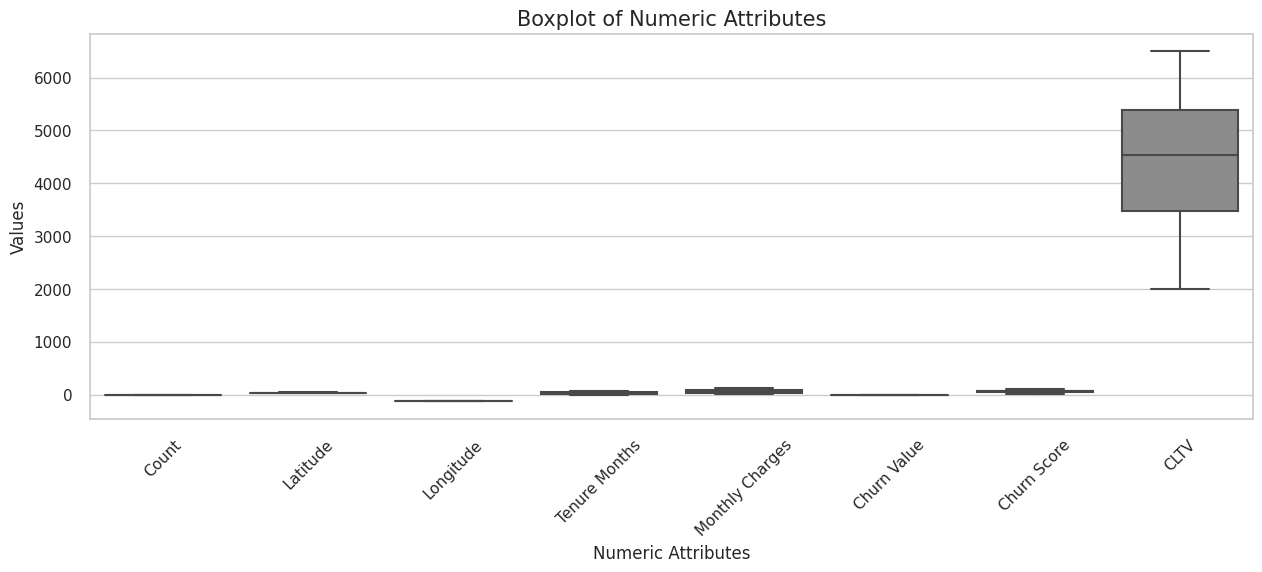

In [9]:
numeric_cols = ['Count', 'Latitude', 'Longitude', 'Tenure Months',
                'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV']

# Set the theme for the plot
sns.set_theme(style="whitegrid")

# Create a boxplot for numeric columns
plt.figure(figsize=(15, 5))
sns.boxplot(data=data[numeric_cols])
plt.xlabel("Numeric Attributes", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.title("Boxplot of Numeric Attributes", fontsize=15)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

The 'Count', 'Churn Value', 'Churn Score', and 'CLTV' attributes appear to be on a different scale compared to 'Latitude', 'Longitude', 'Tenure Months', and 'Monthly Charges'. This is evident from the fact that their values are much higher. In particular, 'Count' seems to be a count variable with a constant value

CLTV has the widest range of values among all plotted variables, suggesting significant variability in the Customer Lifetime Value. The median is around the middle of the box, indicating a relatively symmetric distribution of values in the interquartile range. The whiskers extend quite far, indicating that there are customers with very high and very low CLTV values compared to the median. There are no visible outliers, which suggests that all values fall within a reasonable range according to the typical 1.5 * IQR rule for outlier detection.

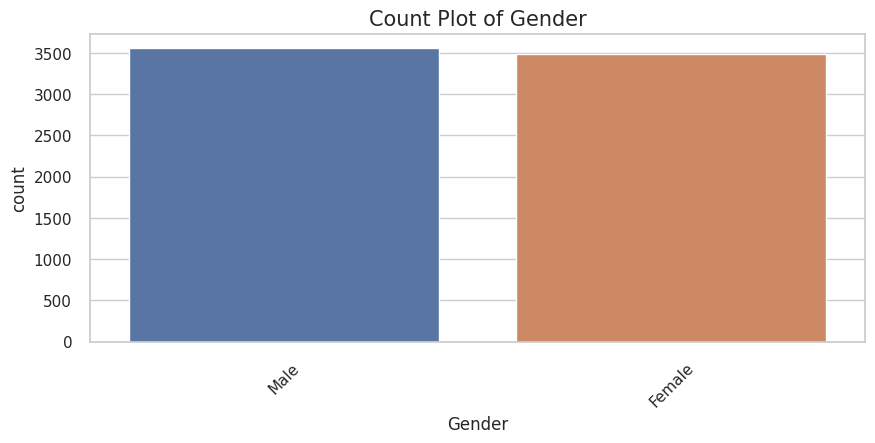

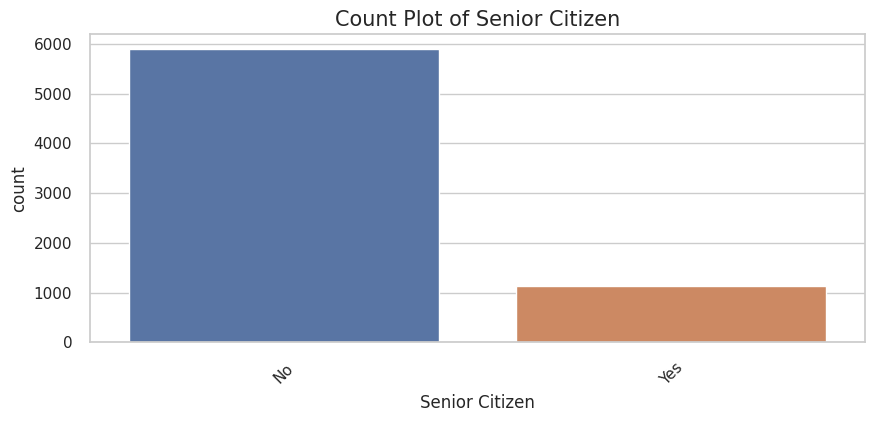

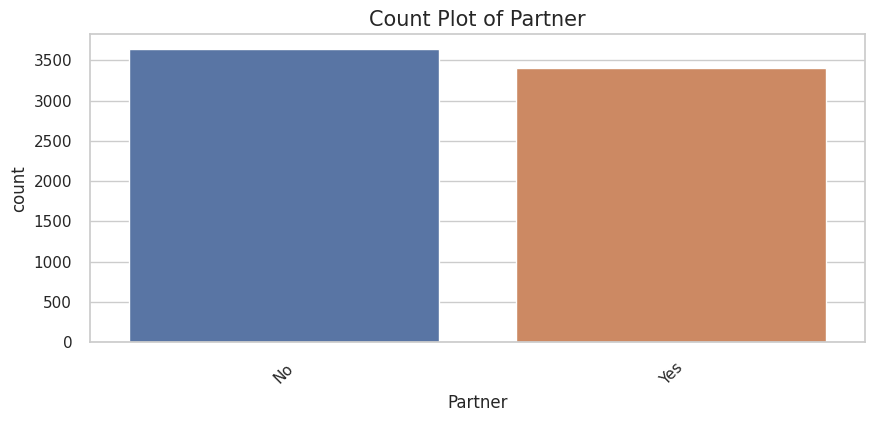

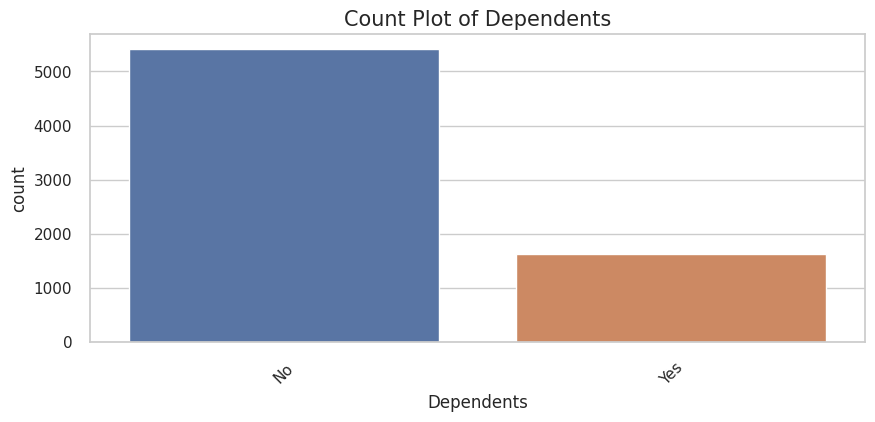

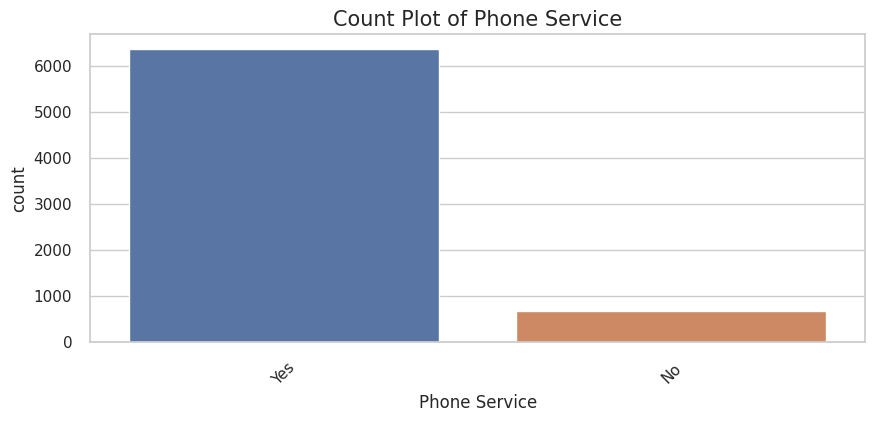

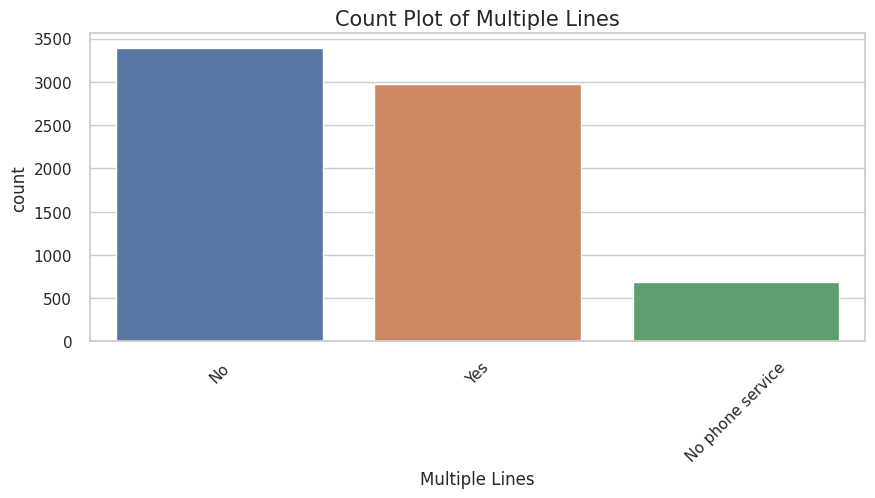

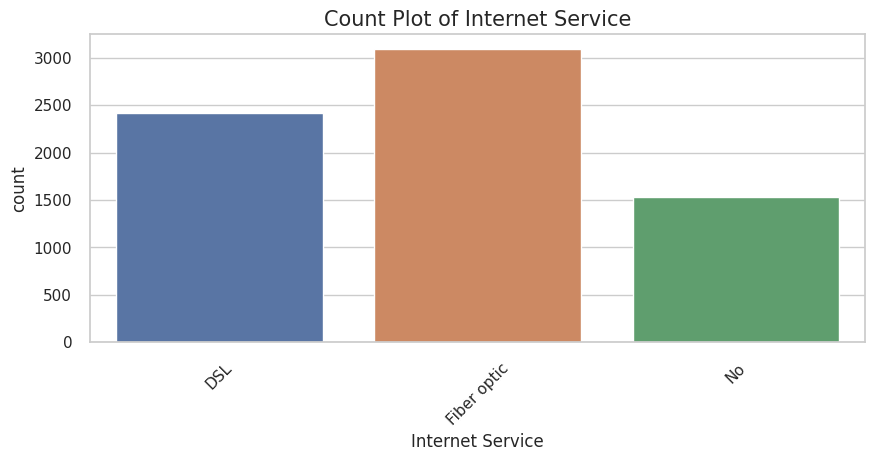

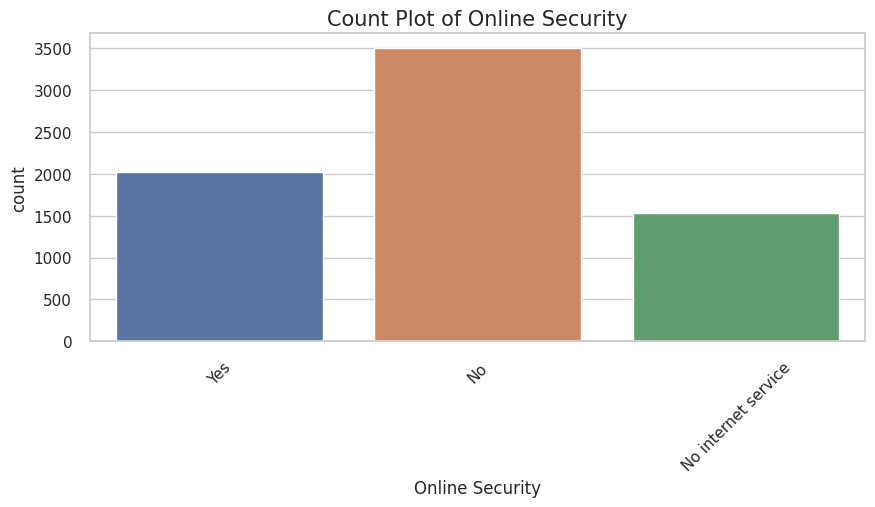

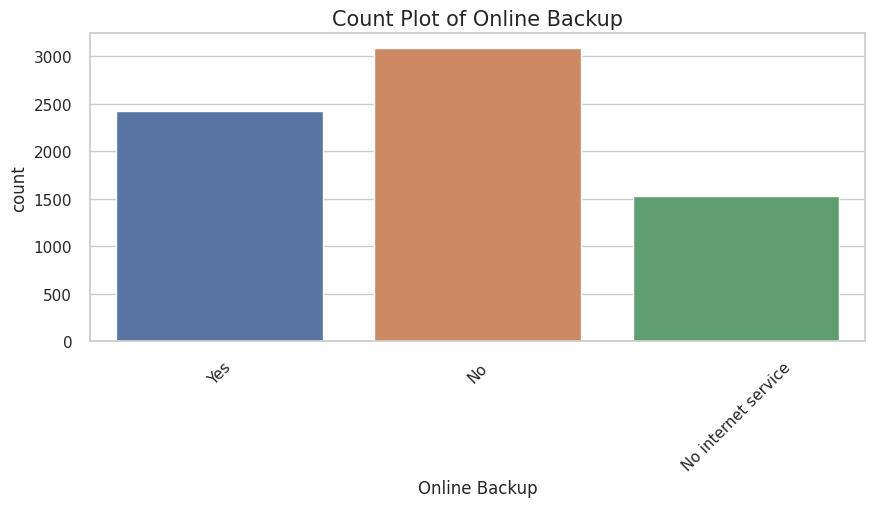

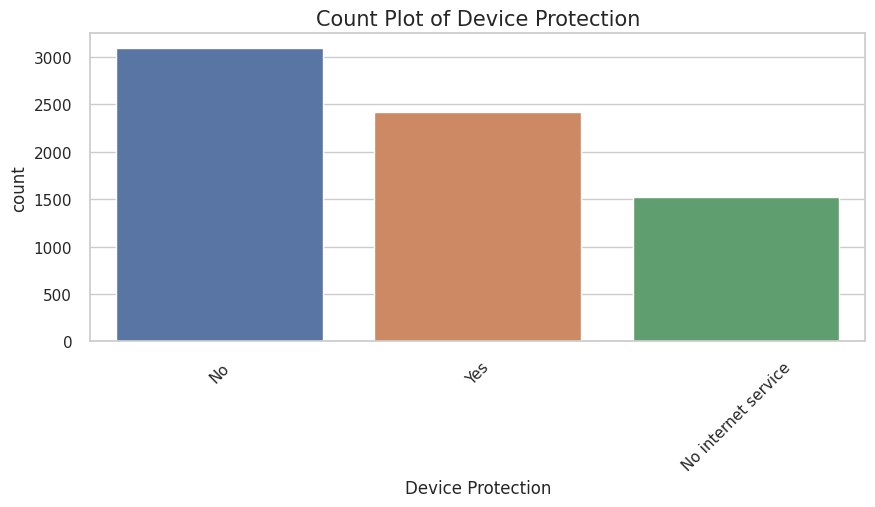

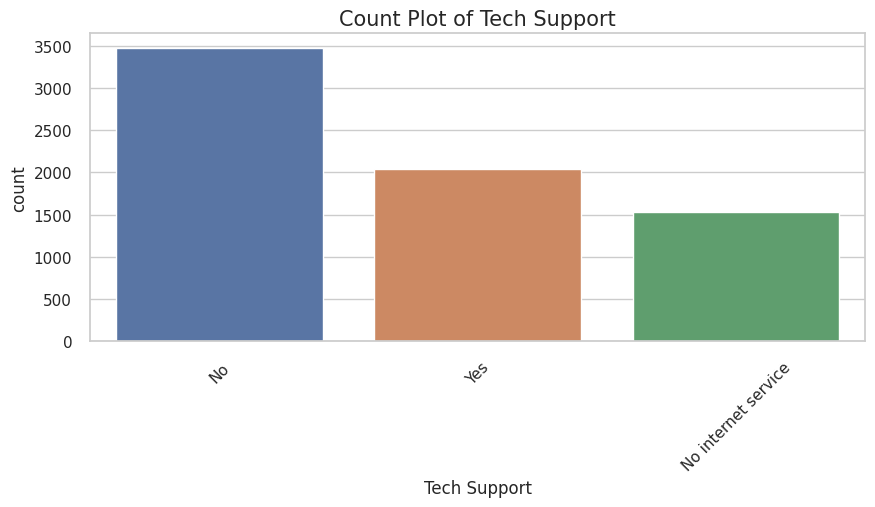

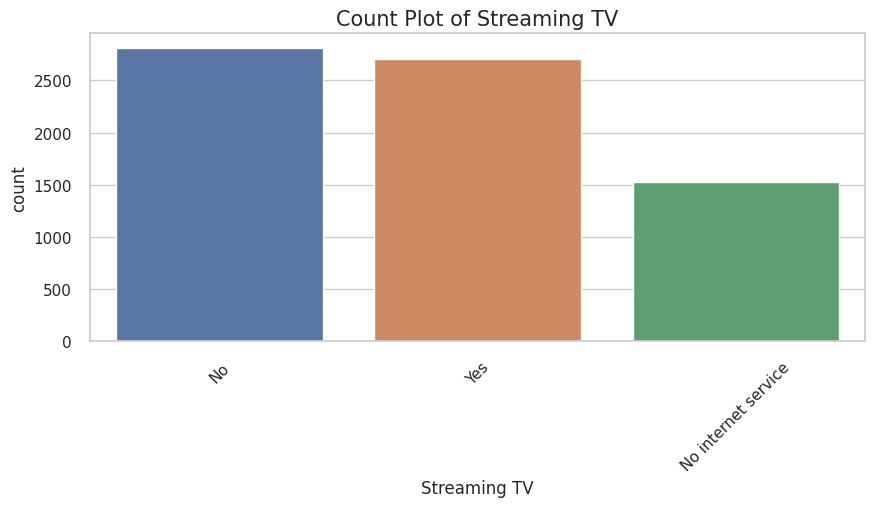

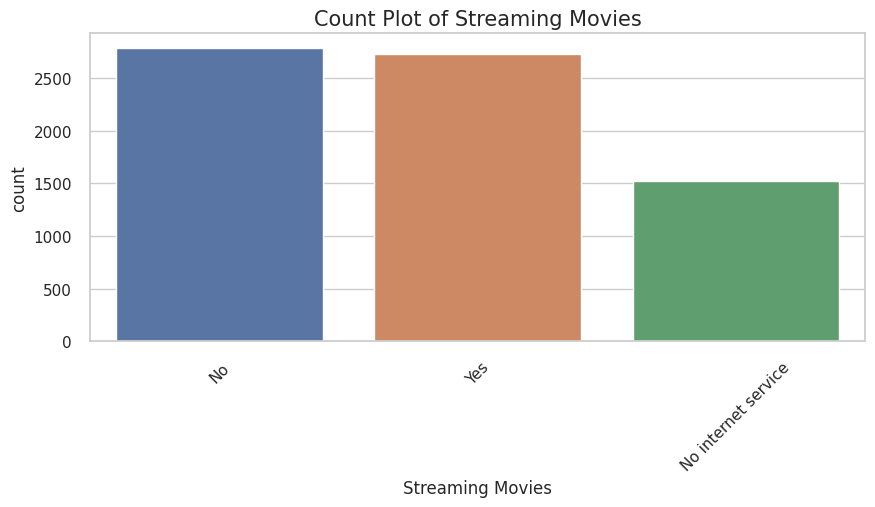

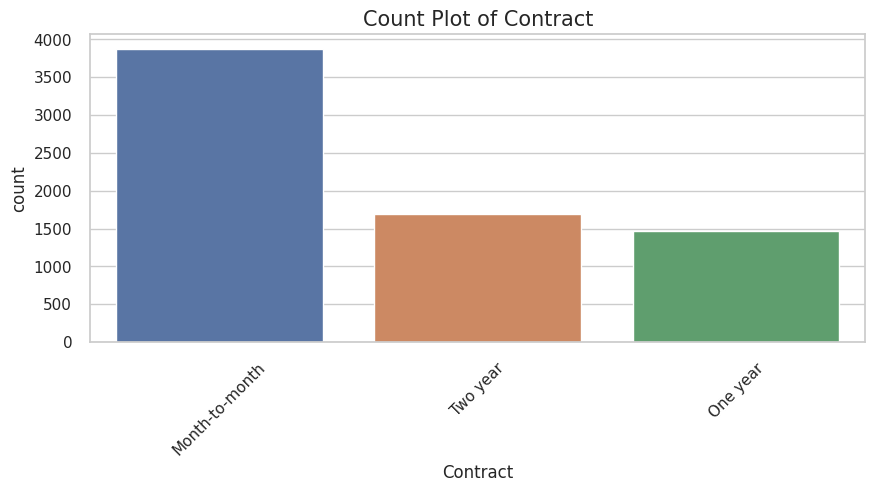

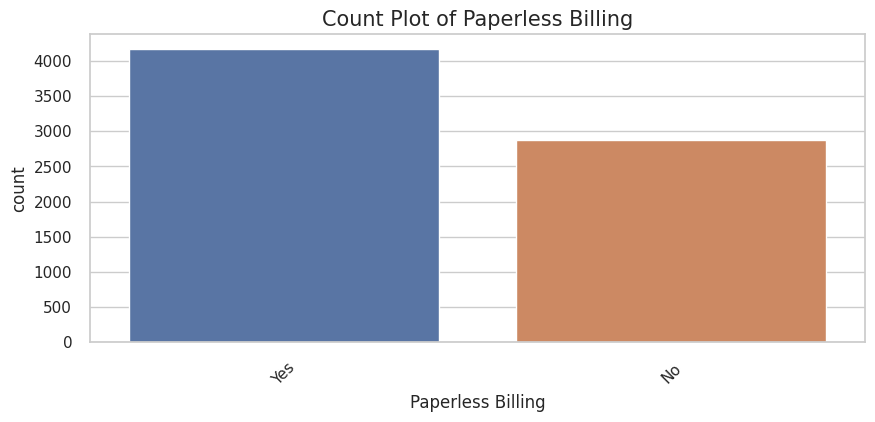

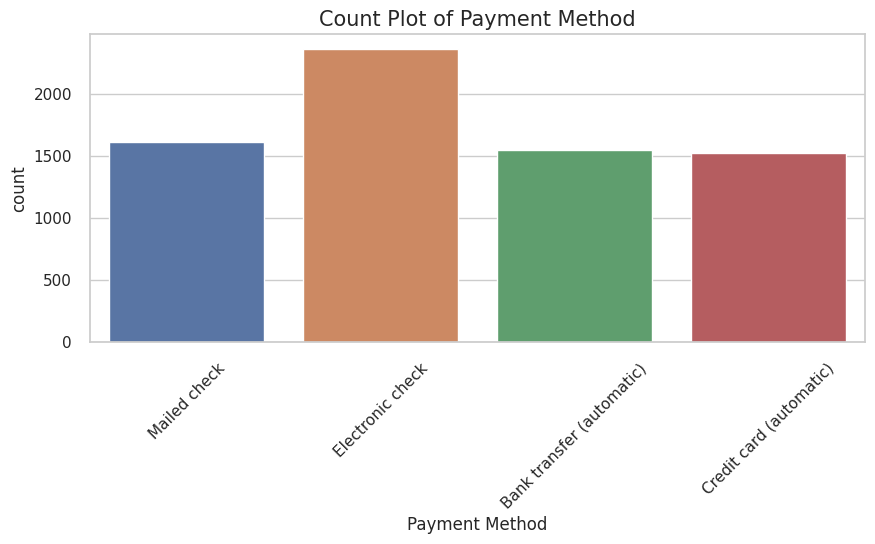

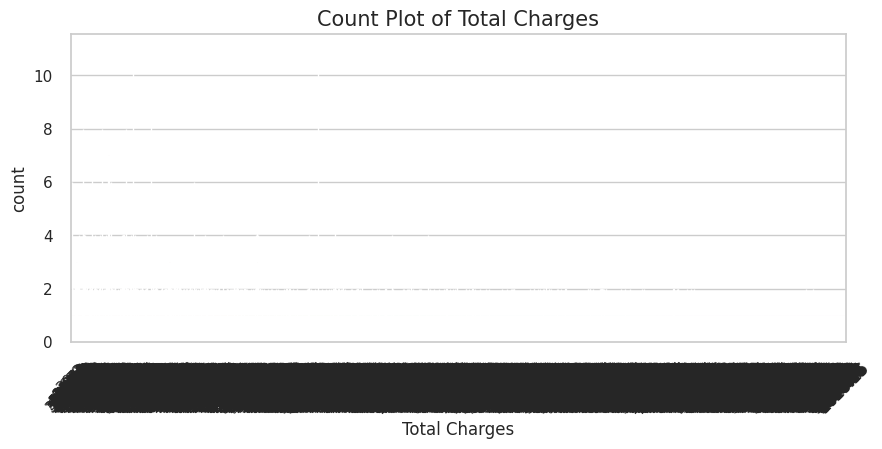

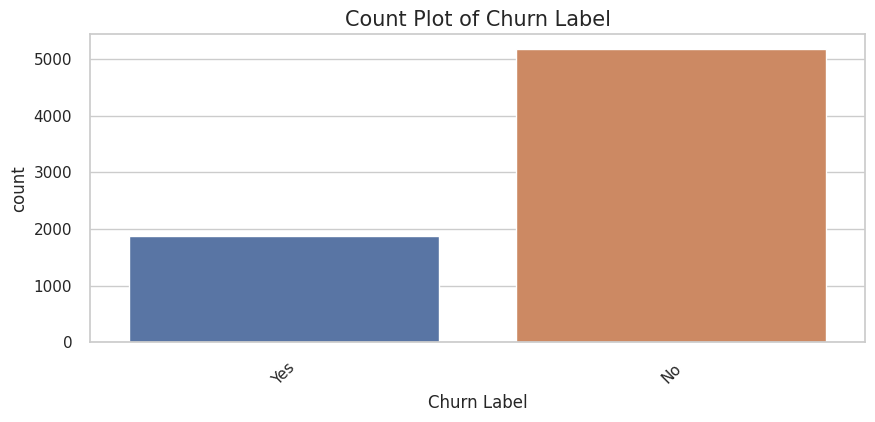

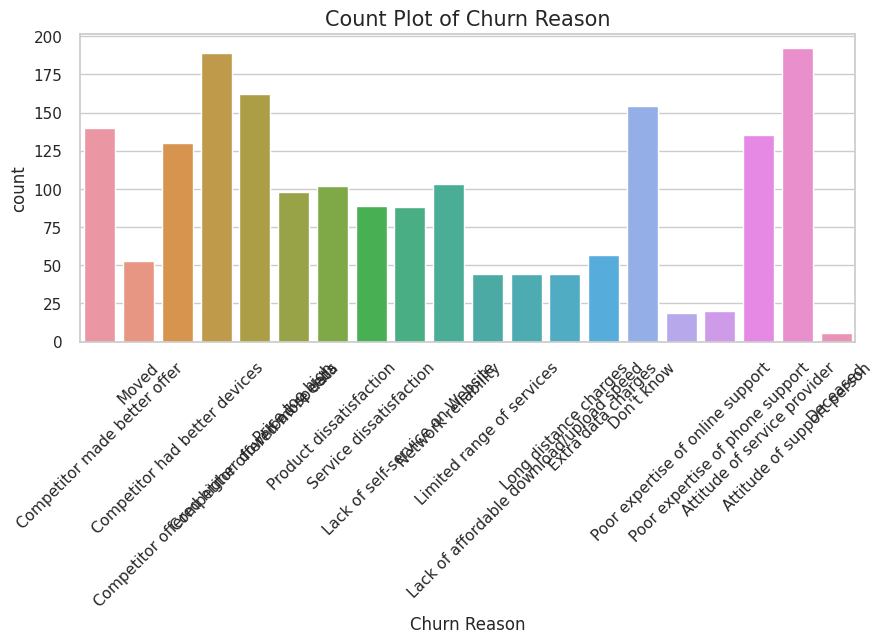

In [10]:
# Categorical columns
categorical_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents',
                    'Phone Service', 'Multiple Lines', 'Internet Service',
                    'Online Security', 'Online Backup', 'Device Protection',
                    'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract',
                    'Paperless Billing', 'Payment Method', 'Total Charges',
                    'Churn Label', 'Churn Reason']

# Create bar plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Count Plot of {col}', fontsize=15)
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
    plt.show()

checking if the any data is missing

In [11]:
missing_values = data.isnull().sum()

print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
Churn Reason    5174
dtype: int64


In [12]:
# Which independent variables have missing data? How much?
print(
    "Percent of Missing Data -  Churn Reason = "
    + str((data["Churn Reason"].isnull().sum() / len(data)) * 100)
    + " %"
)

Percent of Missing Data -  Churn Reason = 73.4630129206304 %


In [13]:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(" ","_")
data.columns

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

In [14]:
data['churn_reason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: churn_reason, 

In [15]:
data['churn_label'].value_counts()

No     5174
Yes    1869
Name: churn_label, dtype: int64

In [16]:
data['churn_reason'].fillna('No churn',inplace=True)
data['churn_reason'].isnull().sum()

0

In [17]:
data.duplicated().sum()

0

In [18]:
data.nunique()

customerid           7043
count                   1
country                 1
state                   1
city                 1129
zip_code             1652
lat_long             1652
latitude             1652
longitude            1651
gender                  2
senior_citizen          2
partner                 2
dependents              2
tenure_months          73
phone_service           2
multiple_lines          3
internet_service        3
online_security         3
online_backup           3
device_protection       3
tech_support            3
streaming_tv            3
streaming_movies        3
contract                3
paperless_billing       2
payment_method          4
monthly_charges      1585
total_charges        6531
churn_label             2
churn_value             2
churn_score            85
cltv                 3438
churn_reason           21
dtype: int64

In [19]:
data['total_charges'].dtype

dtype('O')

In [20]:
data['total_charges'] = pd.to_numeric(data['total_charges'],errors='coerce')
data['total_charges'].dtype

dtype('float64')

In [21]:
data[['tenure_months','monthly_charges','total_charges']].loc[data['total_charges'].isnull()]

tenure_months  monthly_charges  total_charges
2234              0            52.55            NaN
2438              0            20.25            NaN
2568              0            80.85            NaN
2667              0            25.75            NaN
2856              0            56.05            NaN
4331              0            19.85            NaN
4687              0            25.35            NaN
5104              0            20.00            NaN
5719              0            19.70            NaN
6772              0            73.35            NaN
6840              0            61.90            NaN

In [22]:
data[['tenure_months','monthly_charges','total_charges']].loc[data['tenure_months'] == 0]

tenure_months  monthly_charges  total_charges
2234              0            52.55            NaN
2438              0            20.25            NaN
2568              0            80.85            NaN
2667              0            25.75            NaN
2856              0            56.05            NaN
4331              0            19.85            NaN
4687              0            25.35            NaN
5104              0            20.00            NaN
5719              0            19.70            NaN
6772              0            73.35            NaN
6840              0            61.90            NaN

In [23]:
data['tenure_months'].replace(0,1,inplace = True)

In [24]:
data['total_charges'].loc[data['total_charges'].isnull()] = data['monthly_charges'].loc[data['total_charges'].isnull()]

In [25]:
data['total_charges'].isnull().sum()

0

In [26]:
data.describe()

count      zip_code     latitude    longitude  tenure_months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.372710   
std       0.0   1865.794555     2.455723     2.157889      24.557454   
min       1.0  90001.000000    32.555828  -124.301372       1.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       monthly_charges  total_charges  churn_value  churn_score         cltv  
count      7043.000000    7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692    2279.798992     0.265370    58.699418  4400.295755  
std          30.090047    2266.730170     0.441561    21.525131  1183.057152  
min          18.250000      18.800000     0.000000     5.000000  2003.000000  
25%          35.500000     398.550000     0.000000    40.000000  3469.000000  
50%          70.350000    1394.550000     0.000000    61.000000  4527.000000  
75%          89.850000    3786.600000     1.000000    75.000000  5380.500000  
max         118.750000    8684.800000     1.000000   100.000000  6500.000000

What is the most reason makes customers churn ?

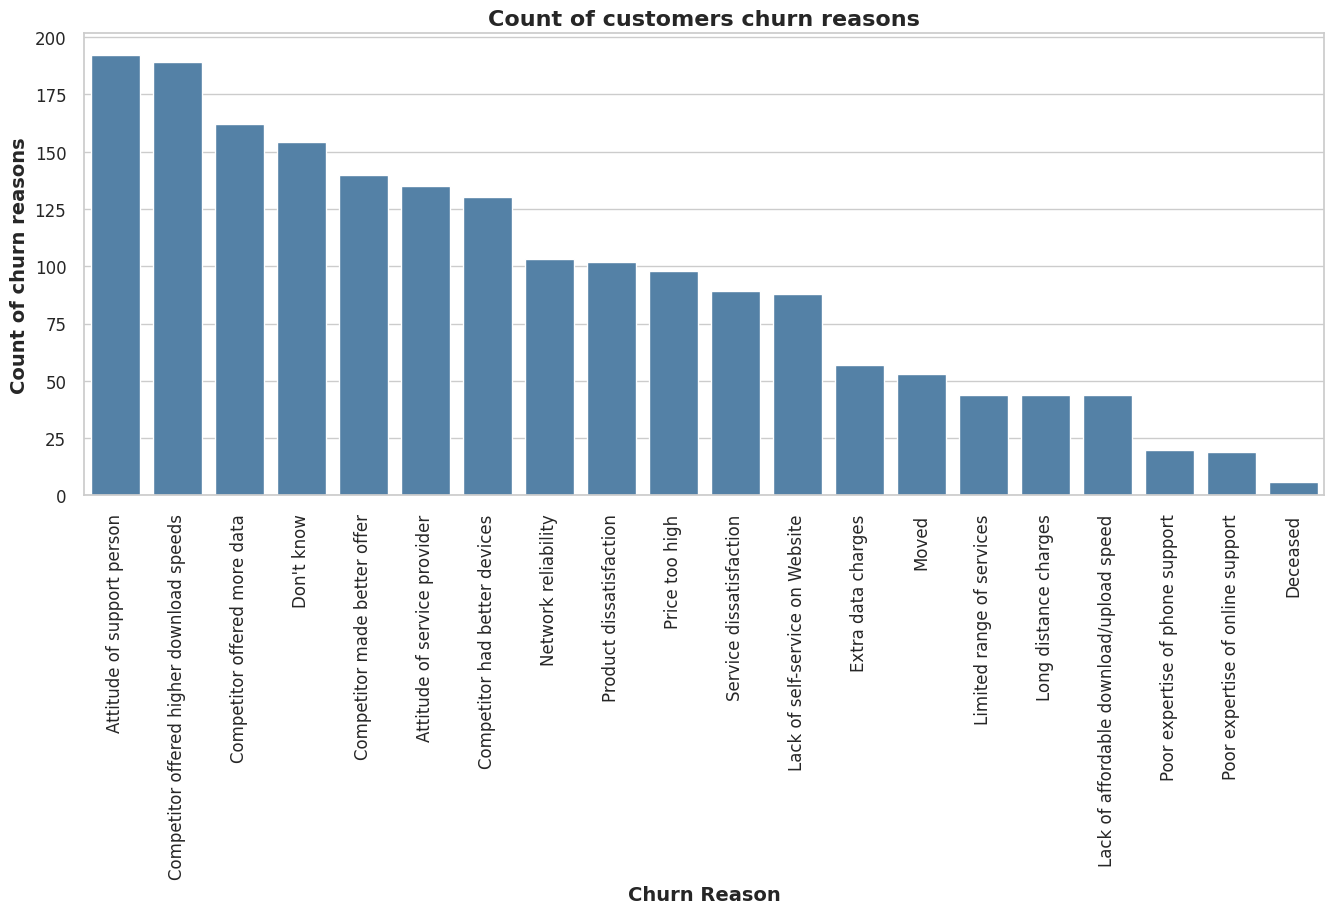

In [27]:
fig, ax = plt.subplots(figsize=(16,6))

churn_reason_data = data[data['churn_reason'] != 'No churn']
sorted_data = churn_reason_data['churn_reason'].value_counts().sort_values(ascending=False)
sns.countplot(x="churn_reason", data=churn_reason_data, ax=ax, color='steelblue',order=sorted_data.index)


ax.set_title("Count of customers churn reasons", fontsize=16, fontweight='bold')
ax.set_xlabel("Churn Reason", fontsize=14, fontweight='bold')
ax.set_ylabel("Count of churn reasons", fontsize=14, fontweight='bold')

ax.tick_params(labelsize=12)
plt.xticks(rotation=90)

plt.show()

In [28]:
prop = (sorted_data[1:3].sum() + sorted_data[4:7].sum()) / sorted_data.sum()
print(round(prop*100,2))

40.45


We can see that the most reason makes customer churn is attitude of support person
and by looking for the most group of reasons makes customers churn the competitor diffrant offers make 40%

The relation between tenure months, Monthly Charge and customer churn

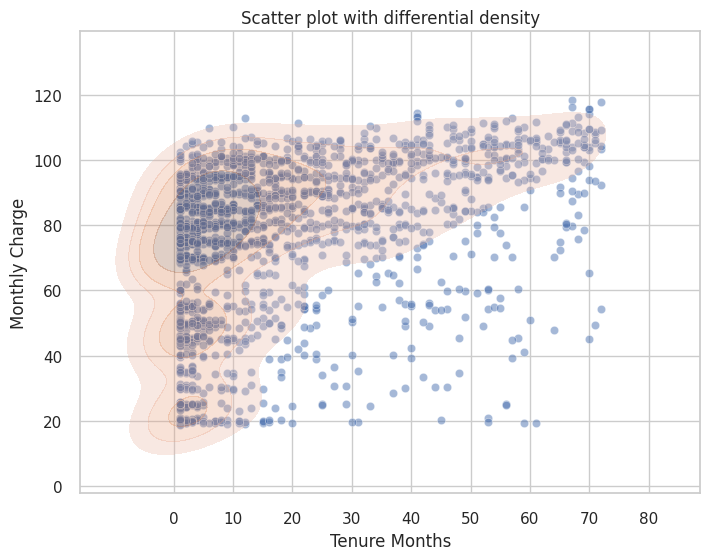

In [29]:
data['tenure_months'].describe()

fig, ax = plt.subplots(figsize=(8,6))

telco = data[data['churn_value'] == 1]
sns.scatterplot(data=telco, x="tenure_months", y="monthly_charges", alpha=0.5)
sns.kdeplot(data=telco, x="tenure_months", y="monthly_charges", levels=5, alpha=0.3, fill=True, thresh=0.15)

plt.title("Scatter plot with differential density")
plt.xlabel("Tenure Months")
plt.ylabel("Monthly Charge")

xticks = np.arange(0, 90, 10)
plt.xticks(xticks)

plt.show()

From 1 to 10 of (3 months) quarter of the year, people how pays more than 75 is the most people churn from the company

If the customers are Senior Citizen , have a Partner or have Dependents how this affects on churn decision

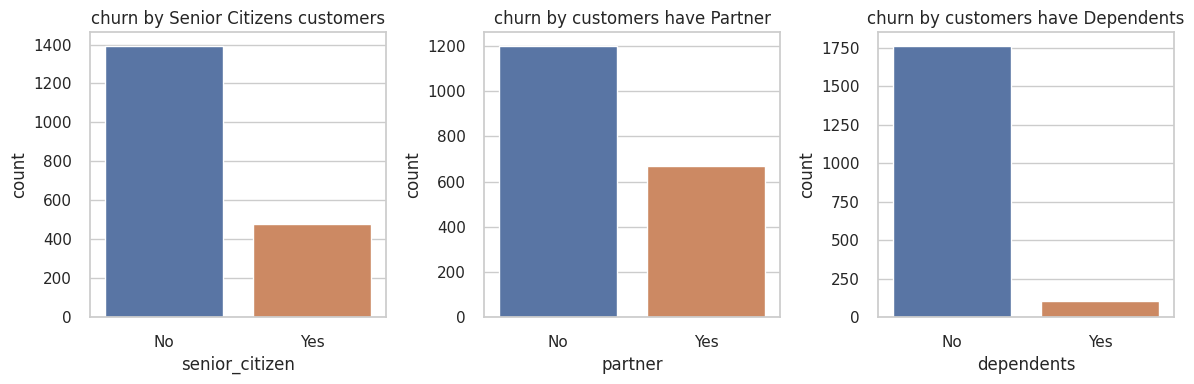

In [30]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

sns.countplot(x="senior_citizen", data=telco, ax=axes[0])
sns.countplot(x="partner", data=telco, ax=axes[1])
sns.countplot(x="dependents", data=telco, ax=axes[2])

axes[0].set_title("churn by Senior Citizens customers")
axes[1].set_title("churn by customers have Partner")
axes[2].set_title("churn by customers have Dependents")

plt.tight_layout()

plt.show()

35% of customers who have Partner & 25% Senior Citizens customers churn the company

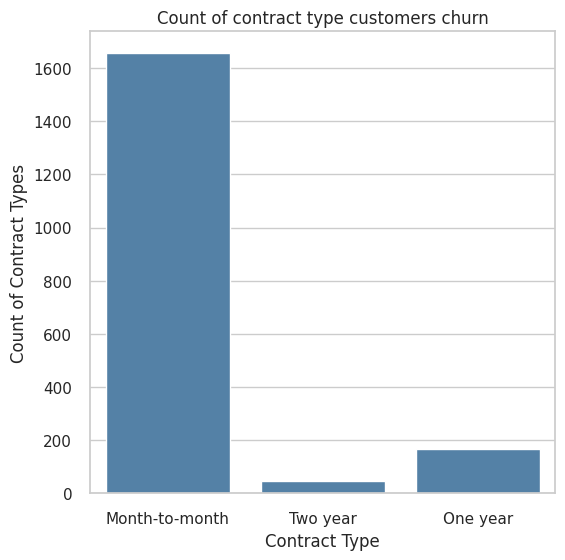

In [31]:
# The most Contract Type Customers break
fig, ax = plt.subplots(figsize=(6,6))


sns.countplot(x="contract", data=telco, ax=ax, color='steelblue')


ax.set_title("Count of contract type customers churn")
ax.set_xlabel("Contract Type")
ax.set_ylabel("Count of Contract Types")


plt.show()

90% customer of Month-to-month contruct type leave the company

In [35]:
raw_df = data.copy()
data = raw_df.copy()
print(data.columns)

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_score', 'cltv', 'churn_reason'],
      dtype='object')


In [38]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)

# Select the numeric columns that will be used in the imputation process
# Since 'Zip Code' is a categorical variable, it's typically not used in imputation for numerical columns like 'Monthly Charges'
# However, if you have a reason to include it (e.g., geographical patterns related to charges), you can add it to the list
columns_to_impute = ['tenure_months', 'monthly_charges', 'cltv']

# Impute our null values
x = data[columns_to_impute]
x_imputed = imputer.fit_transform(x)

# Create a DataFrame from the imputed data
x_imputed = pd.DataFrame(x_imputed, columns=x.columns)

# Replace the 'Monthly Charges' column in the original 'data' DataFrame with the imputed 'Monthly Charges'
data['monthly_charges'] = x_imputed['monthly_charges']

By using the KNN imputer, I'm taking into account the correlation between customers with similar 'Tenure Months', 'CLTV', or other variables may also have similar 'Monthly Charges', and to use that relationship to fill in missing 'Monthly Charges' data.

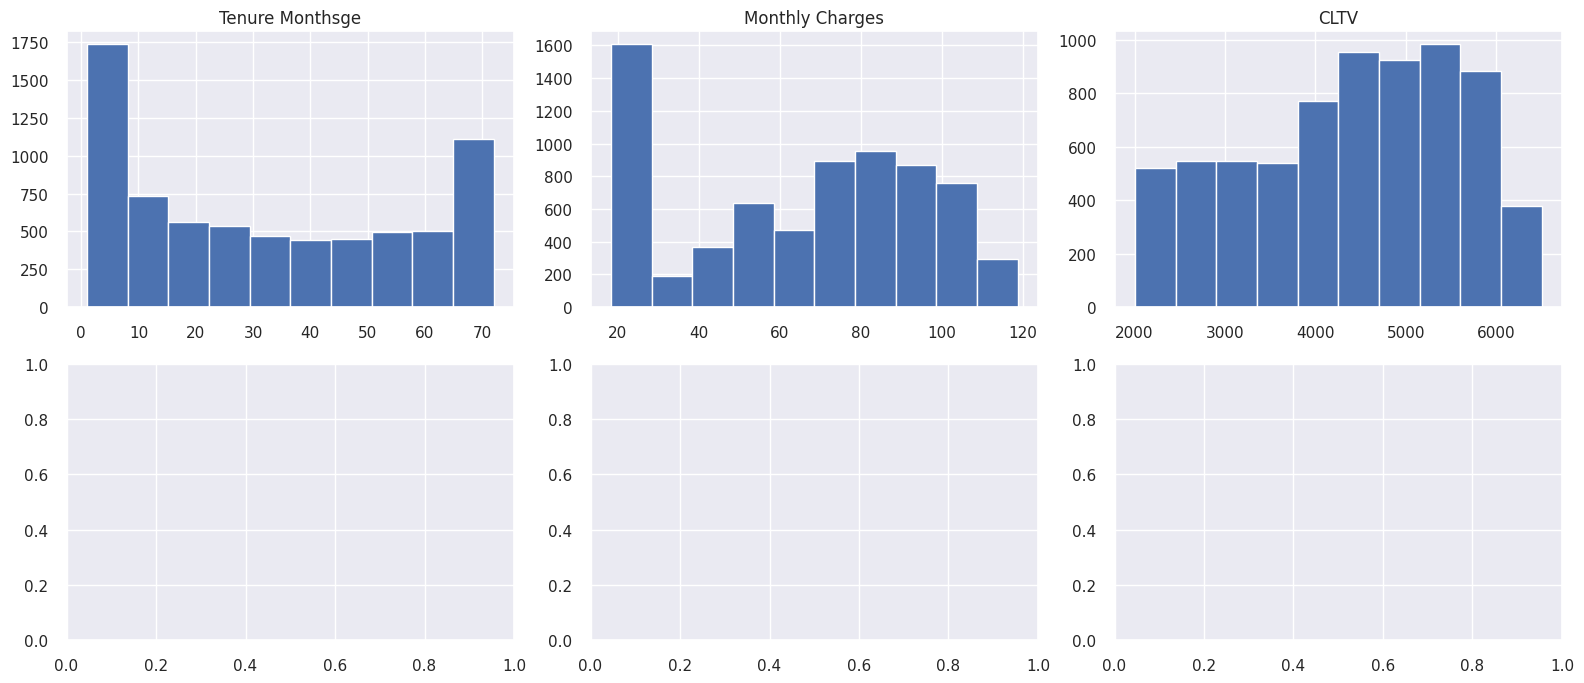

In [39]:
#Let's see what is going on in Tenure Months, Monthly Charges, and CLTV in different sections:
sns.set()
fig, axes = plt.subplots(2, 3, figsize=(16,7))

axes[0,0].hist(data['tenure_months'])
axes[0,0].set_title('Tenure Monthsge')

axes[0,1].hist(data['monthly_charges'])
axes[0,1].set_title('Monthly Charges')

axes[0,2].hist(data['cltv'])
axes[0,2].set_title('CLTV')


plt.tight_layout()

In [40]:
# Calculate the upper bounds based on the original dataset
# removing 0.5% from the upper side of 'Tenure Months' column
upper_bound_tenure = np.percentile(data['tenure_months'], 99.5)
# removing 0.5% from the upper side of 'Monthly Charges' column
upper_bound_monthly_charges = np.percentile(data['monthly_charges'], 99.5)
# removing 0.5% from the upper side of 'Churn Score' column
upper_bound_churn_score = np.percentile(data['churn_score'], 99.5)
# removing 0.5% from the upper side of 'CLTV' column
upper_bound_cltv = np.percentile(data['cltv'], 99.5)

# Apply the filters independently
data_filtered = data[(data['tenure_months'] <= upper_bound_tenure) &
                     (data['monthly_charges'] <= upper_bound_monthly_charges) &
                     (data['churn_score'] <= upper_bound_churn_score) &
                     (data['cltv'] <= upper_bound_cltv)]

upper_bound_tenure, upper_bound_monthly_charges, upper_bound_churn_score, and upper_bound_cltv are calculated using the 99.5th percentile, which effectively filters out the top 0.5% of data points in each of these columns. This is for handling outliers that may skew the results of statistical analyses or machine learning models.

(array([1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

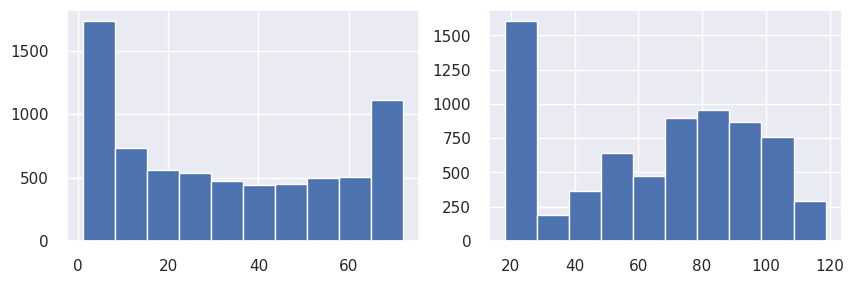

In [41]:
sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

ax1.hist(data['tenure_months'])
ax2.hist(data['monthly_charges'])

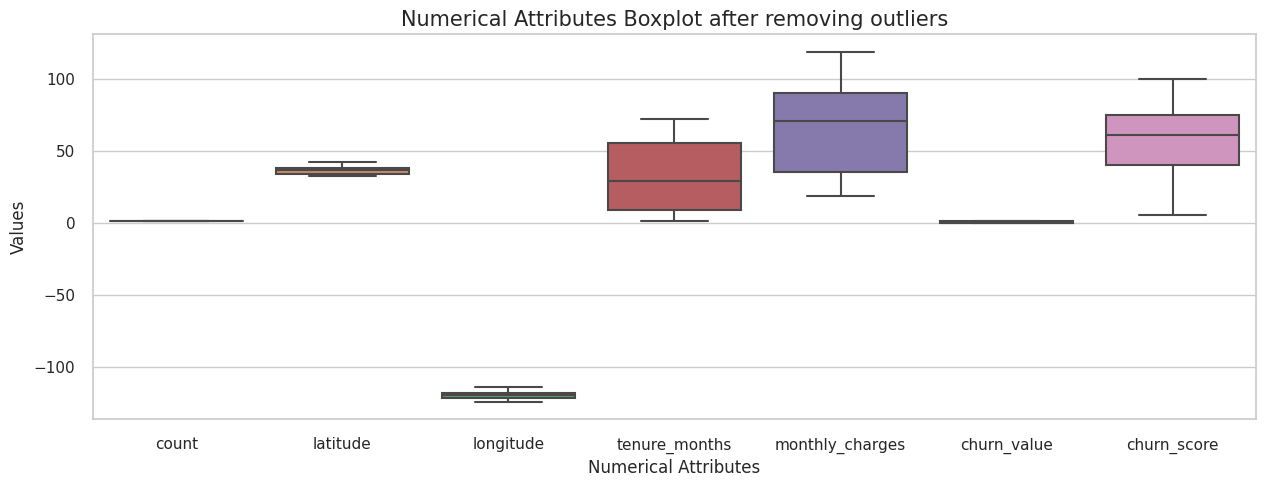

In [43]:
numerical_feats =  ['count', 'latitude', 'longitude', 'tenure_months',
                'monthly_charges', 'churn_value', 'churn_score', 'cltv']
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=data[numerical_feats[:-1]])  # outliers are ignore to be plotted
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot after removing outliers", fontsize= 15)
plt.show()

The 'Churn Score' has a wider IQR, and the median is closer to the top of the box, suggesting that the distribution is slightly skewed towards higher churn scores.

Tenure Months: The distribution for 'Tenure Months' is symmetric, with the median line centered in the box. This suggests a fairly even spread of data around the median, with a similar number of customers having shorter and longer tenures.

Monthly Charges: The 'Monthly Charges' plot shows a larger IQR compared to 'Tenure Months', indicating greater variability in the amount customers are charged each month.

# Build ML Model
Feature Engineering

In [44]:
features = ['zip_code','latitude','longitude','gender','senior_citizen','partner','dependents','tenure_months', 'phone_service',
            'multiple_lines', 'internet_service', 'online_security',
            'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
            'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
            'monthly_charges', 'total_charges']

target = 'churn_value'

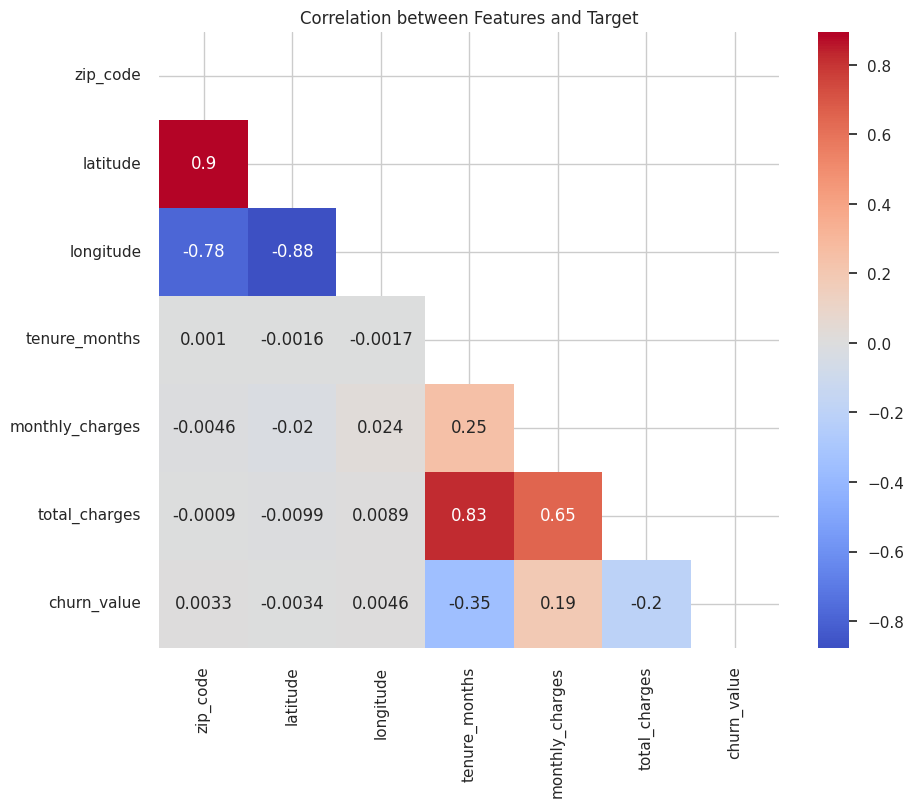

In [45]:
corr = data[features+[target]].corr()

mask = np.zeros_like(corr)
tringle = np.triu_indices_from(mask)
mask[tringle]=True

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask = mask,annot=True, cmap='coolwarm', center=0, ax=ax)
ax.set_title('Correlation between Features and Target')
plt.show()

Location columns (zip_code,latitude,longitude) have a weak relation with churn value while charge columns (tenure_months,monthly_charge,total_charge) have moderate relation

In [46]:
# After fixing outliers, lets normalize them so that all the features are in same class

# Using MinMaxScaler to normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[numerical_feats[:-1]] = pd.DataFrame(scaler.fit_transform(data[numerical_feats[:-1]].values), columns=numerical_feats[:-1], index=data.index)

Applying normalization to the numerical features of your dataset using the MinMaxScaler from scikit-learn, which is a common preprocessing step in machine learning.
scaled data assigned back to the corresponding columns in the original DataFrame, effectively replacing the original values with the normalized ones.

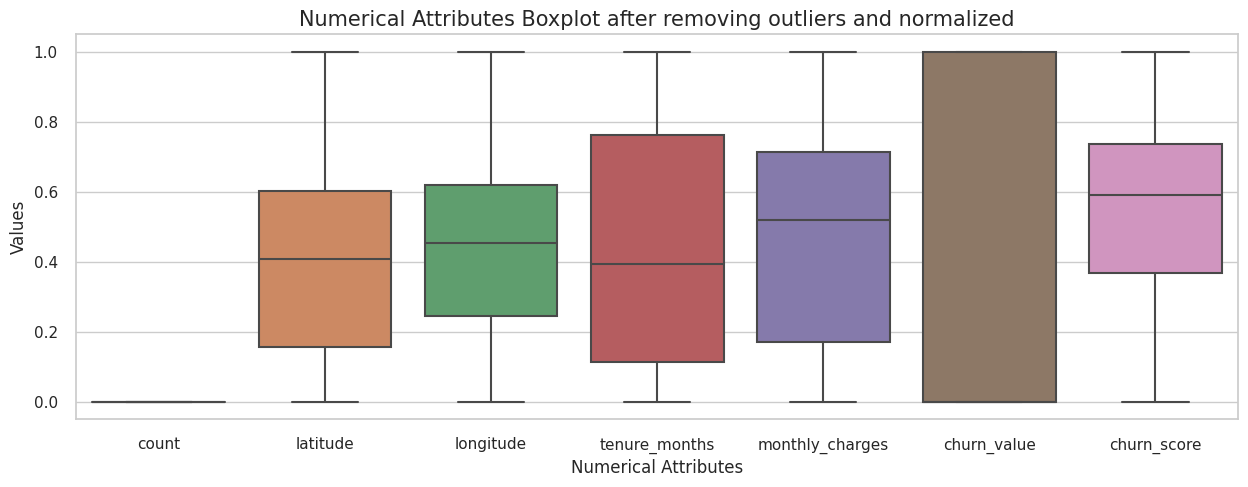

In [47]:
numerical_feats = ['count', 'latitude', 'longitude', 'tenure_months',
                'monthly_charges', 'churn_value', 'churn_score', 'cltv']
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=data[numerical_feats[:-1]])  # outliers are ignore to be plotted
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot after removing outliers and normalized", fontsize= 15)
plt.show()

The resulting plot shows boxplots for each of the specified numerical attributes, with outliers  excluded and the data normalized

Normalization:

Normalization brings down all the features scales to [0 to 1] as it uses minimum and maximum value in each feature.

Normalization = (X - Xmin) / (Xmax - Xmin).

<Axes: >

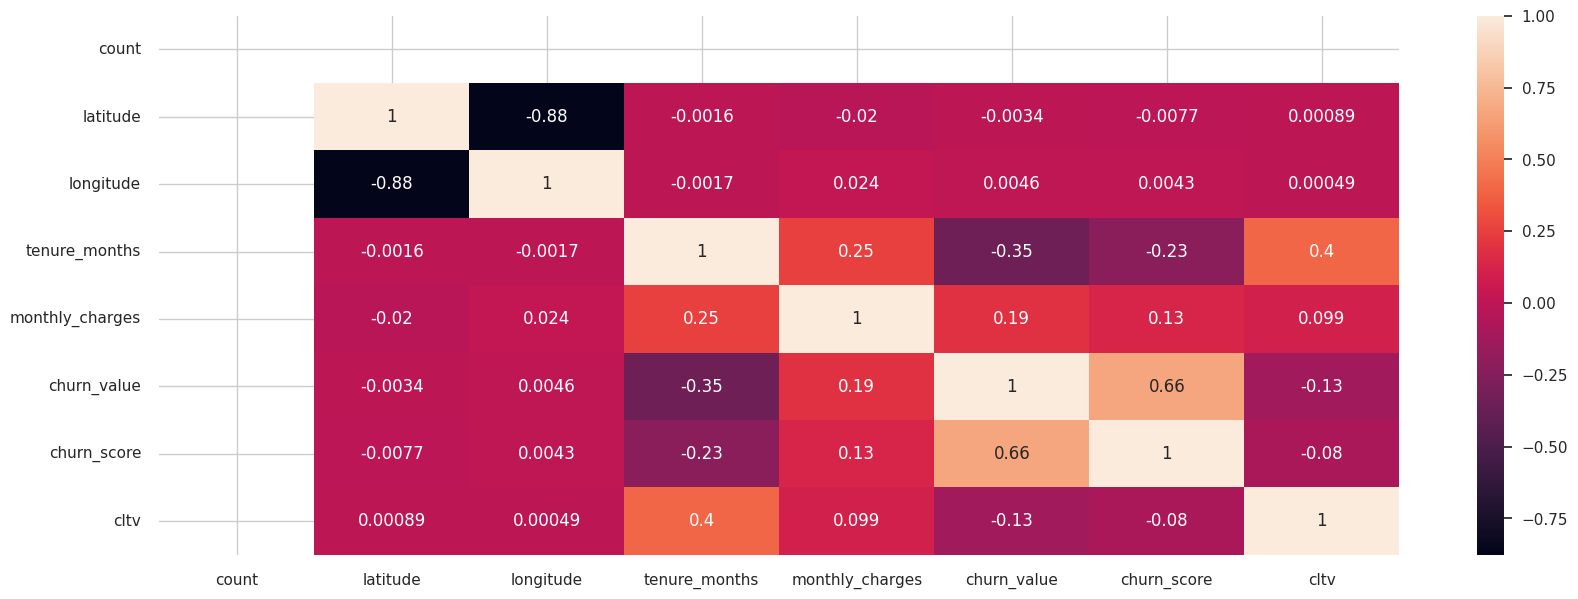

In [48]:
# Displaying the correlated data using heatmap
numerical_feats
plt.figure(figsize=(20,7))
sns.heatmap(data[numerical_feats].corr(), annot=True)

Heatmap represents the correlation matrix of a dataset. Correlation values range from -1 to 1, where:

* A value close to 1 implies a strong positive correlation: as one feature increases, the other feature tends to also increase.
* A value close to -1 implies a strong negative correlation: as one feature increases, the other feature tends to decrease.
* A value around 0 implies little to no linear relationship between the features.

###What are the likely distributions of the numeric variables?

<Figure size 800x500 with 0 Axes>

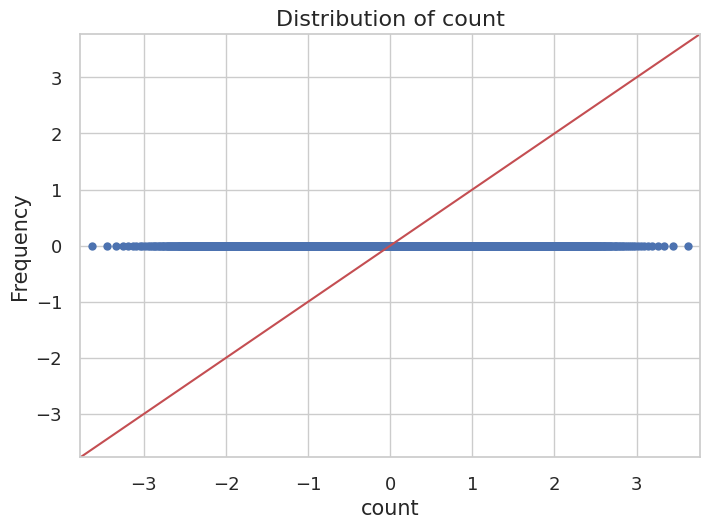

<Figure size 800x500 with 0 Axes>

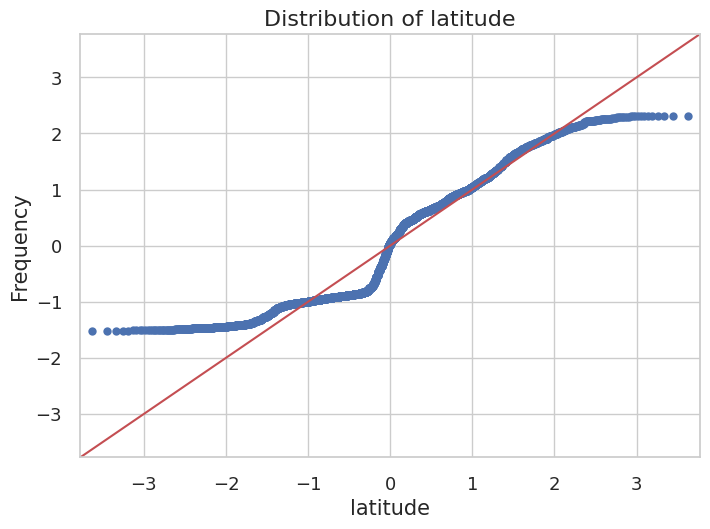

<Figure size 800x500 with 0 Axes>

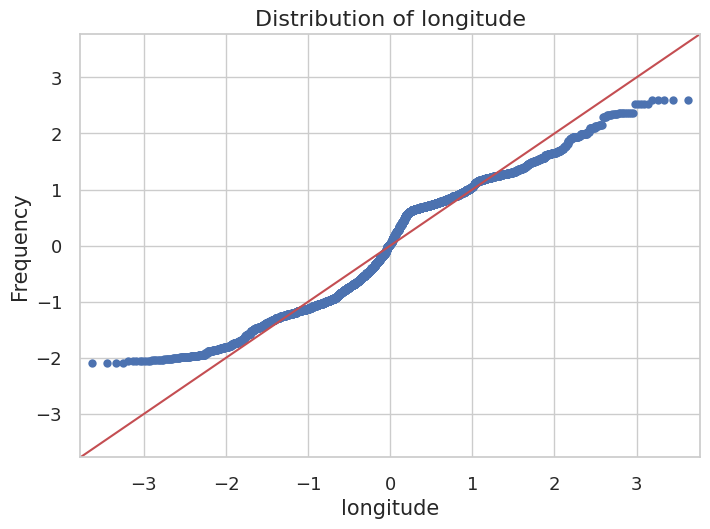

<Figure size 800x500 with 0 Axes>

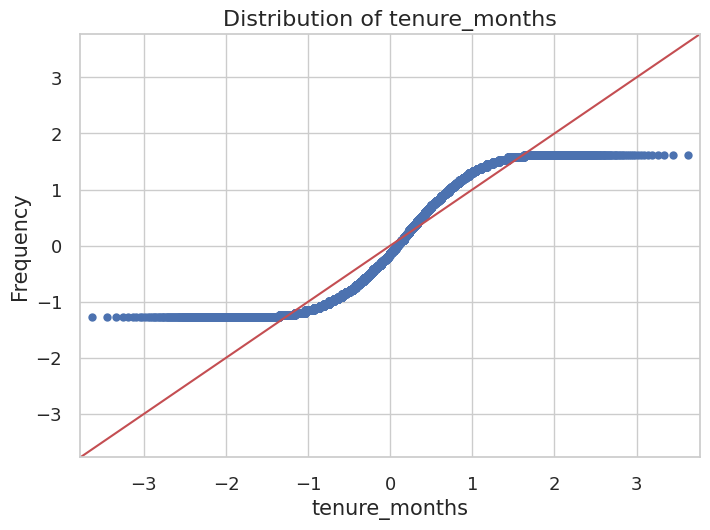

<Figure size 800x500 with 0 Axes>

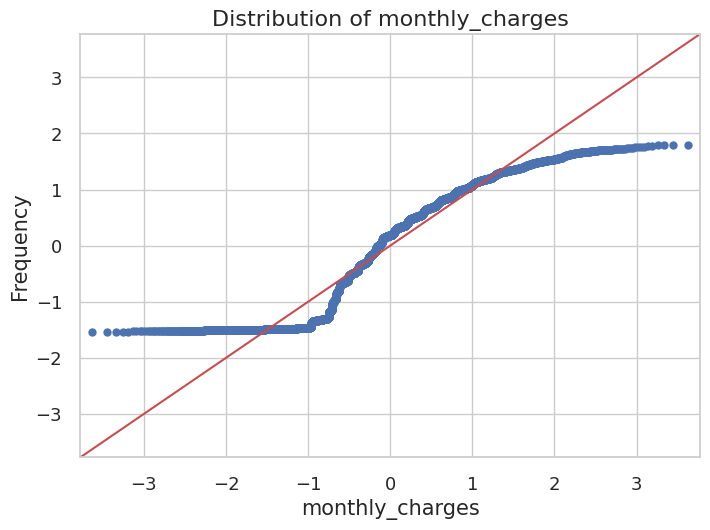

<Figure size 800x500 with 0 Axes>

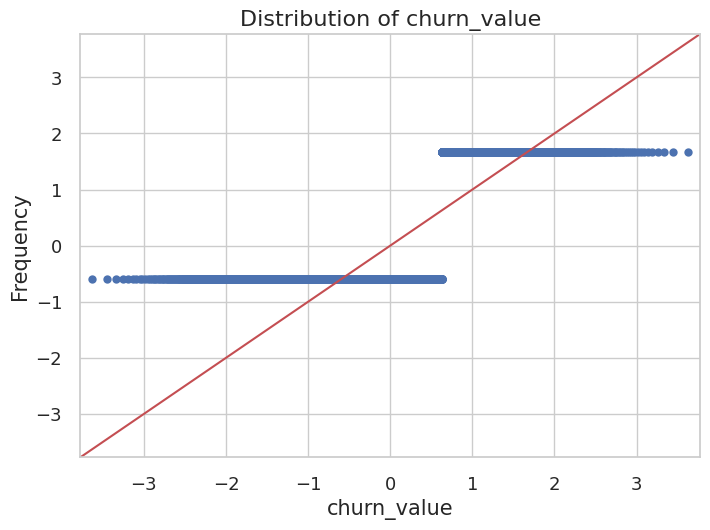

<Figure size 800x500 with 0 Axes>

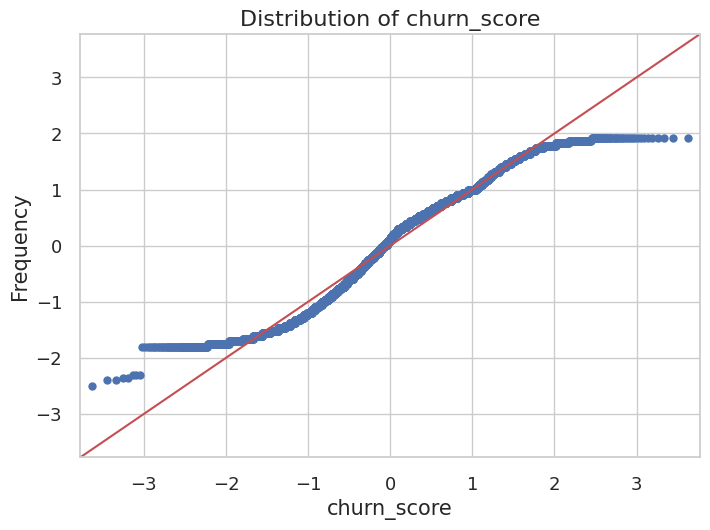

<Figure size 800x500 with 0 Axes>

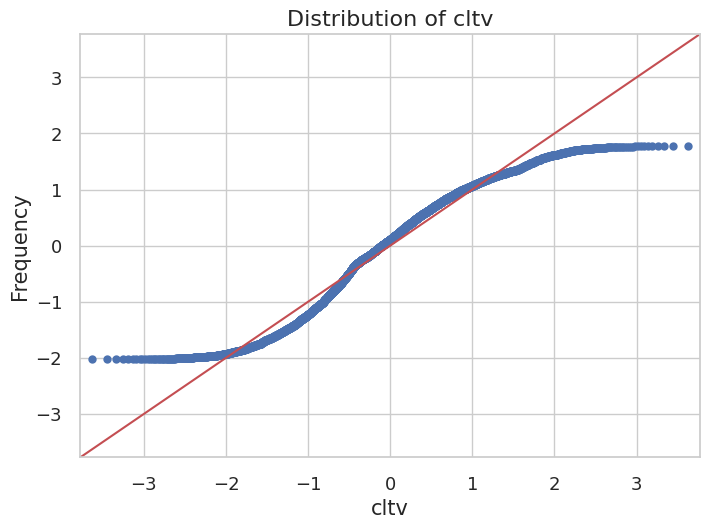

In [49]:
# checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

data_norm = data[['count', 'latitude', 'longitude', 'tenure_months',
                'monthly_charges', 'churn_value', 'churn_score', 'cltv']]

# Drop rows with missing or infinite values
data_norm = data_norm.replace([np.inf, -np.inf], np.nan).dropna()

for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel(c, fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.title(f'Distribution of {c}', fontsize=16)
    plt.grid(True)
    plt.show()

This pattern of deviation suggests that the 'Churn Value' distribution is leptokurtic, having heavier tails than a normal distribution, which implies the presence of outliers or extreme values.

The 'Churn Score' Q-Q plot reveals that the data align well with a normal distribution in the middle range but display slight deviations at the tails.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Define features and target variable
features = ['tenure_months', 'monthly_charges', 'churn_score', 'cltv']
target = 'churn_value'

# Split data into features (X) and target variable (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Create the Logistic Regression model
model = LogisticRegression(solver='liblinear')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Calculate the accuracy score
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

Accuracy Score: 0.850958126330731


The accuracy score is approximately 0.8509 or 85.09%. This means that the logistic regression model correctly predicted the target variable for 85.09% of the test set.

In [51]:
target_variable = 'churn_value'  # Replace with your actual target variable column name

# Calculate the Pearson correlation matrix
correlation_matrix = data.corr()

# Get the absolute value of the correlation with the target variable
correlation_with_target = correlation_matrix[target_variable].abs().sort_values(ascending=False)

# Display the correlation values
print(correlation_with_target)


correlation_threshold = 0.85
highly_correlated_features = [
    column for column in correlation_matrix.columns if any(correlation_matrix[column] > correlation_threshold)
]

# Drop the highly correlated features from your dataset
data = data.drop(columns=highly_correlated_features)


churn_value        1.000000
churn_score        0.664897
tenure_months      0.352296
total_charges      0.198347
monthly_charges    0.193356
cltv               0.127463
longitude          0.004594
latitude           0.003384
zip_code           0.003346
count                   NaN
Name: churn_value, dtype: float64


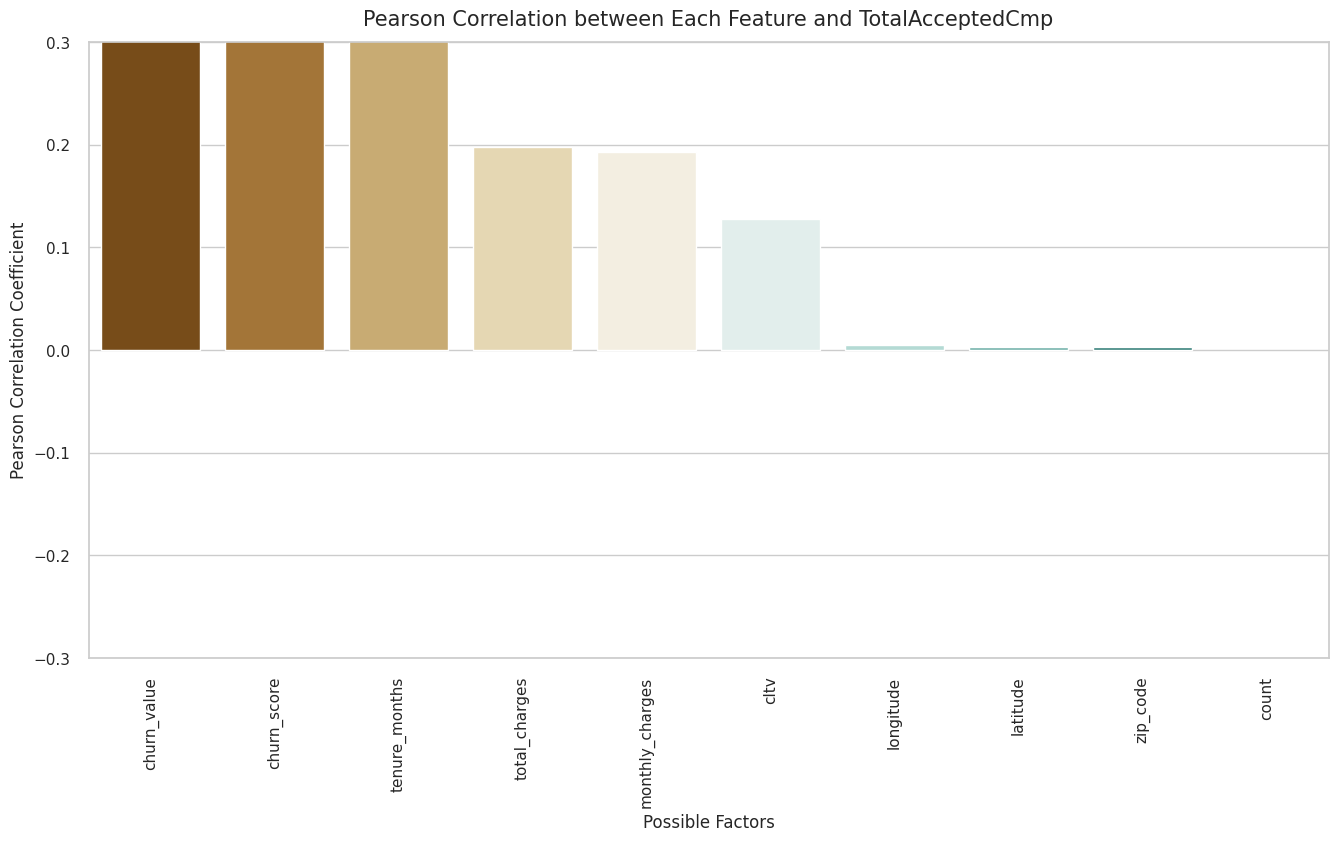

In [52]:
# Visualization
plt.figure(figsize=(16, 8))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette="BrBG")
plt.title("Pearson Correlation between Each Feature and TotalAcceptedCmp", fontsize=15, pad=12)
plt.xlabel("Possible Factors")
plt.ylabel("Pearson Correlation Coefficient")
plt.ylim(-0.3, 0.3)
plt.xticks(rotation="vertical")
plt.show()

* Churn Score has the strongest positive correlation with the target variable, indicating it as the most influential predictor among the features presented.
* Tenure Months and Monthly Charges also show positive correlations but to a lesser extent, suggesting they have some, but lesser, predictive power regarding the target.
* CLTV displays a very weak positive correlation, hinting at a minimal linear relationship with the target variable.
* Longitude, Latitude, and Zip Code exhibit no significant correlation, suggesting that these geographical factors may not be useful predictors for the target variable in a linear sense.

In [83]:
imp_feats = ['count', 'zip_code', 'latitude', 'longitude', 'tenure_months', 'monthly_charges', 'cltv']

# Calculate the percentage of missing data in important features
missing_percentage = 100 * raw_df[imp_feats].isnull().sum() / raw_df.shape[0]

# Print the results
print("Checking % Missing Data in Important Features:")
print(missing_percentage)

Checking % Missing Data in Important Features:
count              0.0
zip_code           0.0
latitude           0.0
longitude          0.0
tenure_months      0.0
monthly_charges    0.0
cltv               0.0
dtype: float64


Which predictor variables are the most important?

['count', 'zip_code', 'latitude', 'longitude', 'tenure_months', 'monthly_charges', 'cltv']
these features are independent of each other and have significance importance in identifying.

In [98]:
# Lets Split the data using Stratification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns


# Perform one-hot encoding on non-numeric columns
data_encoded = pd.get_dummies(data, columns=non_numeric_cols, drop_first=True)

# Split the data into train and test sets
X = data_encoded.drop('churn_reason_Service dissatisfaction', axis=1)
y = data_encoded['churn_reason_Service dissatisfaction']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate SMOTE to handle class imbalance
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only to avoid data leakage
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Now, X_train_balanced and y_train_balanced are balanced versions of your training data
# They can be used to train your machine learning models

# Validate the class distribution in the balanced training set
print("Class distribution in balanced training set:")
print(y_train_balanced.value_counts())

# Validate the class distribution in the original test set (optional)
print("Class distribution in original test set:")
print(y_test.value_counts())

Class distribution in balanced training set:
0    5558
1    5558
Name: churn_reason_Service dissatisfaction, dtype: int64
Class distribution in original test set:
0    1396
1      13
Name: churn_reason_Service dissatisfaction, dtype: int64


The balanced training set (X_train_balanced, y_train_balanced) has an equal number of samples for both classes in your target variable TotalAcceptedCmp.
The output shows 5558 instances for each class (0 and 1), indicating successful balancing.

The class distribution in the original test set remains imbalanced, which is expected and appropriate. The test set should reflect the true distribution of the data and should not be altered with SMOTE.
There are 1396 instances of class 0 and 13 instances of class 1 in the test set.

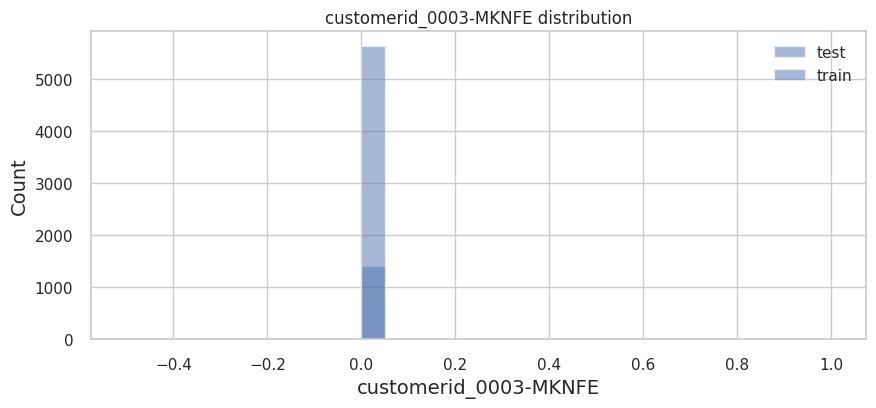

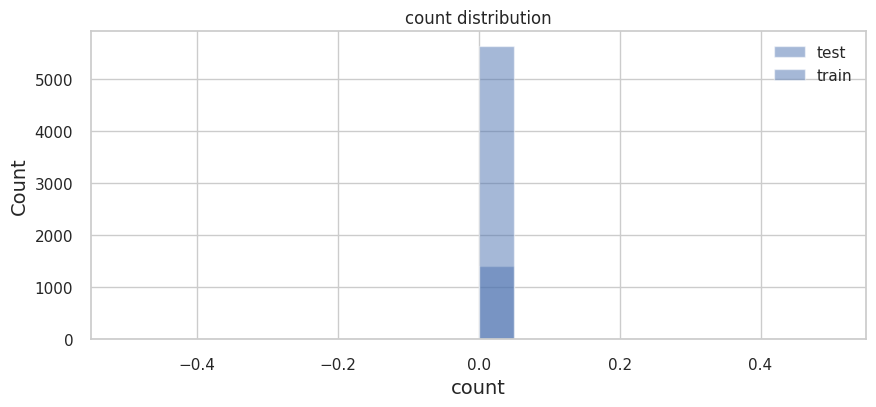

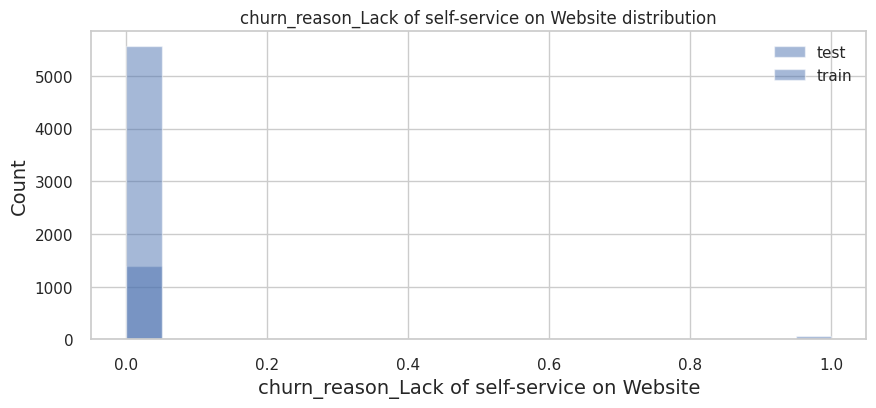

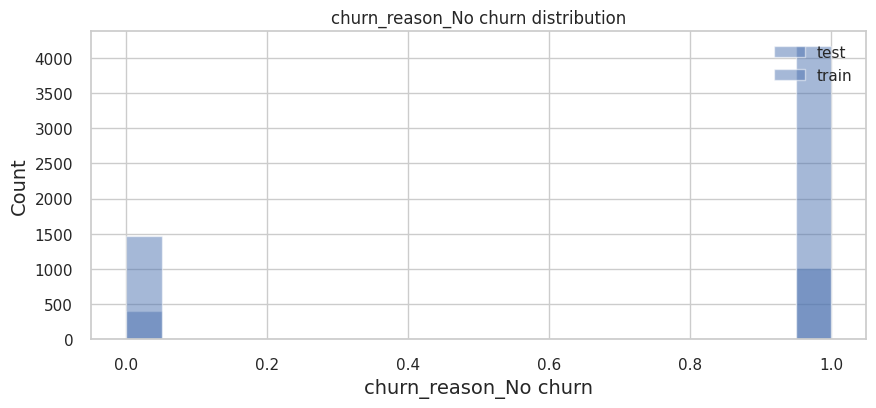

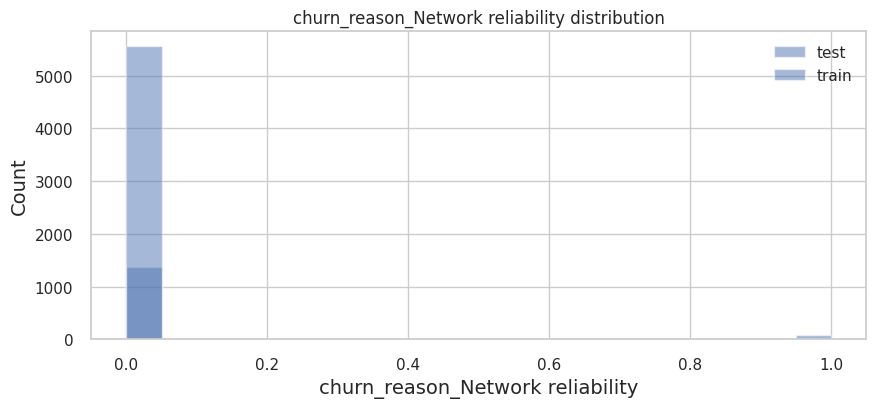

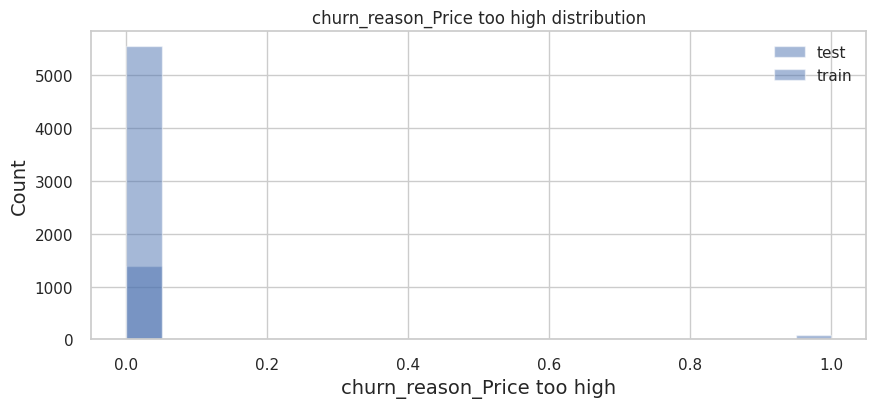

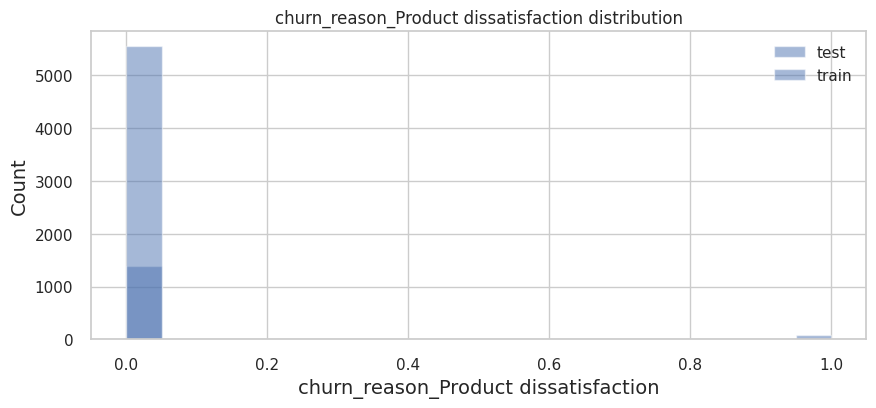

In [101]:
# check the feature wise distribution by Test, Train, Validation Sets
columns_to_visualize = ['customerid_0003-MKNFE', 'count', 'churn_reason_Lack of self-service on Website', 'churn_reason_No churn', 'churn_reason_Network reliability', 'churn_reason_Price too high', 'churn_reason_Product dissatisfaction']
for col in columns_to_visualize:
    plt.figure(figsize=(10,4))
    plt.hist(X_test[col], bins=20, alpha=0.5, label="test", color='b')
    plt.hist(X_train[col], bins=20, alpha=0.5, label="train", color='b')
    plt.xlabel(col, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(col))
    plt.show()

 The distribution of features is consistent across train and test sets, especially when dealing with stratified data or when the target variable has imbalanced classes.

### Do the training and test sets have the same data?

In [102]:
# Check if training and test sets have the same data
train_features_set = set(X_train_balanced.columns)
test_features_set = set(X_test.columns)

if train_features_set == test_features_set:
    print("Training and test sets have the same features.")
else:
    print("Training and test sets have different features.")

Training and test sets have the same features.


<----------- Model Performance with Test set ----------->
model: LogisticRegression(random_state=0)
Accuracy_score: 0.9907735982966643


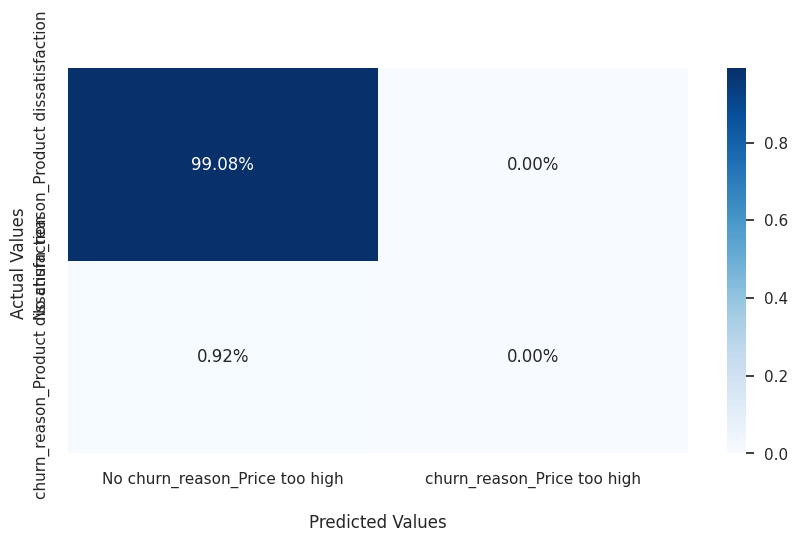

In [105]:
# lets build a Logistic Model and check the model performance with Test and Validation Sets.
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr_y_predict = lr.predict(X_test)

print("<----------- Model Performance with Test set ----------->")
print(f'model: {str(lr)}')
print(f'Accuracy_score: {accuracy_score(y_test,lr_y_predict)}')


cm = confusion_matrix(y_test,lr_y_predict)
plt.figure(figsize=(10,5))
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No churn_reason_Price too high','churn_reason_Price too high'])
ax.yaxis.set_ticklabels(['No churn_reason_Product dissatisfaction','churn_reason_Product dissatisfaction'])
plt.show()

1. Model Accuracy:
The accuracy score provided is approximately 0.99, which means that the model correctly predicted about 99.0% of the outcomes in the test set.

Given the model's accuracy and the distribution of predictions in the confusion matrix, you can determine that the model is better at predicting the negative class churn_reason_Price too high  than the positive class churn_reason_Product dissatisfaction  This could be due to class imbalance or other factors in the dataset that might require further investigation, such as feature selection, data preprocessing, or trying different algorithms.

2. Confusion Matrix:
The confusion matrix is displayed as a heatmap, showing the percentages of true positive, true negative, false positive, and false negative predictions.

In [106]:
# Explicitly select only numeric columns for quantile computation
numeric_data = data.select_dtypes(include=[np.number])

# Compute quantiles for numeric data only
Q1 = numeric_data.quantile(0.25, numeric_only=True)
Q3 = numeric_data.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Define a mask for the non-outlier range
mask = ~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to the original DataFrame to get a DataFrame without outliers
data_no_outliers = data[mask]

print(data_no_outliers)

#data_no_outliers.head()

      customerid  count        country       state          city  \
0     3668-QPYBK    0.0  United States  California   Los Angeles   
1     9237-HQITU    0.0  United States  California   Los Angeles   
2     9305-CDSKC    0.0  United States  California   Los Angeles   
3     7892-POOKP    0.0  United States  California   Los Angeles   
4     0280-XJGEX    0.0  United States  California   Los Angeles   
...          ...    ...            ...         ...           ...   
7038  2569-WGERO    0.0  United States  California       Landers   
7039  6840-RESVB    0.0  United States  California      Adelanto   
7040  2234-XADUH    0.0  United States  California         Amboy   
7041  4801-JZAZL    0.0  United States  California  Angelus Oaks   
7042  3186-AJIEK    0.0  United States  California  Apple Valley   

                    lat_long  gender senior_citizen partner dependents  ...  \
0     33.964131, -118.272783    Male             No      No         No  ...   
1      34.059281, -118.30

In [107]:
target = telco['churn_value']
telco = telco[features]

one hot encoding for catgorical data

In [110]:
target.value_counts()

1    1869
Name: churn_value, dtype: int64

# AutoML

In [111]:
min_mem_size=6
run_time=222

In [112]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [113]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:48279..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7nzx63gz
  JVM stdout: /tmp/tmp7nzx63gz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7nzx63gz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:48279
Connecting to H2O server at http://127.0.0.1:48279 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    1 month and 3 days
H2O_cluster_name:           H2O_from_python_unknownUser_fw76m9
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    5 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:48279
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

**Importing Data**

Once H2O is initialized, in the below code we are importing the data into a h2o dataframe.

In [114]:
# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/mrunalipawar97/DSE/main/Telco_customer_churn.csv"
df = h2o.import_file(path = url)
dff = pd.read_csv('https://raw.githubusercontent.com/mrunalipawar97/DSE/main/Telco_customer_churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [115]:
dff.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

In [116]:
dff.describe()

Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000000  
25%          35.500000     0.000000    40.000000  3469.000000  
50%          70.350000     0.000000    61.000000  4527.000000  
75%          89.850000     1.000000    75.000000  5380.500000  
max         118.750000     1.000000   100.000000  6500.000000

The results highlight critical factors such as tenure, billing, and churn scores as potential areas of interest for further analysis to predict churn. Also the distribution of CLTV suggests that there is a wide range in the value that customers bring to the company, which can impact retention strategies.

In [117]:
import plotly.express as px
import pandas as pd

dff.dropna(
    axis=0,
    how='any',
    inplace=True
)


color_scale = 'Viridis'

# Create the scatter mapbox plot
fig = px.scatter_mapbox(dff,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="City",
                        hover_data=["Zip Code", "Monthly Charges", "Churn Value"],
                        color="Monthly Charges",
                        color_continuous_scale=color_scale,
                        zoom=8,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [120]:
column_types = df.types

# Initialize lists for numeric and categorical columns
numeric_columns = []
categorical_columns = []

# Iterate through the columns and segregate based on type
for column, dtype in column_types.items():
    if dtype == 'enum':
        categorical_columns.append(column)
    elif dtype in ['int', 'real']:
        numeric_columns.append(column)


In [121]:
df.shape

(7043, 33)

In [122]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [123]:
print(df_train.shape)
print(df_test.shape)

(5710, 33)
(1333, 33)


In [124]:
#Display all columns in X
X=df.columns
print(X)

['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']


In [125]:
# separate the target variable (dependent variable) from the features (independent variables)

y_numeric ='Churn Value'
X.remove(y_numeric)
print(X)

['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason']


In [126]:
dfpd=pd.read_csv("https://raw.githubusercontent.com/mrunalipawar97/DSE/main/sampleData.csv")

# H20 AutoML Execution
Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time..

In [127]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |
04:15:04.456: _train param, Dropping bad and constant columns: [Country, CustomerID, Count, State]
04:15:04.456: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███

**Interpreting the above results**

**Pre-Processing and Model Setup**
Dropping Columns: The AutoML process identified that columns Country, CustomerID, Count, and State are either bad (possibly containing irrelevant or single unique value data) or constant (having the same value across all rows) and dropped them from the analysis. These columns are not useful for predictive modeling because they do not provide any information that contributes to the model's ability to learn variability in the data.

**Target Variable**
Binary Classification: The response column (Churn Value) has been detected to have only two unique values, 0 and 1, which suggests that this is a binary classification problem, not a regression problem.

**Model Training and Validation**
1. Model Key: H2OGradientBoostingEstimator has been used, which is an implementation of Gradient Boosting Machine (GBM). The model key GBM_5_AutoML_1_20231102_52144 suggests it is one of the models trained during the AutoML run.
2. Model Performance: The model has been trained, and various metrics have been reported:
3. MSE (Mean Squared Error): Near zero values for both training and cross-validation suggest the model is predicting almost perfectly on this dataset.
4. RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error): Similarly, these are also near zero, indicating high accuracy.
5. RMSLE (Root Mean Squared Logarithmic Error): Also near zero, which is good for models where you care about percentage errors.
6. Mean Residual Deviance: Another metric that is near zero, suggesting the residuals (differences between predicted and actual values) are minimal.

**Variable Importance:** The model has found Churn Reason to be the most important variable, followed by Churn Label and Churn Score. This indicates that these features are the most predictive of churn in your dataset. However, given that Churn Reason and Churn Label are likely directly derived from whether a customer has churned, they would not be used in a real predictive model as they would not be known ahead of time. Churn Score might also be a result of a predictive model or scoring system itself, so care should be taken to ensure you're not including features that would not be available or would be a form of data leakage.

In [ ]:
print(aml.leaderboard)

model_id                                                       rmse          mse          mae        rmsle    mean_residual_deviance
GBM_5_AutoML_1_20231212_04128                           3.53677e-07  1.25087e-13  2.13263e-07  2.72555e-07               1.25087e-13
XGBoost_3_AutoML_1_20231212_04128                       1.43538e-05  2.06032e-10  1.27174e-05  9.63932e-06               2.06032e-10
GBM_4_AutoML_1_20231212_04128                           1.82445e-05  3.3286e-10   7.48955e-06  1.51098e-05               3.3286e-10
XGBoost_2_AutoML_1_20231212_04128                       2.69779e-05  7.27809e-10  1.37619e-05  1.69803e-05               7.27809e-10
GBM_2_AutoML_1_20231212_04128                           0.000136378  1.85989e-08  6.84166e-05  0.000104508               1.85989e-08
StackedEnsemble_AllModels_2_AutoML_1_20231212_04128     0.000558713  3.1216e-07   0.000495205  0.000375412               3.1216e-07
StackedEnsemble_AllModels_1_AutoML_1_20231212_04128     0.000559222  3.

# Analysing relation between all variables

The Variance Inflation Factor (VIF) is a measure of multicollinearity among the predictor variables in a regression model. Multicollinearity occurs when two or more predictor variables are highly correlated with one another, which can make it difficult to ascertain the effect of each predictor on the response variable

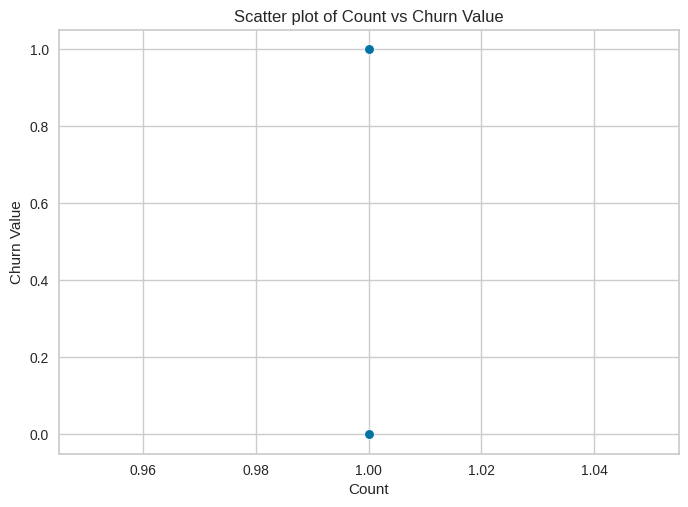

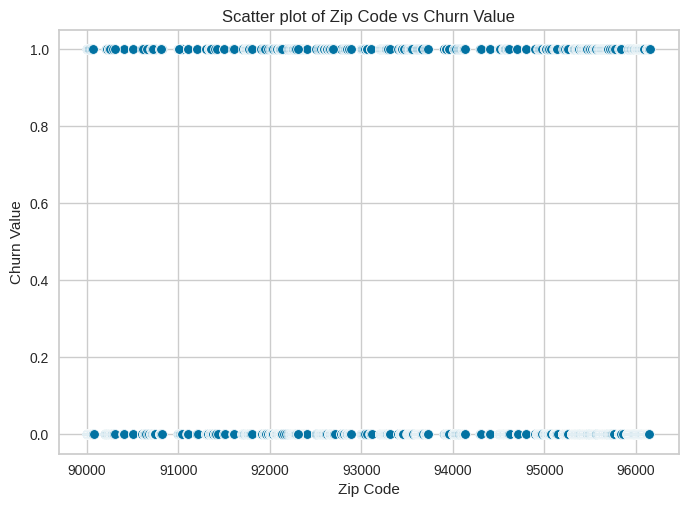

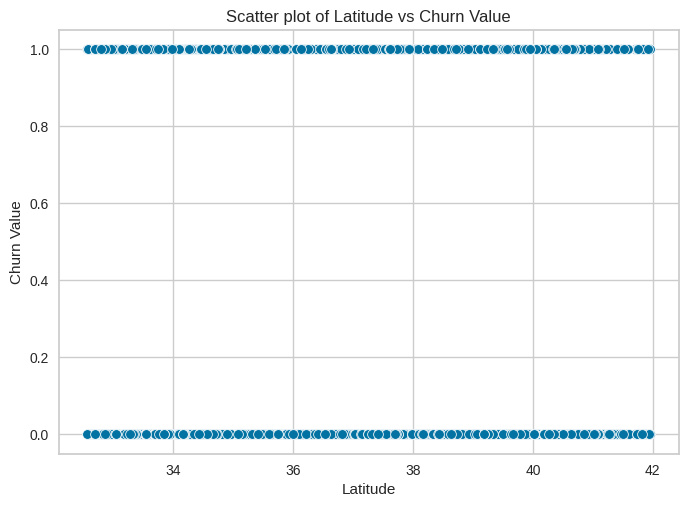

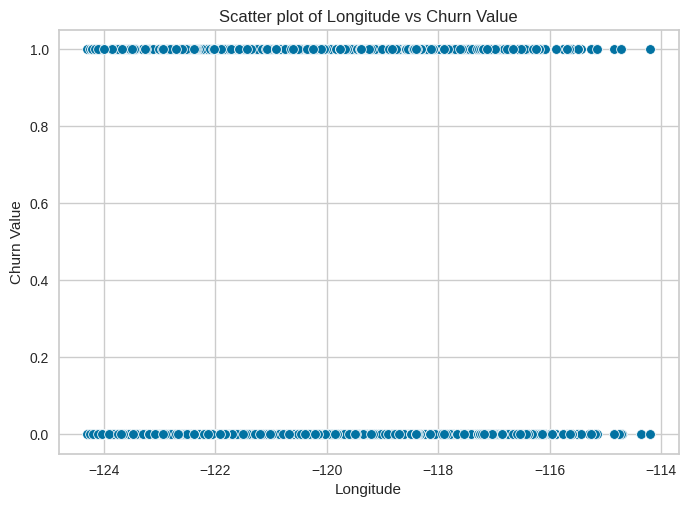

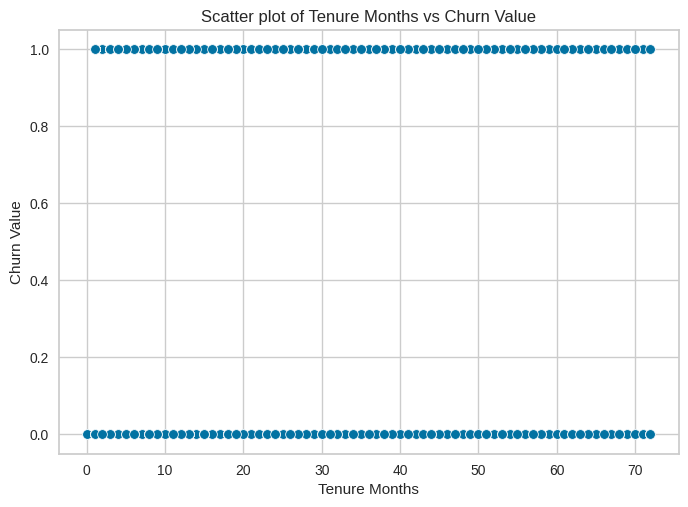

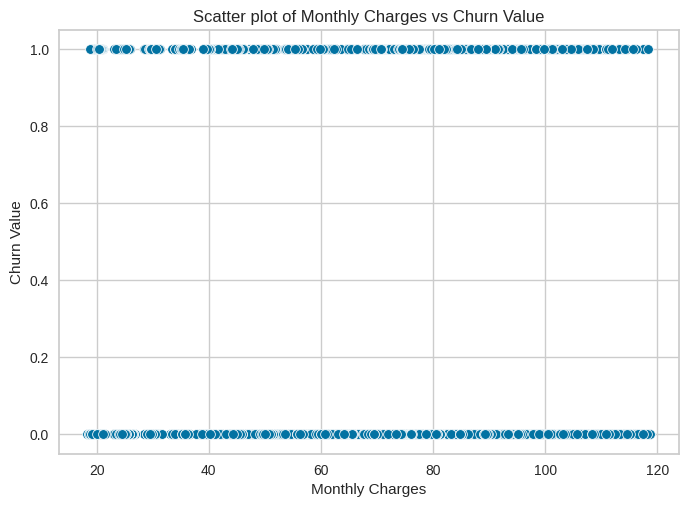

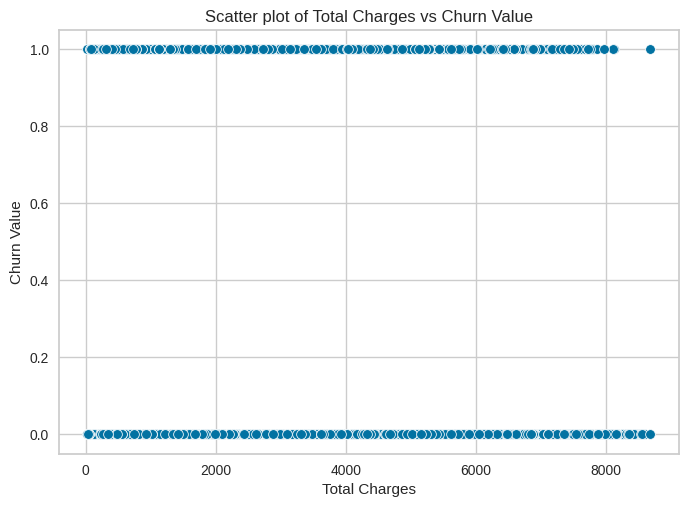

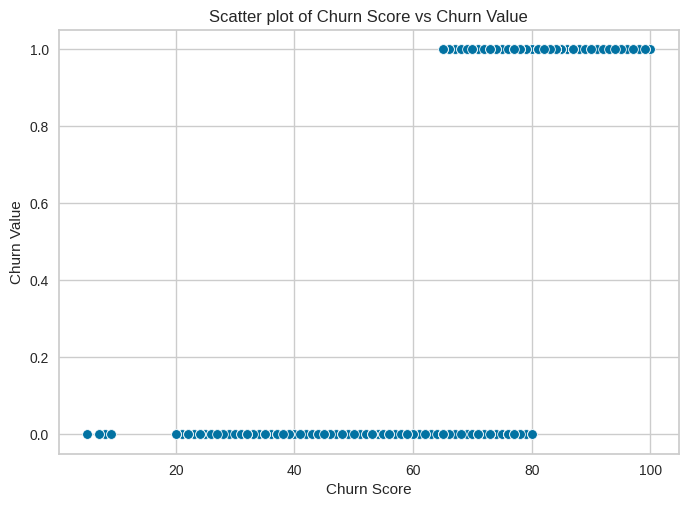

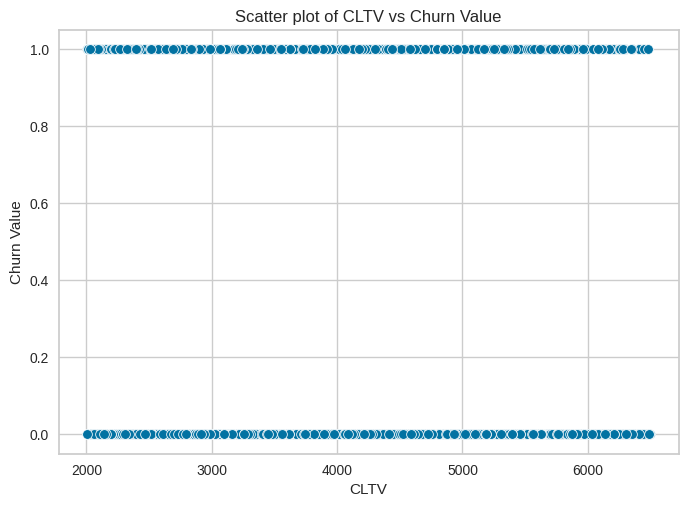

In [ ]:
# Create scatter plots for all numeric independent variables against the target variable.
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through all numeric columns and plot them against the target variable 'Churn Value'
numeric_columns = ['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']

for column in numeric_columns:
    if column != 'Churn Value':
        sns.scatterplot(x=dfpd[column], y=dfpd['Churn Value'])
        plt.title(f'Scatter plot of {column} vs Churn Value')
        plt.xlabel(column)
        plt.ylabel('Churn Value')
        plt.show()

Interpreting VIF Results:

VIF = 1: No multicollinearity.

1 < VIF < 5: Moderate multicollinearity.

VIF >= 5: High multicollinearity (some sources suggest 5 as the cutoff, others suggest 10).

In [ ]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select specific columns for VIF calculation
Multic = dfpd[['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']]

# Handle missing and infinite values
# Option 1: Drop rows with any NaN or infinite values
Multic = Multic.replace([np.inf, -np.inf], np.nan).dropna()

# Option 2 (alternative): Replace NaN or infinite values with the mean (or another specific value)
# Multic = Multic.replace([np.inf, -np.inf], np.nan).fillna(Multic.mean())

# Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]

# Display VIF for each variable
print(vif)

         variables           VIF
0            Count  15076.320078
1         Zip Code      5.067917
2         Latitude      8.431464
3        Longitude      4.326434
4    Tenure Months      5.984889
5  Monthly Charges      3.534182
6    Total Charges      9.744505
7      Churn Value      2.089641
8      Churn Score      1.793322
9             CLTV      1.189739


1. Count (VIF = 15076.32):
A significantly high VIF, indicating that the Count variable is highly correlated with other independent variables.
2. Zip Code (VIF = 5.07):
Moderate VIF, just crossing the often-used threshold of 5, suggesting some level of multicollinearity but may not be severe enough to necessitate immediate action.
3. Latitude (VIF = 8.43):
Approaching the higher end, suggesting that there might be substantial multicollinearity involving this variable. Investigating correlations with other variables could help understand this further.
4. Longitude (VIF = 4.33):
A reasonable VIF value, indicating a moderate level of multicollinearity but likely not problematic.
5.Tenure Months (VIF = 5.98):
A slightly elevated VIF, which could indicate the presence of some multicollinearity, suggesting that it might be worth investigating the role of this variable further.
6. Monthly Charges (VIF = 3.53) and others with VIF less than 5:
These variables have VIF values below 5, generally considered acceptable. This indicates that these variables have a lower presence of multicollinearity.


The variable Count shows a high VIF value, indicating a strong multicollinearity issue and may need to be dropped or further investigated. Some variables like Latitude and Tenure Months show moderate multicollinearity and may require closer inspection or adjustments. Others, like Longitude, Monthly Charges, Churn Value, Churn Score, and CLTV, have VIF values that suggest acceptable levels of multicollinearity, making them suitable for inclusion in the model without immediate concern for multicollinearity.

Ordinary least squares (OLS) regression is a statistical method of analysis used for multivariate model that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable.

In [ ]:
import statsmodels.formula.api as smf

# Assuming 'dfpd' is your pandas DataFrame with the proper columns.
# Make sure to one-hot encode categorical variables as shown in the previous message if necessary.

# The formula for OLS needs to have variable names without spaces, or quoted if they contain spaces.
# Replace 'Churn Value' with 'Churn_Value' if that's the column's name in your dataframe.
# ols_formula = 'Q("Churn Value") ~ Q("Zip Code") + Q("Latitude") + Q("Longitude") + Q("Tenure Months") + Q("Monthly Charges") + Q("Total Charges") + Q("Churn Score") + Q("CLTV")'

results = smf.ols('Q("Churn Value") ~ Q("Zip Code") + Q("Latitude") + Q("Longitude") + Q("Tenure Months") + Q("Monthly Charges") + Q("Total Charges") + Q("Churn Score") + Q("CLTV")', data=dfpd).fit()

# View the summary of the regression results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Q("Churn Value")   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     956.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:45:20   Log-Likelihood:                -1641.5
No. Observations:                7032   AIC:                             3301.
Df Residuals:                    7023   BIC:                             3363.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6903      0.448     -1.542      0.123      -1.568       0.187
Q("Zip Code")         2.475e-06    4.4e-06      0.563      0.574   -6.15e-06    1.11e-05
Q("Latitude")           -0.0004      0.004     -0.098      0.922      -0.009       0.008
Q("Longitude")           0.0007      0.004      0.200      0.841      -0.006       0.008
Q("Tenure Months")      -0.0019      0.000     -5.264      0.000      -0.003      -0.001
Q("Monthly Charges")     0.0043      0.000     19.578      0.000       0.004       0.005
Q("Total Charges")   -4.628e-05   4.99e-06     -9.271      0.000   -5.61e-05   -3.65e-05
Q("Churn Score")         0.0118      0.000     65.949      0.000       0.011       0.012
Q("CLTV")             4.539e-06   3.36e-06      1.349      0.177   -2.06e-06    1.11e-05
==============================================================================
Omnibus:                      431.045   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.207
Skew:                           0.047   Prob(JB):                     2.68e-35
Kurtosis:                       2.269   Cond. No.                     1.15e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The significance of the model and the coefficients for Tenure Months, Monthly Charges, Total Charges, and Churn Score suggest these are important variables in predicting churn. Now will check VIF and p-values again for the selected independent variables.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# Assuming 'dfpd' is your pandas DataFrame
# Replace spaces in column names if necessary
dfpd.columns = [col.replace(" ", "_") for col in dfpd.columns]

# Check for missing values and infinities and handle them
# Option 1: Drop rows with any NaN or infinite values
dfpd = dfpd.replace([np.inf, -np.inf], np.nan).dropna()

# Option 2: Fill NaN values with a specific value or a computed value (e.g., mean of the column)
# dfpd = dfpd.replace([np.inf, -np.inf], np.nan).fillna(method='ffill')  # Forward fill
# dfpd = dfpd.replace([np.inf, -np.inf], np.nan).fillna(dfpd.mean())  # Fill with mean

# Select the columns for VIF calculation
vif_columns = dfpd[['Zip_Code', 'Latitude', 'Longitude', 'Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'Churn_Score', 'CLTV']]
# Add a constant for the intercept
vif_columns = add_constant(vif_columns)

# Initialize DataFrame to store VIF values
vif_df = pd.DataFrame()
vif_df["Variable"] = vif_columns.columns

# Compute the VIF for each feature, avoiding TypeError
vif_df["VIF"] = [variance_inflation_factor(vif_columns.values, i) for i in range(vif_columns.shape[1])]

print(vif_df)

          Variable           VIF
0            const  15071.217760
1         Zip_Code      5.067689
2         Latitude      8.431453
3        Longitude      4.326409
4    Tenure_Months      5.961367
5  Monthly_Charges      3.351270
6    Total_Charges      9.626676
7      Churn_Score      1.107478
8             CLTV      1.189431


1. const (VIF = 15071.217760):
The VIF for the constant (intercept) term is generally high and not of primary concern when assessing multicollinearity amongst predictor variables.
2. Zip_Code (VIF = 5.067689):
This VIF is slightly above 5, indicating moderate multicollinearity. It suggests that the Zip_Code variable has some linear relationship with other variables, but it’s not necessarily problematic.
3. Latitude (VIF = 8.431453):
A VIF above 8 suggests a higher degree of multicollinearity with other variables in the model, making Latitude a candidate for further inspection and possible remediation.
4. Longitude (VIF = 4.326409):
The Longitude variable shows a VIF below 5, generally considered an acceptable level, indicating that multicollinearity is likely not a significant issue for this variable.
5.Tenure_Months (VIF = 5.961367):
Tenure_Months has a VIF close to 6, indicating a moderate level of multicollinearity that may warrant a closer look.
6. Monthly_Charges (VIF = 3.351270):
This variable shows a relatively low VIF, indicating a lesser degree of multicollinearity.
7. Total_Charges (VIF = 9.626676):
A VIF close to 10 suggests notable multicollinearity, making Total_Charges a candidate for further investigation to understand its relationships with other variables.
8. Churn_Score (VIF = 1.107478) and CLTV (VIF = 1.189431):
These variables have VIFs close to 1, which is ideal, indicating very low multicollinearity.

The variables Latitude and Total_Charges have higher VIFs, indicating a stronger presence of multicollinearity, and might need further examination or adjustment. Variables like Zip_Code and Tenure_Months have moderate VIFs, suggesting they could also be reviewed for multicollinearity. The remaining variables appear to have acceptable VIFs, indicating that multicollinearity is likely not a significant issue for them in this model.


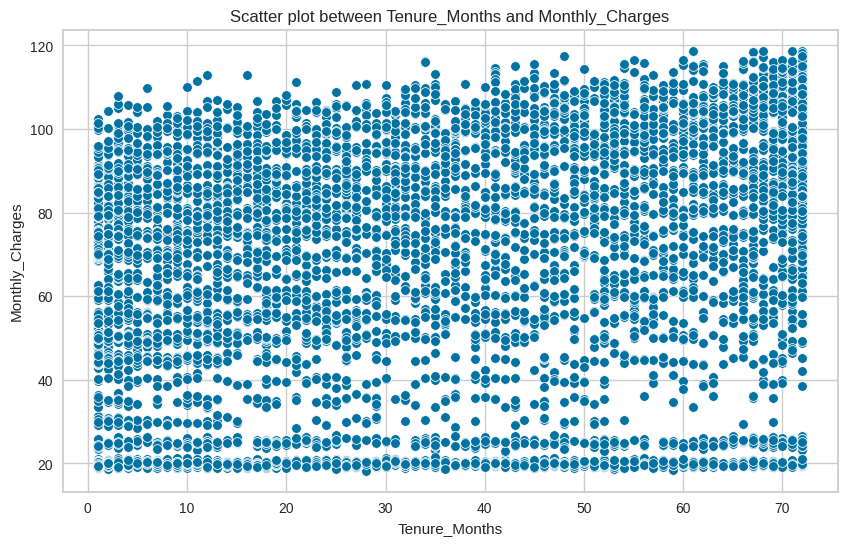

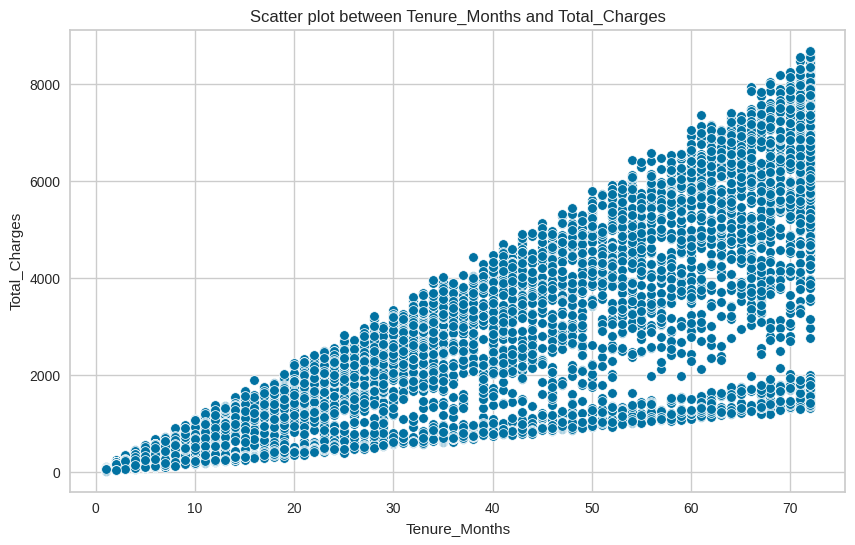

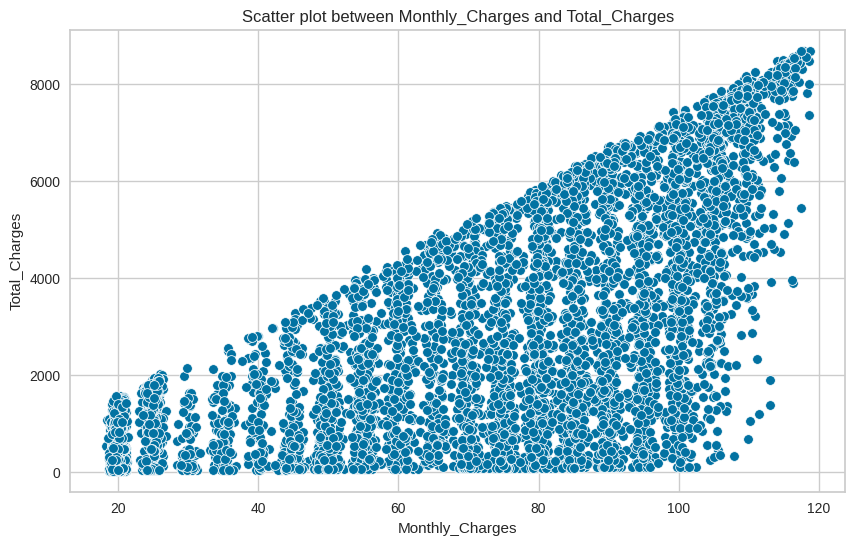

In [ ]:
# Before making changes, it is also worth plotting the relationships between Tenure_Months, Monthly_Charges, and Total_Charges to understand how they interact

import matplotlib.pyplot as plt
import seaborn as sns


# Scatter plot between Tenure_Months and Monthly_Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfpd, x='Tenure_Months', y='Monthly_Charges')
plt.title('Scatter plot between Tenure_Months and Monthly_Charges')
plt.show()

# Scatter plot between Tenure_Months and Total_Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfpd, x='Tenure_Months', y='Total_Charges')
plt.title('Scatter plot between Tenure_Months and Total_Charges')
plt.show()

# Scatter plot between Monthly_Charges and Total_Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfpd, x='Monthly_Charges', y='Total_Charges')
plt.title('Scatter plot between Monthly_Charges and Total_Charges')
plt.show()

Since there isn't a strong linear trend visible in the scatter plot, Tenure_Months might not be a strong linear predictor of Monthly_Charges. The lack of a clear pattern suggests that other variables not included in this two-dimensional plot might interact with Tenure_Months to influence Monthly_Charges.

The scatter plot suggests that there is some degree of linear association between Tenure_Months and Total_Charges. This could be contributing to multicollinearity in your regression model.

Given that there’s a visible positive trend, it’s likely that Monthly_Charges and Total_Charges could introduce multicollinearity in a regression model if used together. This is consistent with the VIF values you obtained earlier, where Total_Charges had a high VIF.

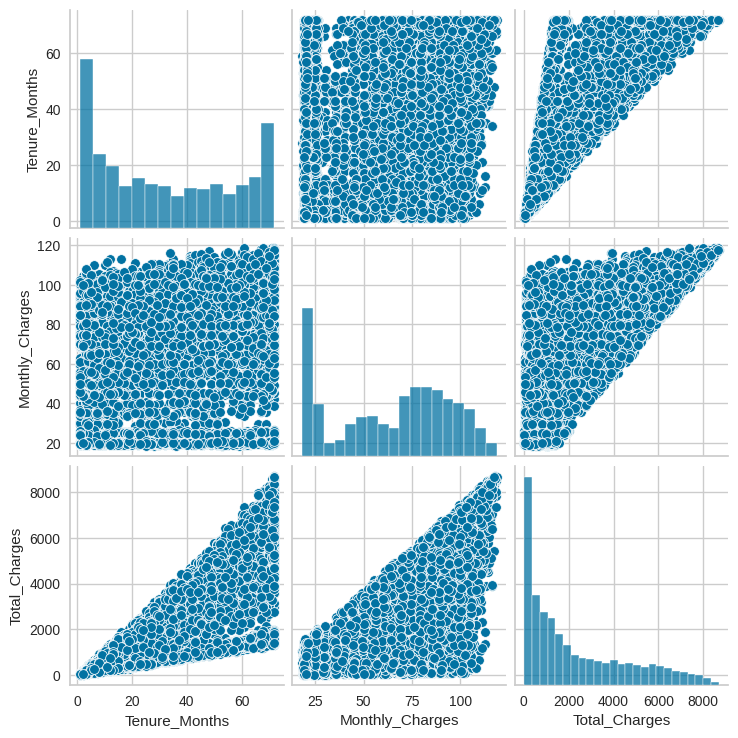

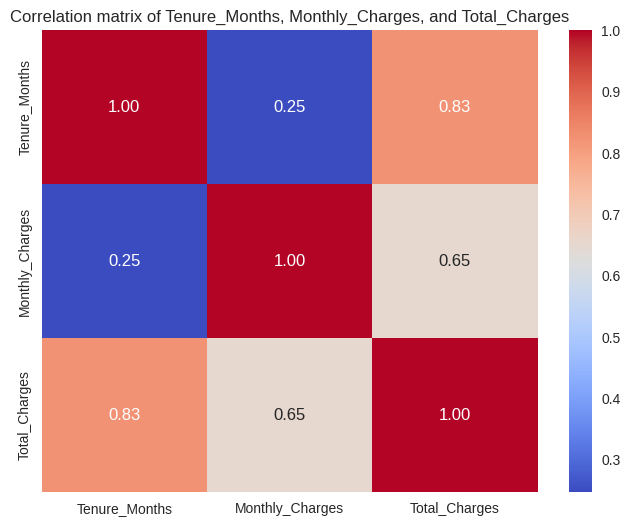

In [ ]:
# Pairplot can be used to show all the relationships at once, including the distribution of each variable
sns.pairplot(data=dfpd, vars=['Tenure_Months', 'Monthly_Charges', 'Total_Charges'])
plt.show()

# Calculate and visualize the correlation matrix
correlation_matrix = dfpd[['Tenure_Months', 'Monthly_Charges', 'Total_Charges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix of Tenure_Months, Monthly_Charges, and Total_Charges')
plt.show()

In [ ]:
import statsmodels.formula.api as smf

# Assuming 'dfpd' is your pandas DataFrame with the proper columns.
# Make sure to one-hot encode categorical variables as shown in the previous message if necessary.

# The formula for OLS needs to have variable names without spaces, or quoted if they contain spaces.

#Zip_Code', 'Latitude', 'Longitude', 'Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'Churn_Score', 'CLTV'

results = smf.ols('Q("Churn_Value") ~ Q("Zip_Code") + Q("Latitude") + Q("Longitude") + Q("Tenure_Months") + Q("Monthly_Charges") + Q("Total_Charges") + Q("Churn_Score") + Q("CLTV")', data=dfpd).fit()

# View the summary of the regression results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Q("Churn_Value")   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     956.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:45:27   Log-Likelihood:                -1641.5
No. Observations:                7032   AIC:                             3301.
Df Residuals:                    7023   BIC:                             3363.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6903      0.448     -1.542      0.123      -1.568       0.187
Q("Zip_Code")         2.475e-06    4.4e-06      0.563      0.574   -6.15e-06    1.11e-05
Q("Latitude")           -0.0004      0.004     -0.098      0.922      -0.009       0.008
Q("Longitude")           0.0007      0.004      0.200      0.841      -0.006       0.008
Q("Tenure_Months")      -0.0019      0.000     -5.264      0.000      -0.003      -0.001
Q("Monthly_Charges")     0.0043      0.000     19.578      0.000       0.004       0.005
Q("Total_Charges")   -4.628e-05   4.99e-06     -9.271      0.000   -5.61e-05   -3.65e-05
Q("Churn_Score")         0.0118      0.000     65.949      0.000       0.011       0.012
Q("CLTV")             4.539e-06   3.36e-06      1.349      0.177   -2.06e-06    1.11e-05
==============================================================================
Omnibus:                      431.045   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.207
Skew:                           0.047   Prob(JB):                     2.68e-35
Kurtosis:                       2.269   Cond. No.                     1.15e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Most variables have high p-values (greater than 0.05), indicating that many are not statistically significant predictors of the target variable, except for Total_Charges and CLTV.

In [ ]:
#Dopping the unecessary features as discussed above
dfpd1=dfpd.drop(['Zip_Code','Latitude','Longitude'], axis=1)

dfpd1

Count  Tenure_Months  Monthly_Charges  Total_Charges  Churn_Value  \
0         1              2            53.85         108.15            1   
1         1              2            70.70         151.65            1   
2         1              8            99.65         820.50            1   
3         1             28           104.80        3046.05            1   
4         1             49           103.70        5036.30            1   
...     ...            ...              ...            ...          ...   
7038      1             72            21.15        1419.40            0   
7039      1             24            84.80        1990.50            0   
7040      1             72           103.20        7362.90            0   
7041      1             11            29.60         346.45            0   
7042      1             66           105.65        6844.50            0   

      Churn_Score  CLTV  
0              86  3239  
1              67  2701  
2              86  5372  
3              84  5003  
4              89  5340  
...           ...   ...  
7038           45  5306  
7039           59  2140  
7040           71  5560  
7041           59  2793  
7042           38  5097  

[7032 rows x 7 columns]

The correlation matrix is simply a table of correlations.Each random variable in the table is correlated with each of the other values in the table. This allows us to see which pairs have the highest correlation.It also tells us if it is directly dependent or inversely by signifying the positive and negative signs.

In [ ]:
#Calculating correlation matrix for all variables
dfpd1.corr()

Count  Tenure_Months  Monthly_Charges  Total_Charges  \
Count              NaN            NaN              NaN            NaN   
Tenure_Months      NaN       1.000000         0.246862       0.825880   
Monthly_Charges    NaN       0.246862         1.000000       0.651065   
Total_Charges      NaN       0.825880         0.651065       1.000000   
Churn_Value        NaN      -0.354049         0.192858      -0.199484   
Churn_Score        NaN      -0.226379         0.133556      -0.124312   
CLTV               NaN       0.396188         0.098565       0.341837   

                 Churn_Value  Churn_Score      CLTV  
Count                    NaN          NaN       NaN  
Tenure_Months      -0.354049    -0.226379  0.396188  
Monthly_Charges     0.192858     0.133556  0.098565  
Total_Charges      -0.199484    -0.124312  0.341837  
Churn_Value         1.000000     0.664970 -0.128253  
Churn_Score         0.664970     1.000000 -0.080837  
CLTV               -0.128253    -0.080837  1.000000

Representing the same matrix in form of heatmap where shades of blue signify inverse relation and shades of red signify direct relation.

Text(0.5, 1.0, 'Variable Correlation')

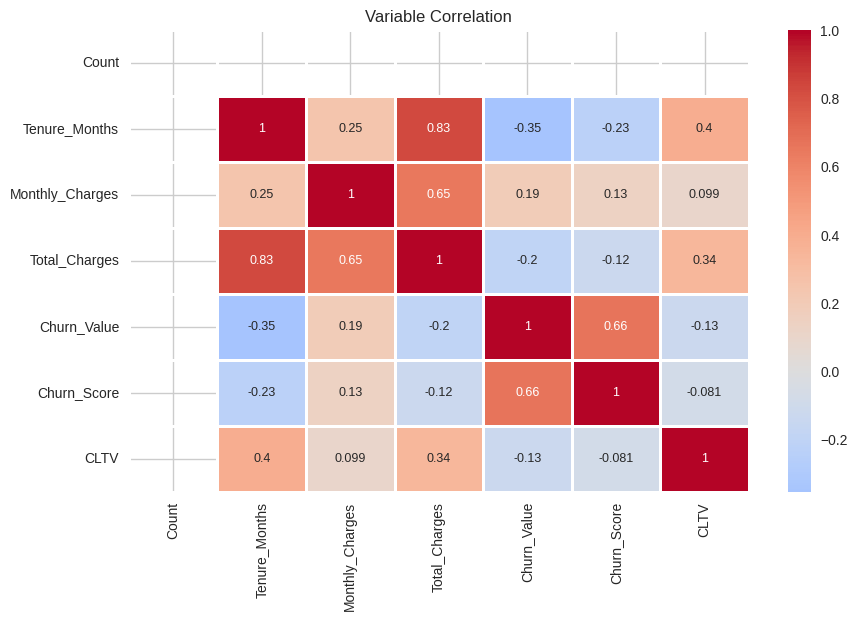

In [ ]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd1.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Variables such as Tenure_Months, Monthly_Charges, and Total_Charges show moderate to strong correlations, which is expected as they are related to billing and customer tenure.
The variable Churn_Value shows meaningful correlations with variables like Tenure_Months and Churn_Score, which could be important considerations in understanding and predicting customer churn.

Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical way.

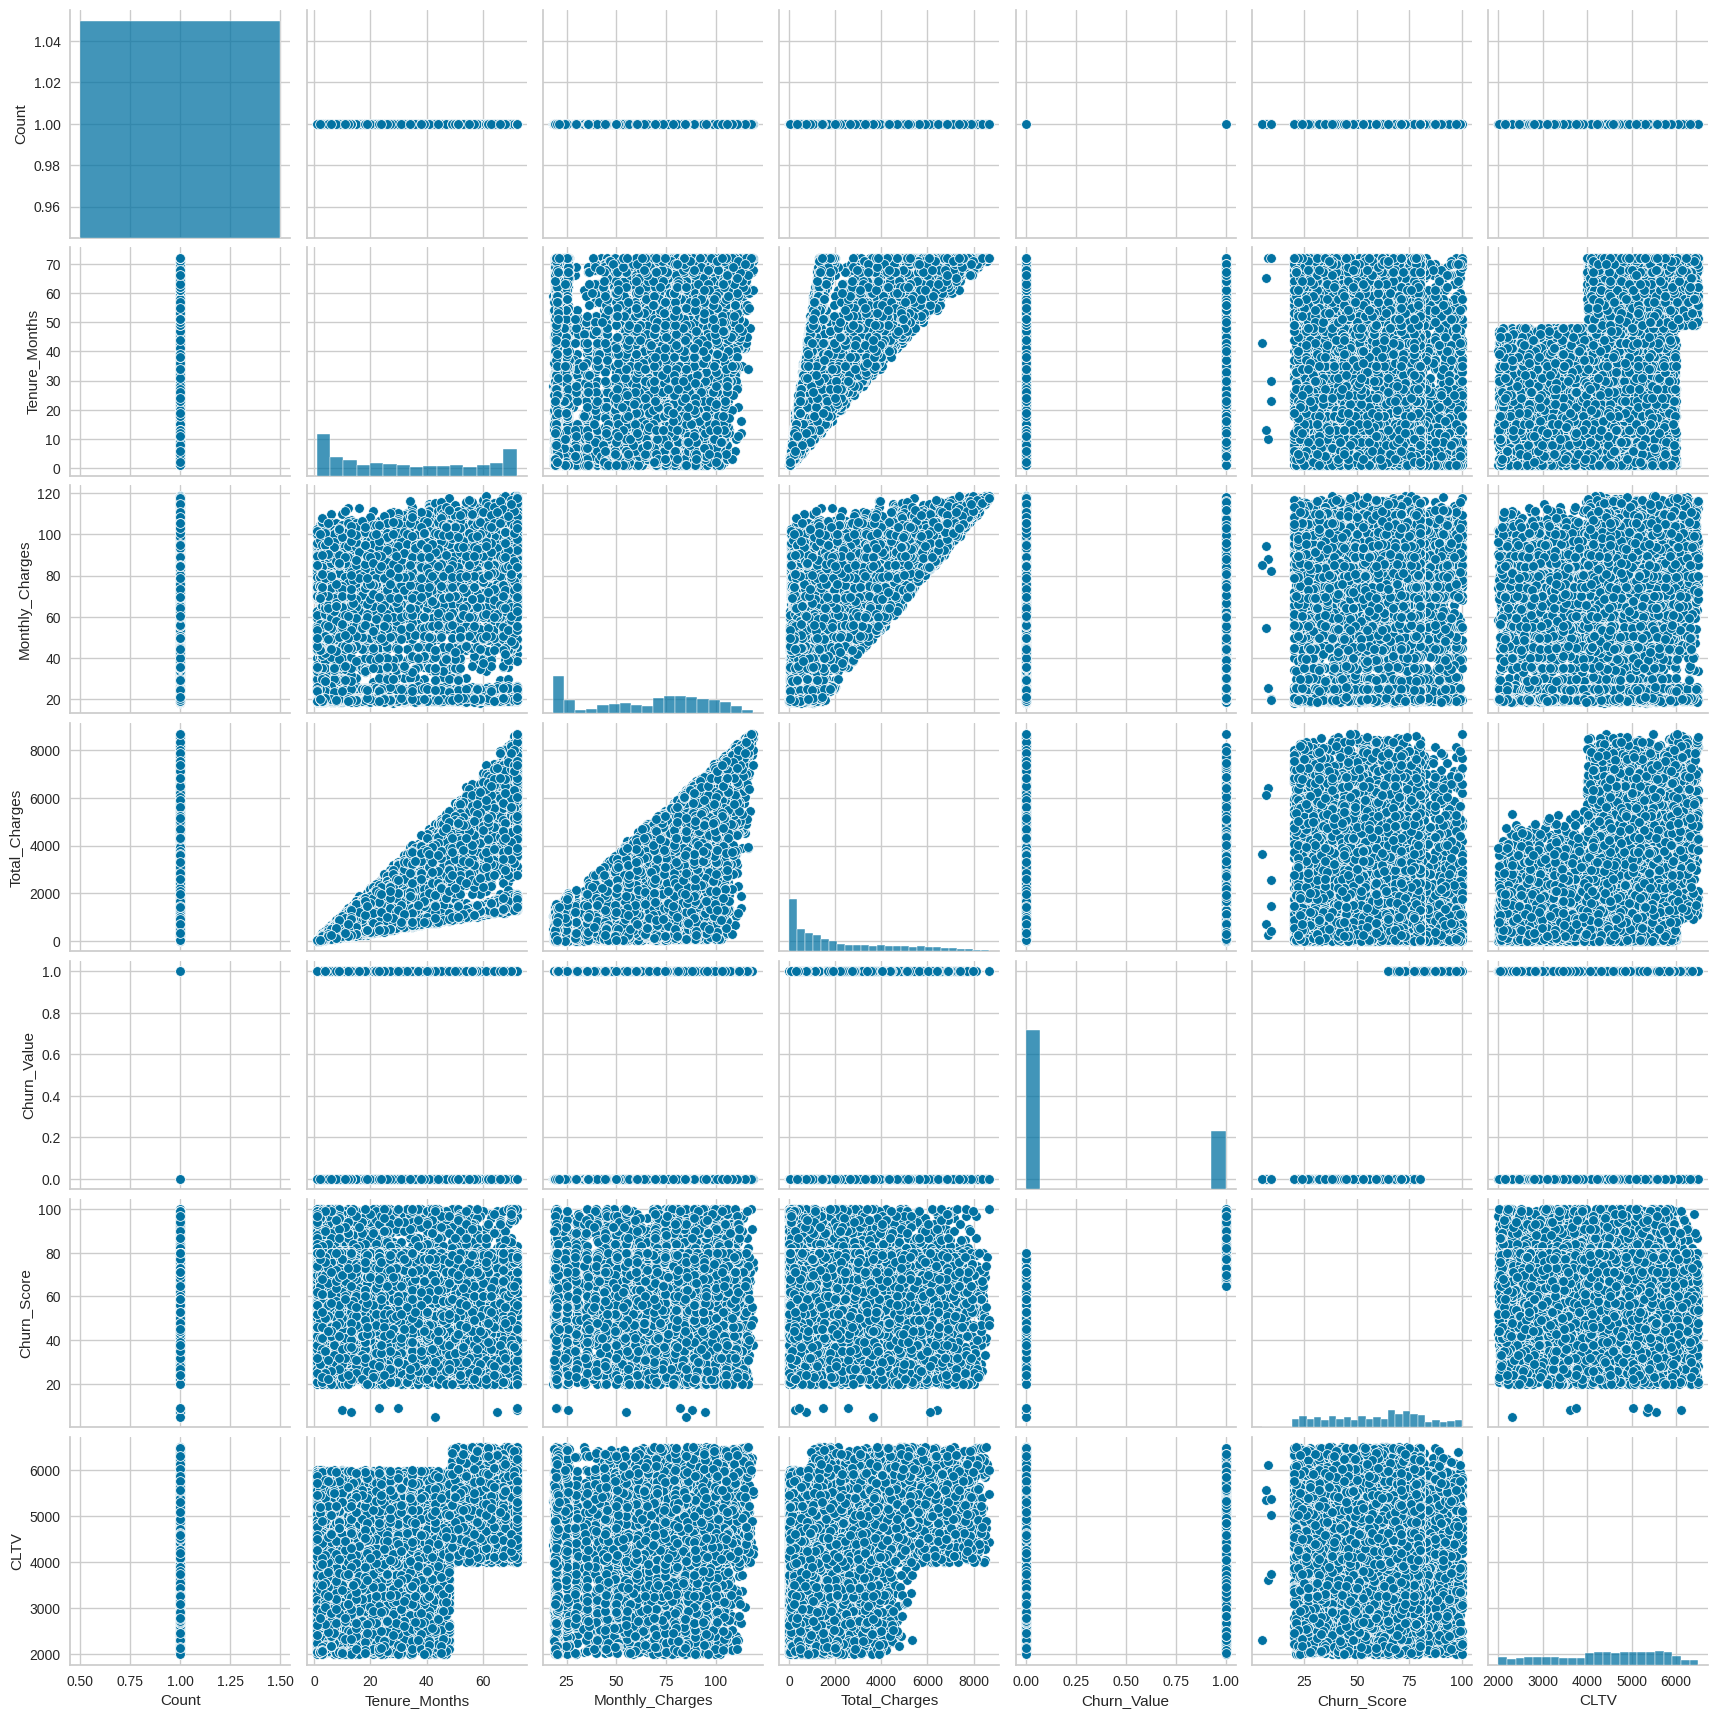

In [ ]:
sns.pairplot(dfpd1)

# **H20 AutoML Rexecution on new model**

Dropping the variables that are not significant for determining Churn Value. Passing this new model again through H20AutoML. Here, we are repeating the entire process exactly as above whilst ignoring the unecessary features.

In [ ]:
df1 = df.drop(['Zip Code','Latitude','Longitude'], axis=1)

In [ ]:
#df1_train, df1_test = df1.split_frame([pct_rows])

from sklearn.model_selection import train_test_split

#df1_train, df1_test = train_test_split(df1_pandas, train_size=pct_rows)
# Assuming df1 is an H2O Frame
#df1_train, df1_test = df1.split_frame(ratios=[pct_rows])

# Create a 80/20 train/test split
pct_rows = 0.80

df1_train, df1_test = df1.split_frame(ratios=[pct_rows])

# Print the split datasets
print("Training Set:\n", df1_train)
print("\nTest Set:\n", df1_test)


Training Set:
 CustomerID      Count  Country        State       City         Lat Long                Gender    Senior Citizen    Partner    Dependents      Tenure Months  Phone Service    Multiple Lines    Internet Service    Online Security      Online Backup        Device Protection    Tech Support         Streaming TV         Streaming Movies     Contract        Paperless Billing    Payment Method               Monthly Charges    Total Charges  Churn Label      Churn Value    Churn Score    CLTV  Churn Reason
3668-QPYBK          1  United States  California  Los Angeles  33.964131, -118.272783  Male      No                No         No                          2  Yes              No                DSL                 Yes                  Yes                  No                   No                   No                   No                   Month-to-month  Yes                  Mailed check                           53.85           108.15  Yes                        1             86

In [ ]:
X1 = df1.columns
#X1_list = X1.tolist()
#print(X1_list)
print(X1)

['CustomerID', 'Count', 'Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']


In [ ]:
#Seperate Dependent variable from Independent variable
y1_numeric ='Churn Value'
# Now, you can remove 'Churn Value' from X1
X1.remove(y1_numeric)

# X1 should now contain all columns except 'Churn Value'
print(X1)

['CustomerID', 'Count', 'Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason']


In [ ]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
print(type(df1_train))

<class 'h2o.frame.H2OFrame'>


In [70]:
aml1.train(x=X1, y=y1_numeric, training_frame=df1_train)

AutoML progress: |
00:45:51.363: _train param, Dropping bad and constant columns: [Country, CustomerID, Count, State]
00:45:51.363: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
00:45:59.493: _train param, Dropping bad and constant columns: [Country, CustomerID, Count, State]
00:45:59.493: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█████
00:46:17.548: _train param, Dropping bad and constant columns: [Country, CustomerID, Count, State]
00:46:17.548: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categ

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_2_20231212_04551


Model Summary: 
    number_of_trees
--  -----------------
    60

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 2.0818388024317038e-10
RMSE: 1.442857859399776e-05
MAE: 1.2614040774889348e-05
RMSLE: 9.621893424389422e-06
Mean Residual Deviance: 2.0818388024317038e-10

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 2.070925344721591e-10
RMSE: 1.4390710005839152e-05
MAE: 1.266671130141634e-05
RMSLE: 9.62927731535233e-06
Mean Residual Deviance: 2.070925344721591e-10

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     1.26667e-05  1.09231e-07  1.26501e-05   1.2621e-05    1.25907e-05   1.28584e-05   1.26133e-05
mean_residual_deviance  2.07092e-10  6.83166e-12  2.05996e-10   2.03781e-10   2.03016e-10   2.19141e-10   2.03525e-10
mse                     2.07092e-10  6.83166e-12  2.05996e-10   2.03781e-10   2.03016e-10   2.19141e-10   2.03525e-10
r2                      1            0            1             1             1             1             1
residual_deviance       2.07092e-10  6.83166e-12  2.05996e-10   2.03781e-10   2.03016e-10   2.19141e-10   2.03525e-10
rmse                    1.43892e-05  2.34988e-07  1.43526e-05   1.42752e-05   1.42484e-05   1.48034e-05   1.42662e-05
rmsle                   9.62887e-06  9.75523e-08  9.61664e-06   9.59024e-06   9.56808e-06   9.7998e-06    9.5696e-06

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-12-12 00:47:43  4.556 sec   0                  0.5              0.5             0.25
    2023-12-12 00:47:43  4.667 sec   5                  0.0841152        0.0841152       0.00707537
    2023-12-12 00:47:43  4.711 sec   10                 0.014152         0.014152        0.000200278
    2023-12-12 00:47:43  4.751 sec   15                 0.0023808        0.00238079      5.66819e-06
    2023-12-12 00:47:43  4.793 sec   20                 0.000400567      0.000400561     1.60454e-07
    2023-12-12 00:47:43  4.834 sec   25                 6.74286e-05      6.73953e-05     4.54662e-09
    2023-12-12 00:47:43  4.876 sec   30                 1.53949e-05      1.5112e-05      2.37003e-10
    2023-12-12 00:47:43  4.910 sec   35                 1.44862e-05      1.3079e-05      2.09851e-10
    2023-12-12 00:47:43  4.945 sec   40                 1.44314e-05      1.27007e-05     2.08264e-10
    2023-12-12 00:47:43  4.985 sec   45                 1.44122e-05      1.2642e-05      2.07712e-10
    2023-12-12 00:47:43  5.021 sec   50                 1.44154e-05      1.26473e-05     2.07804e-10
    2023-12-12 00:47:43  5.057 sec   55                 1.44315e-05      1.26189e-05     2.08267e-10
    2023-12-12 00:47:43  5.093 sec   60                 1.44286e-05      1.2614e-05      2.08184e-10

Variable Importances: 
variable                  relative_importance    scaled_importance    percentage
------------------------  ---------------------  -------------------  ------------
Churn Label.No            889.015                1                    0.518835
Churn Reason.missing(NA)  812.152                0.913542             0.473977
Churn Score               12.2959                0.013831             0.00717598
Churn Label.Yes           0.0200041              2.25014e-05          1.16745e-05

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [71]:
print(aml1.leaderboard)

model_id                                                    rmse          mse          mae        rmsle    mean_residual_deviance
XGBoost_3_AutoML_2_20231212_04551                    1.43907e-05  2.07093e-10  1.26667e-05  9.62928e-06               2.07093e-10
XGBoost_grid_1_AutoML_2_20231212_04551_model_3       1.47304e-05  2.16985e-10  1.31311e-05  9.99206e-06               2.16985e-10
XGBoost_grid_1_AutoML_2_20231212_04551_model_4       1.47304e-05  2.16985e-10  1.31311e-05  9.99206e-06               2.16985e-10
GBM_4_AutoML_2_20231212_04551                        1.62697e-05  2.64705e-10  9.06791e-06  1.29215e-05               2.64705e-10
XGBoost_2_AutoML_2_20231212_04551                    2.12557e-05  4.51806e-10  1.35602e-05  1.47893e-05               4.51806e-10
XGBoost_grid_1_AutoML_2_20231212_04551_model_2       0.000111953  1.25334e-08  7.6582e-05   7.26178e-05               1.25334e-08
XGBoost_1_AutoML_2_20231212_04551                    0.000145166  2.10731e-08  4.02162e-05

In [72]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

{'XGBoost_3_AutoML_2_20231212_04551': 0, 'GLM_1_AutoML_2_20231212_04551': 21}

In [73]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

0


In [74]:
best_model1.algo

'xgboost'

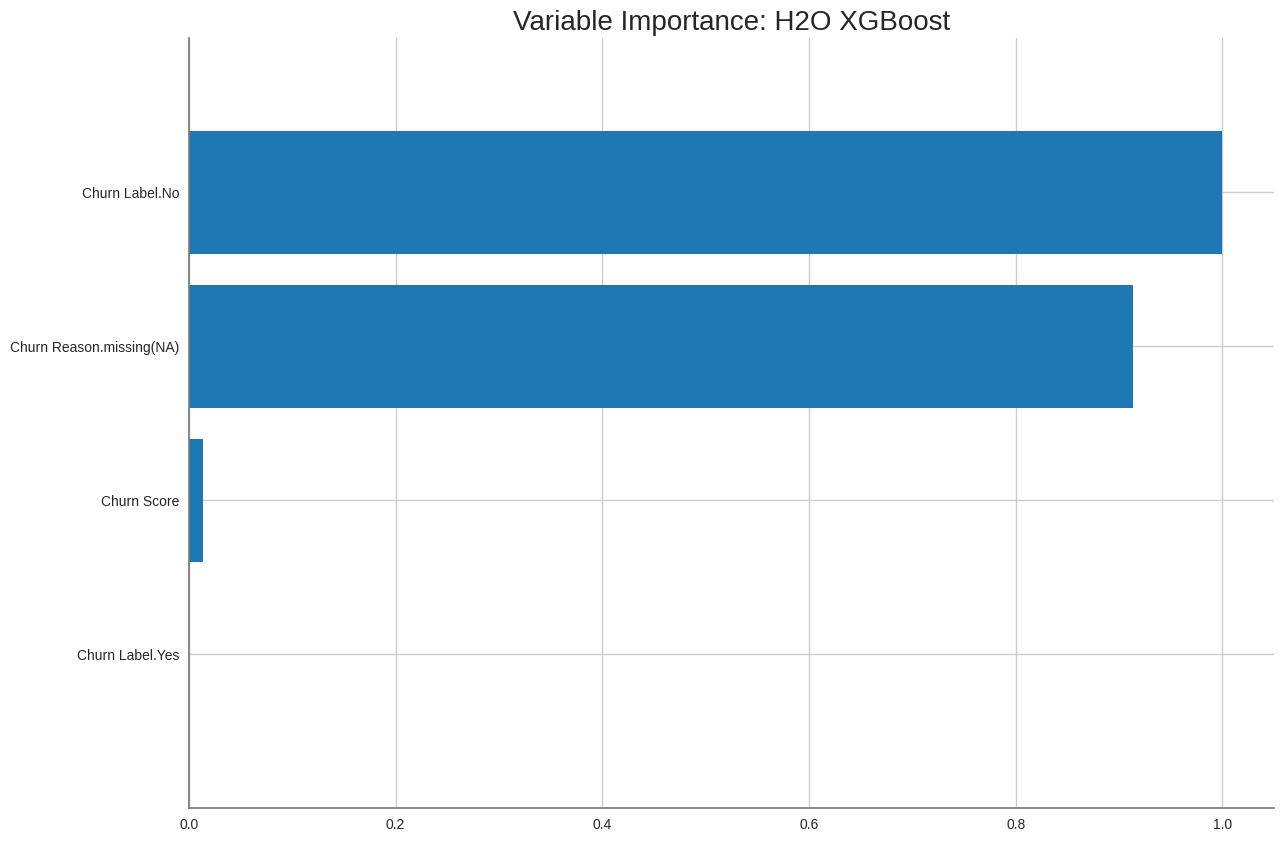

<Figure size 800x550 with 0 Axes>

In [75]:
#plot variables in order of their importance for price prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

21
glm


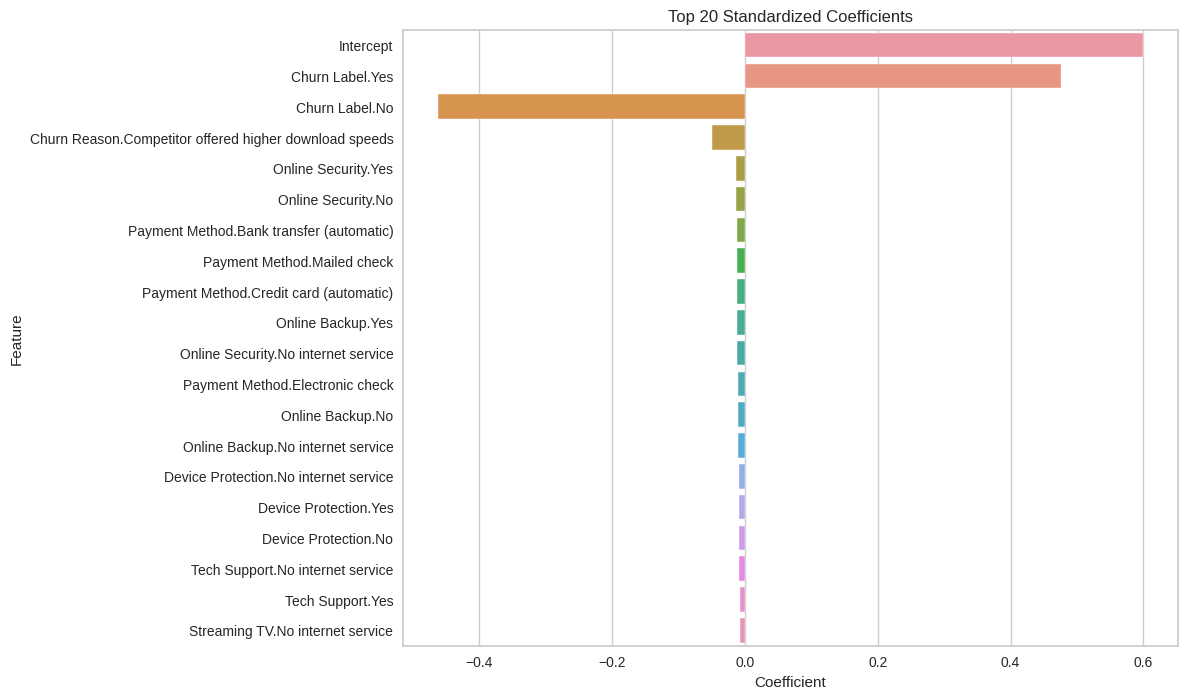

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

if glm_index != 0:
    print(glm_index)
    glm_model1 = h2o.get_model(aml1.leaderboard[glm_index, 'model_id'])
    print(glm_model1.algo)

    # Getting standardized coefficients
    coef = glm_model1.coef_norm()

    # Sorting coefficients by magnitude
    sorted_coef = sorted(coef.items(), key=lambda x: abs(x[1]), reverse=True)

    # Converting to DataFrame
    coef_df = pd.DataFrame(sorted_coef, columns=['Feature', 'Coefficient'])

    # Displaying only the top 20 coefficients
    coef_df = coef_df.head(20)

    # Creating a bar plot
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df)
    plt.title('Top 20 Standardized Coefficients')
    plt.show()

# Checking if assumptions violated

Checking if the model has violated any assumptions. For linear regression some of the assumptions are:

1. There needs to be linear relation between the independent and dependent variable.

2. Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.

3. Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.

4. There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.

In [77]:
#Seperating the predictor and target variables
A=dfpd1.drop(['Churn_Value'],axis=1)
B=dfpd1['Churn_Value']

In [78]:
#Splitting the data
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

Here we are check if the Homoscedasticity (normality of the error distribution) assumption is satisfies. A normal distribution of errors is expected.

In [79]:
cols1 = ['Count','Tenure_Months', 'Monthly_Charges', 'Total_Charges','Churn_Score', 'CLTV']
model1 = sm.OLS(b_train,sm.add_constant(A_train[cols1])).fit()

In [80]:
b_pred = model1.predict(sm.add_constant(A_train[cols1]))

In [81]:
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -9.53074656232881e-16


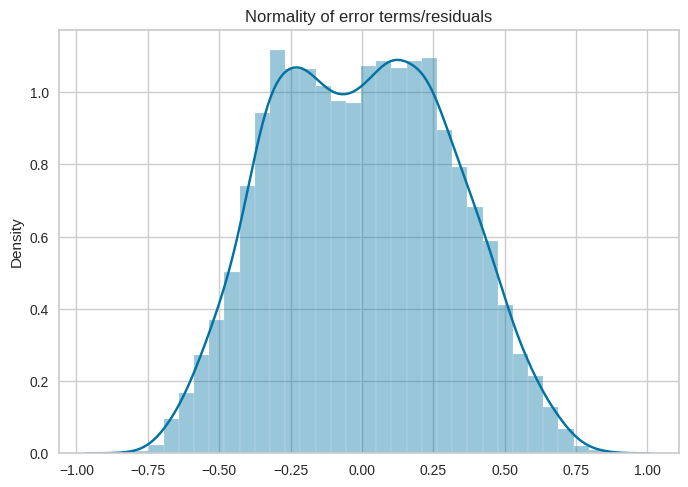

In [82]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The distribution of the residuals seems to be approximately normal (Gaussian), as indicated by the bell-shaped curve of the kernel density estimate (KDE) line.

The peak of the distribution is around zero, suggesting that the model's predictions are, on average, accurate—there's no systematic bias making predictions consistently too high or too low.

The residuals are spread between approximately -1 and 1, which indicates the range of the errors between the predicted and actual values.

There do not appear to be significant outliers on either tail of the distribution, which would show up as points or bars far from the central cluster of data.

The residuals represent the difference between the actual values and the values predicted by the model.

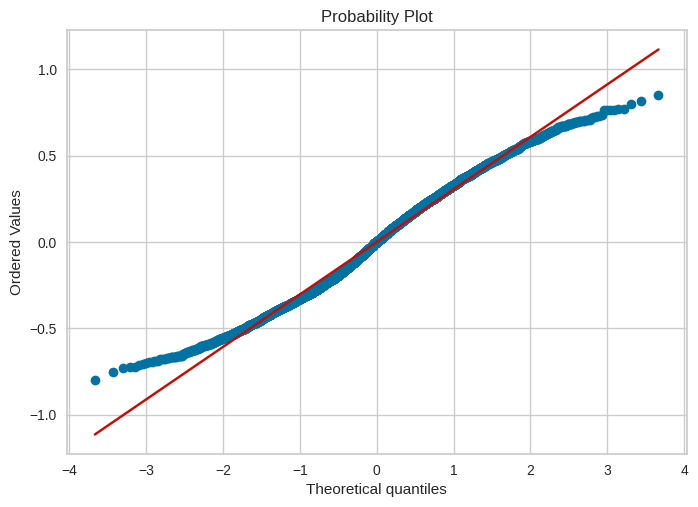

In [83]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Churn_Value', ylabel='Count'>

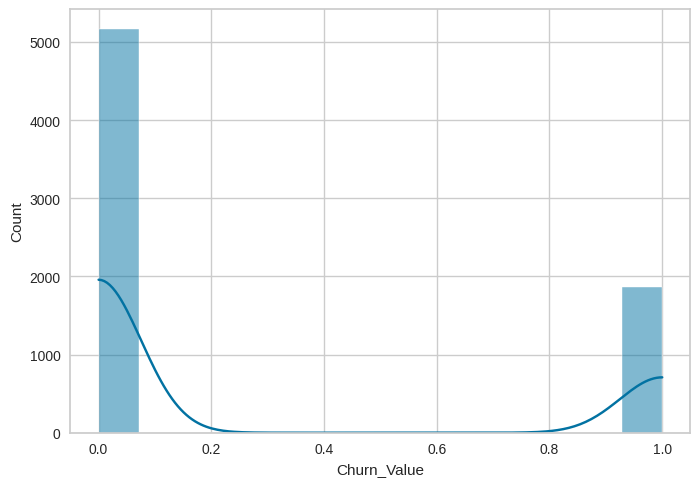

In [84]:
sns.histplot(dfpd.Churn_Value, kde = True)

Most values are concentrated around 0, suggesting that there are fewer instances of Churn Value = 1 in your dataset. This indicates that the data might be imbalanced with fewer churn cases.

# Ridge Regularization in H20

The main purpose of regression is to find patterns in this underlying dataset and generalize it to predict the corresponding target value for some new values of independent values. But sometimes target dataset is inflicted with some random noise. Although there may not be error for training set it will give huge errors in predicting the correct target values for test dataset.To avoid this condition regularization is used. Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. For this model, Ridge Regularization is used.

Here, we use H2OGeneralizedLinearEstimator which would enable us to fit a generalized linear model, specified by a response variable, a set of predictors and a description of the error distribution.

In [85]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
telco_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
telco_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [86]:
# Convert the pandas DataFrame to an H2OFrame
#df1_train_h2o = h2o.H2OFrame(df1_train)

# Now, you can train your model using the H2OFrame
telco_glm_regularization.train(x=X1, y=y1_numeric, training_frame=df1_train)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1702341646428_42


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  2851                          2842                           1                       py_9_sid_8b5a

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1.0357716251918154e-05
RMSE: 0.0032183406053303545
MAE: 0.0016867125553579694
RMSLE: 0.0020580161628387383
Mean Residual Deviance: 1.0357716251918154e-05
R^2: 0.9999470403814407
Null degrees of freedom: 5638
Residual degrees of freedom: 2796
Null deviance: 1102.8622096116221
Residual deviance: 0.05840716194456647
AIC: -43032.40578795921

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse          training_deviance       training_mae           training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ---------------------  ----------------------  ---------------------  ------------------
    2023-12-12 00:49:39  0.000 sec   0             1102.8622096116221         0.1955776218499064
    2023-12-12 00:49:39  3.075 sec   1                                                            0.0032183406053303545  1.0357716251918154e-05  0.0016867125553579694  0.9999470403814407

Variable Importances: 
variable                                                relative_importance    scaled_importance      percentage
------------------------------------------------------  ---------------------  ---------------------  ----------------------
Churn Label.No                                          0.4881218671798706     1.0                    0.24357623127398145
Churn Label.Yes                                         0.4881218671798706     1.0                    0.24357623127398145
Churn Reason.Competitor offered higher download speeds  0.01829826831817627    0.03748708990214823    0.009130964079794194
Lat Long.34.137412, -118.207607                         0.0036256161984056234  0.007427686490164148   0.00180920788235885
Lat Long.37.99272, -122.575026                          0.0030301508959382772  0.006207775352177944   0.0015120665248790168
City.San Anselmo                                        0.0030301508959382772  0.006207775352177944   0.0015120665248790168
Lat Long.34.445239, -117.894868                         0.0029114182107150555  0.005964531414123702   0.0014528180831675224
City.Pearblossom                                        0.0029114182107150555  0.005964531414123702   0.0014528180831675224
Lat Long.37.848641, -122.515692                         0.002906826324760914   0.005955124161011541   0.001450526699907822
City.Sausalito                                          0.002906826324760914   0.005955124161011541   0.001450526699907822
---                                                     ---                    ---                    ---
City.Crockett                                           4.738546977023361e-07  9.707712961929708e-07  2.3645681375564182e-07
Lat Long.34.18454, -119.224666                          0.0                    0.0                    0.0
Lat Long.37.684694, -122.40712                          0.0                    0.0                    0.0
Lat Long.37.80707, -122.297401                          0.0                    0.0                    0.0
Lat Long.38.047746, -121.030499                         0.0                    0.0                    0.0
Lat Long.40.737431, -124.108897                         0.0                    0.0                    0.0
Lat Long.41.266008, -120.490731                         0.0     

In [87]:
#Model details without regularization

#df1_train_h2o = h2o.H2OFrame(df1_train)

house_glm = H2OGeneralizedLinearEstimator(remove_collinear_columns=True,
                                          # other parameters
                                         )

house_glm.train(x=X1, y=y1_numeric, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1702341646428_43


GLM Model: summary
    family    link      regularization                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.05864 )  2851                          12                             1                       py_9_sid_8b5a

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 7.592807253304452e-32
RMSE: 2.755504899887578e-16
MAE: 2.0616439076114904e-16
RMSLE: 2.5835969201747383e-16
Mean Residual Deviance: 7.592807253304452e-32
R^2: 1.0
Null degrees of freedom: 5638
Residual degrees of freedom: 5626
Null deviance: 1102.8622096116221
Residual deviance: 4.2815840101383805e-28
AIC: -388034.69747241074

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse          training_deviance      training_mae            training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ---------------------  ---------------------  ----------------------  -------------
    2023-12-12 00:49:44  0.000 sec   0             1102.8622096116221         0.1955776218499064
    2023-12-12 00:49:44  0.055 sec   1                                                            2.755504899887578e-16  7.592807253304452e-32  2.0616439076114904e-16  1.0

Variable Importances: 
variable                      relative_importance     scaled_importance       percentage
----------------------------  ----------------------  ----------------------  ----------------------
Churn Label.Yes               1.0                     1.0                     0.999999999999998
Total Charges                 7.202071805179468e-16   7.202071805179468e-16   7.202071805179453e-16
Tenure Months                 6.776950733512863e-16   6.776950733512863e-16   6.776950733512849e-16
Contract.Month-to-month       2.6742788908508787e-16  2.6742788908508787e-16  2.6742788908508733e-16
Monthly Charges               2.322229763357126e-16   2.322229763357126e-16   2.3222297633571216e-16
Internet Service.Fiber optic  2.1683646403016063e-16  2.1683646403016063e-16  2.168364640301602e-16
Online Security.No            9.226594236820635e-17   9.226594236820635e-17   9.226594236820616e-17
Tech Support.No               7.095298537617735e-17   7.095298537617735e-17   7.09529853761772e-17
Online Backup.No              5.620371977964643e-17   5.620371977964643e-17   5.620371977964631e-17
Dependents.No                 2.5818563466491038e-17  2.5818563466491038e-17  2.5818563466490986e-17
---                           ---                     ---                     ---
Dependents.Yes                0.0                     0.0                     0.0
Paperless Billing.No          0.0                     0.0                     0.0
Paperless Billing.Yes         0.0                     0.0                     0.0
Phone Service.No              0.0                     0.0                     0.0
Phone Service.Yes             0.0                     0.0                     0.0
Churn Label.No                0.0                     0.0                     0.0
Gender.Female                 0.0                     0.0                     0.0
Gender.Male                   0.0                     0.0                     0.0
Churn Score                   0.0                     0.0                     0.0
CLTV                          0.0                     0.0                     0.0
[2851 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

The model with regularization seems more reasonable, given that it doesn’t fit the training data too perfectly, which might help in generalizing well to unseen data.

The model without regularization seems to overfit the training data, giving too much importance to specific patterns in the training data. It might not perform as well on new, unseen data because it might have fit the noise in the training data as well.

Given these results, I want to consider using the model with regularization for predictions, as it might generalize better to new data.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                       rmse          mse          mae        rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  -----------  -----------  -----------  -----------  ------------------------  ------------------  -------------------------  ---------------
DRF_1_AutoML_2_20231212_04551                           0            0            0            0                         0                           225                   0.012494  DRF
XGBoost_grid_1_AutoML_2_20231212_04551_model_3          1.02731e-05  1.05536e-10  9.16834e-06  7.01931e-06               1.05536e-10                1748                   0.002653  XGBoost
XGBoost_grid_1_AutoML_2_20231212_04551_model_4          1.02731e-05  1.05536e-10  9.16834e-06  7.01931e-06               1.05536e-10                 547                   0.002409  XGBoost
XGBoost_2_AutoML_2_20231212_04551                       1.42284e-05  2.02448e-10  1.26131e-05  9.62919e-06               2.02448e-10                 834                   0.001743  XGBoost
XGBoost_3_AutoML_2_20231212_04551                       1.4311e-05   2.04804e-10  1.25126e-05  9.59732e-06               2.04804e-10                 551                   0.002176  XGBoost
GBM_4_AutoML_2_20231212_04551                           1.53316e-05  2.35058e-10  8.37986e-06  1.2247e-05                2.35058e-10                3495                   0.046204  GBM
XGBoost_1_AutoML_2_20231212_04551                       1.5898e-05   2.52747e-10  1.26193e-05  1.01965e-05               2.52747e-10                1023                   0.005359  XGBoost
XGBoost_grid_1_AutoML_2_20231212_04551_model_2          6.14744e-05  3.77911e-09  5.3702e-05   4.40522e-05               3.77911e-09                 590                   0.002422  XGBoost
StackedEnsemble_AllModels_3_AutoML_2_20231212_04551     0.000438891  1.92625e-07  0.000388193  0.000296092               1.92625e-07                 460                   0.059317  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20231212_04551     0.000439376  1.93051e-07  0.000388607  0.000296535               1.93051e-07                 536                   0.079804  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_2_20231212_04551     0.000439998  1.93598e-07  0.000389192  0.000296878               1.93598e-07                 450                   0.055333  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_2_20231212_04551  0.000441167  1.94628e-07  0.000389943  0.000297689               1.94628e-07                 571                   0.065376  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_2_20231212_04551  0.000459134  2.10804e-07  0.000404818  0.000308753               2.10804e-07                 679                   0.136426  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20231212_04551  0.000532966  2.84053e-07  0.00036085   0.000373568               2.84053e-07                1145                   0.075512  StackedEnsemble
XGBoost_grid_1_AutoML_2_20231212_04551_model_1          0.000655337  4.29466e-07  0.000582948  0.000445667               4.29466e-07                 758                   0.002584  XGBoost
GBM_1_AutoML_2_20231212_04551                           0.000714387  5.10349e-07  0.000496806  0.000612259               5.10349e-07                3898                   0.089329  GBM
GBM_5_AutoML_2_20231212_04551                           0.000731543  5.35155e-07  0.000345466  0.000595052               5.35155e-07                1964                   0.047975  GBM
XGBoost_grid_1_AutoML_2_20231212_04551_model_5          0.00194167   3.77008e-06  0.000930179  0.0015666                 3.77008e-06                 813                   0.004051  XGBoost
GBM_grid_1_AutoML_2_20231212_04551_model_2              0.00425416   1.80979e-05  0.00376283   0.00286993                1.80979e-05                 327                   0.005867  GB

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

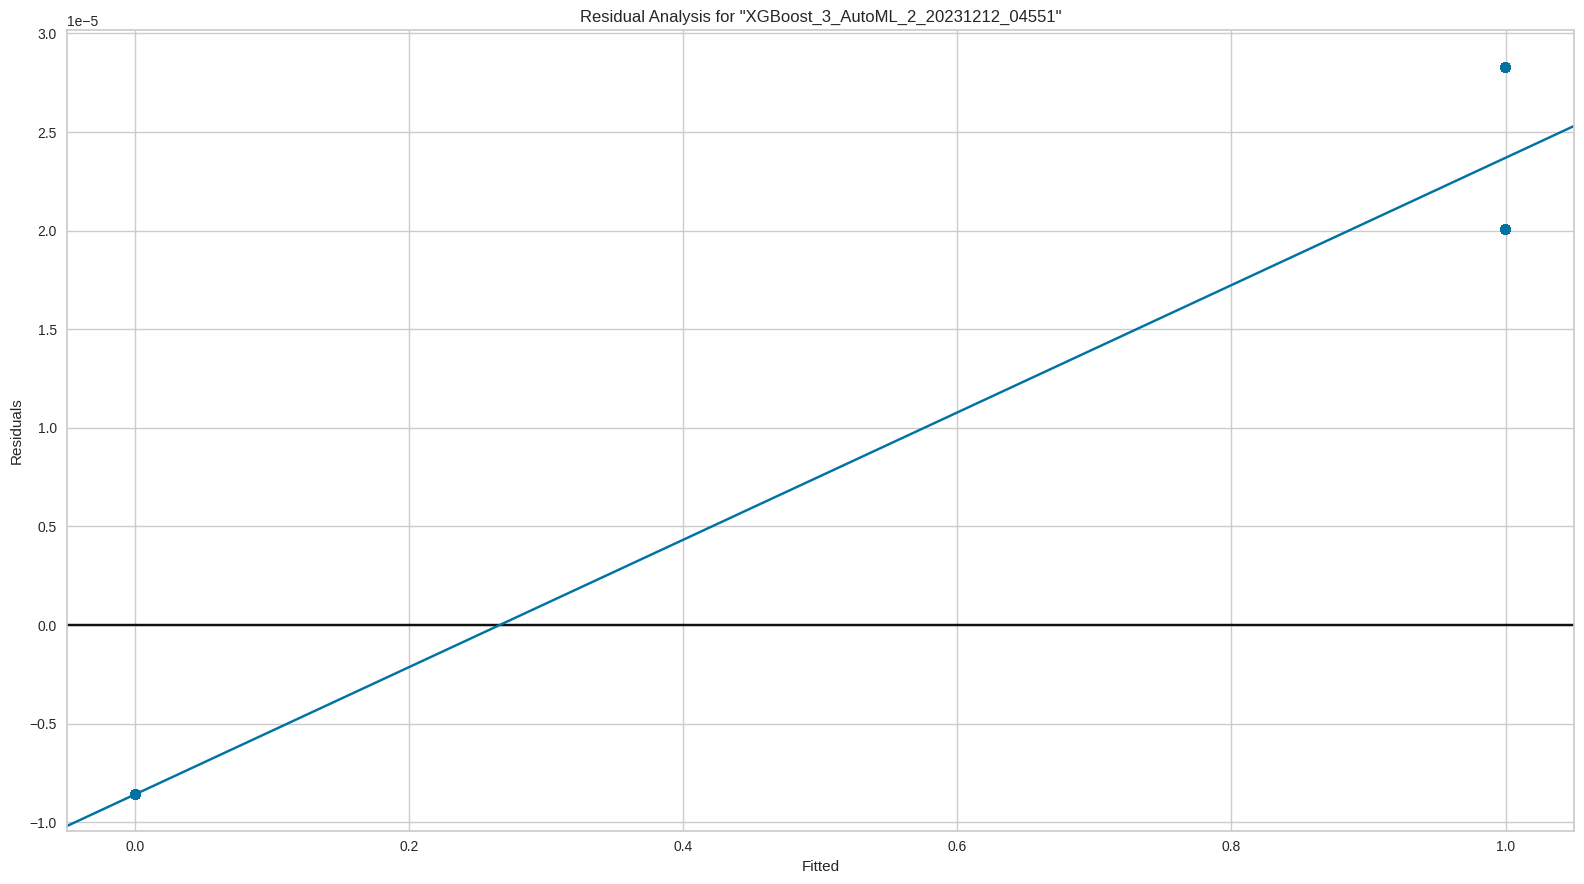

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

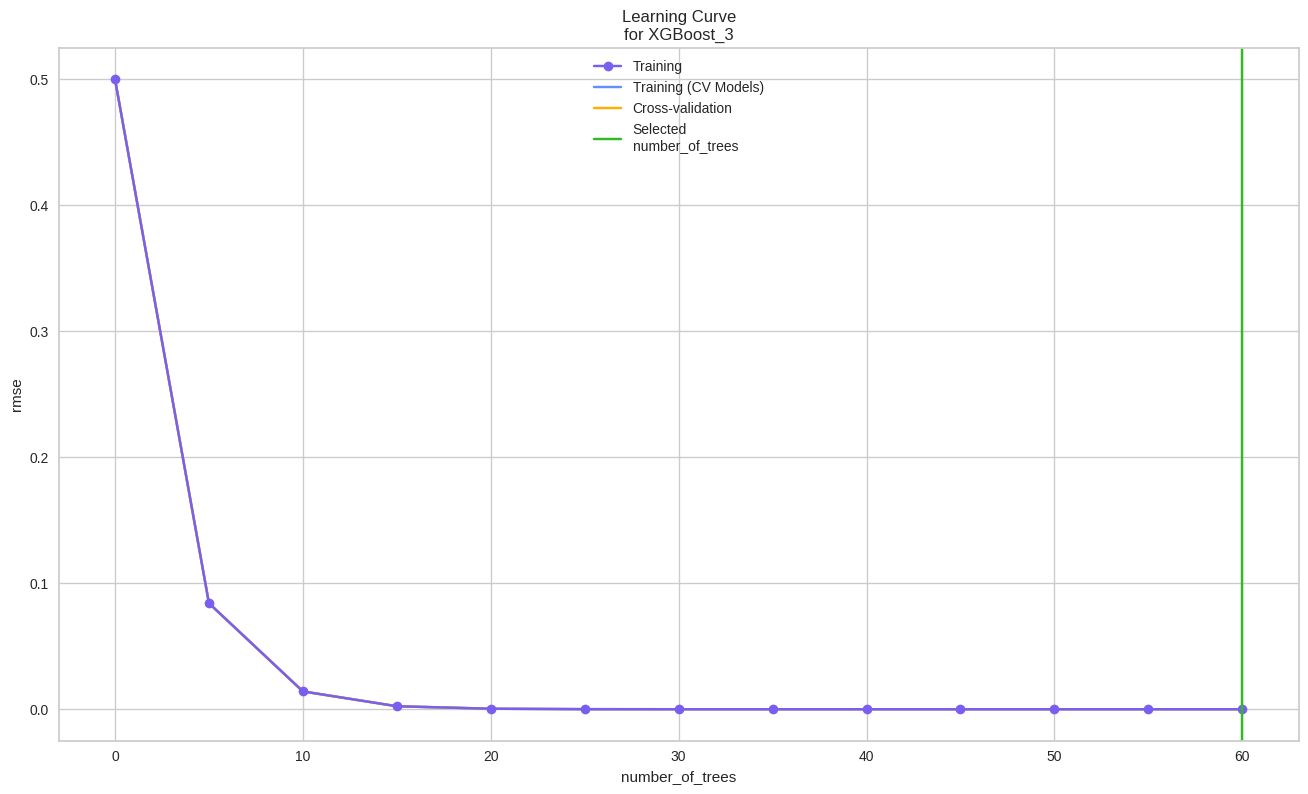

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

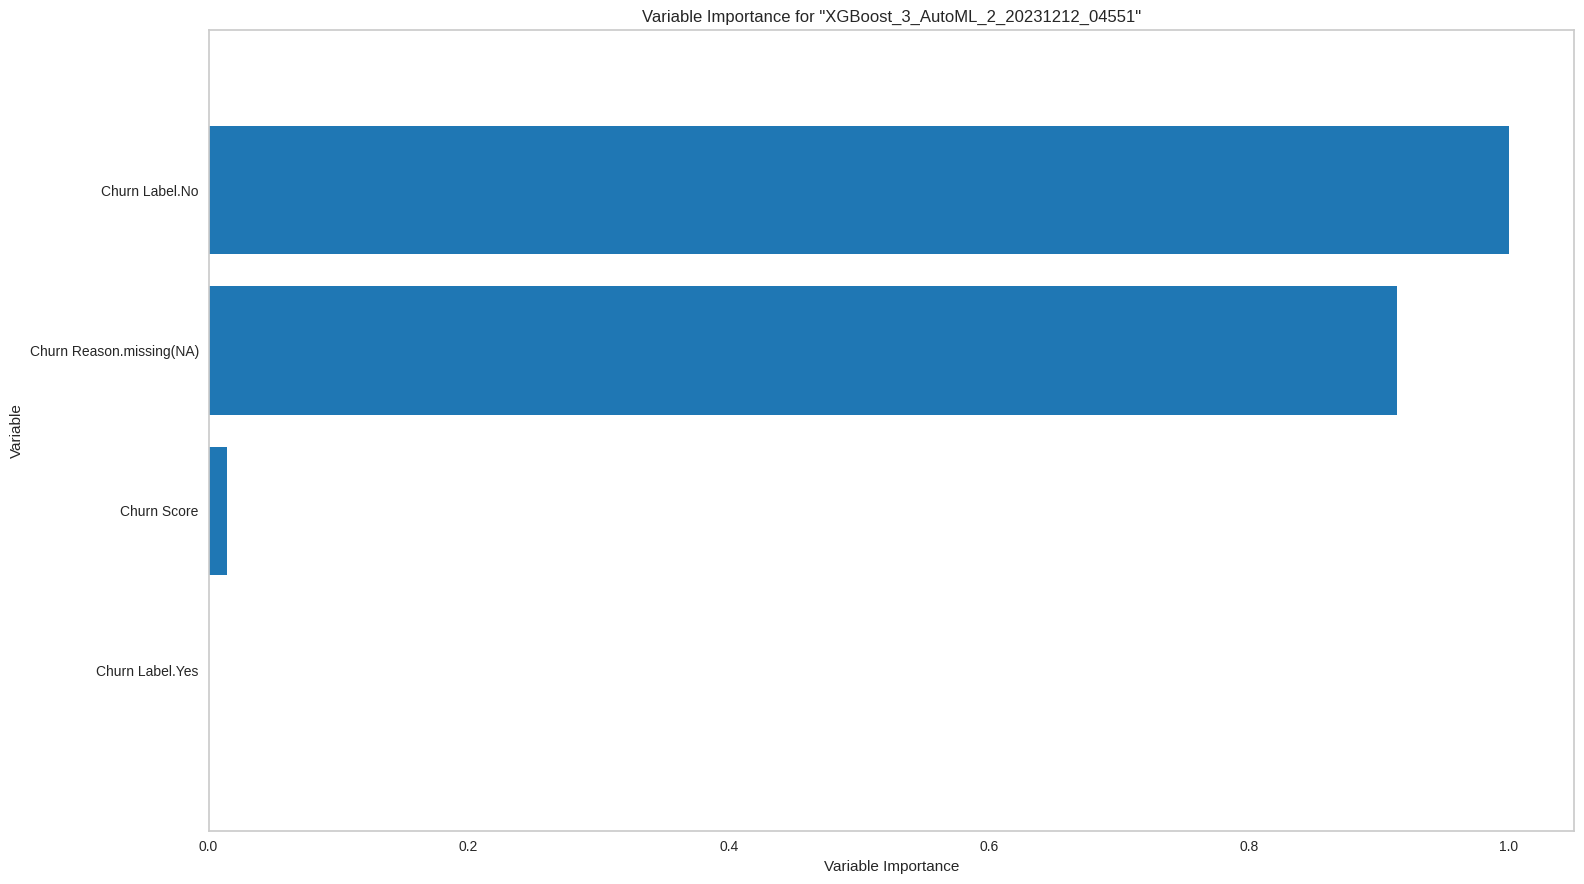

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

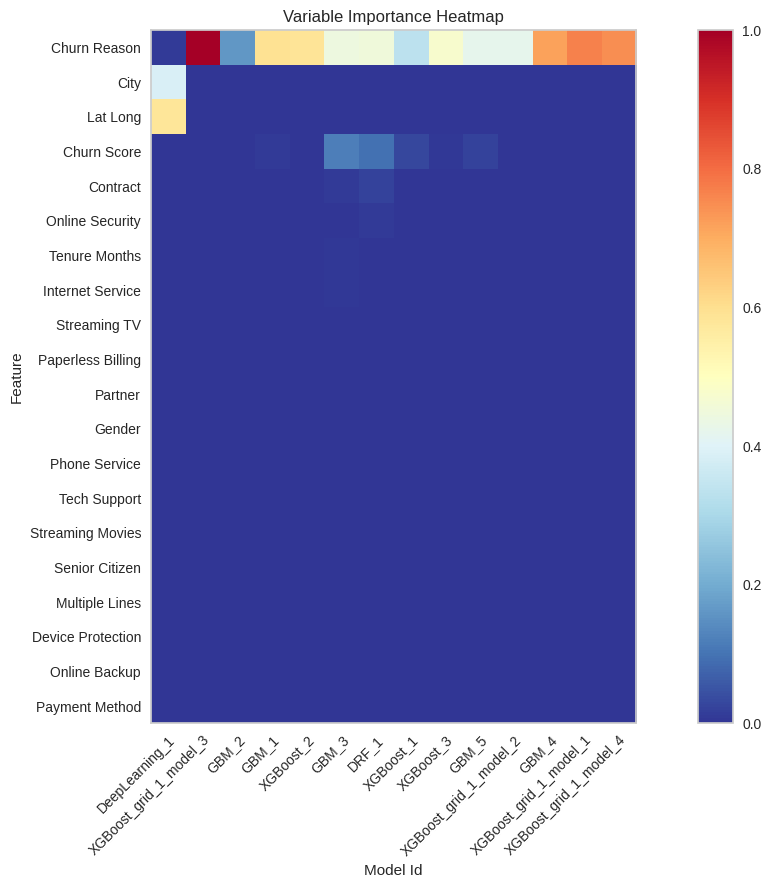

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

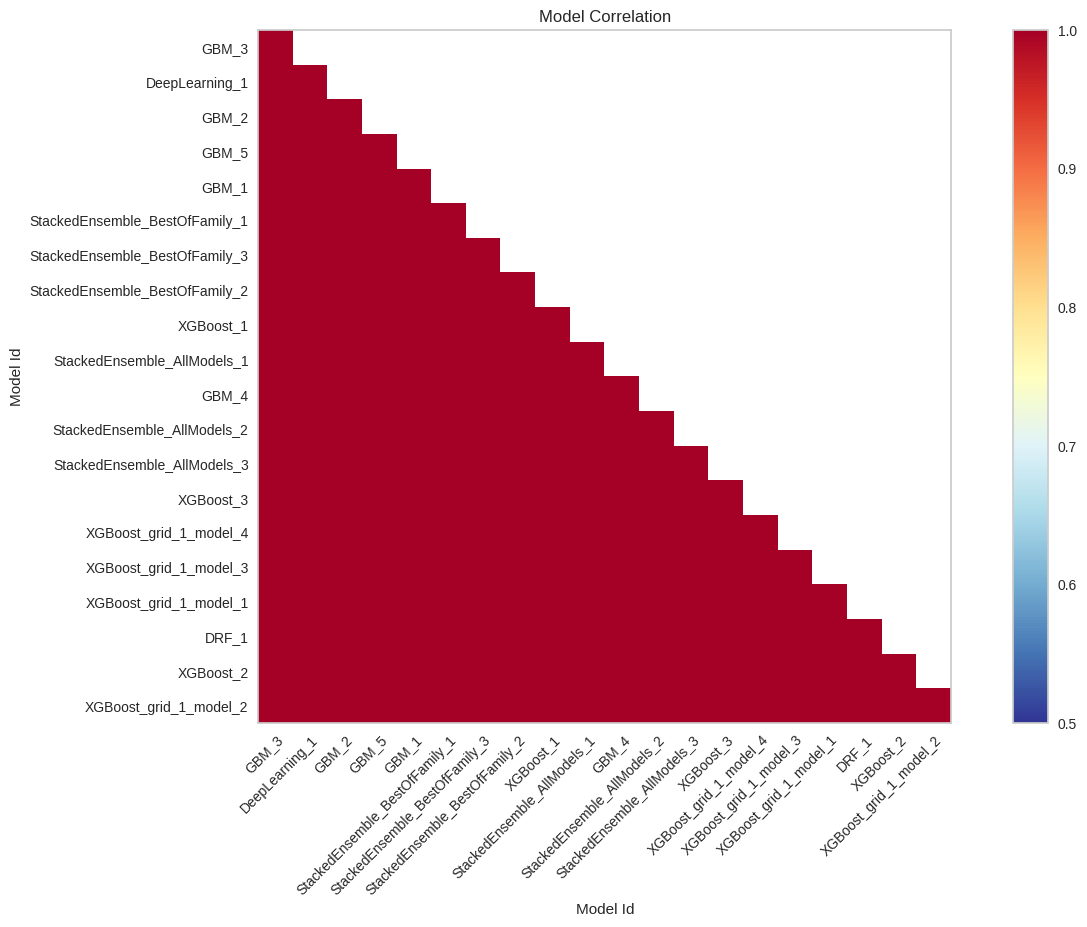

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

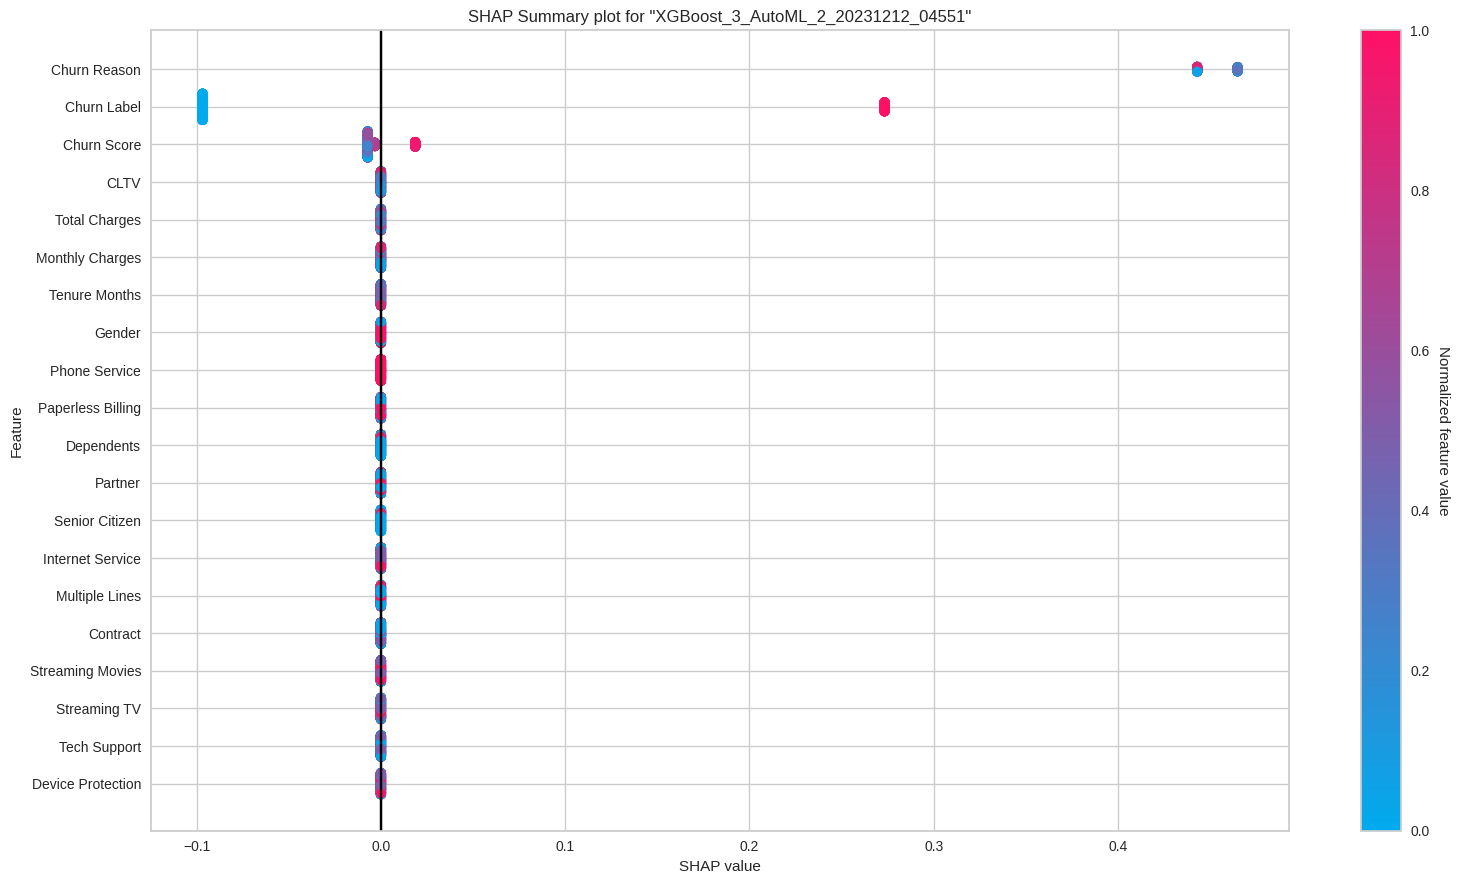

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

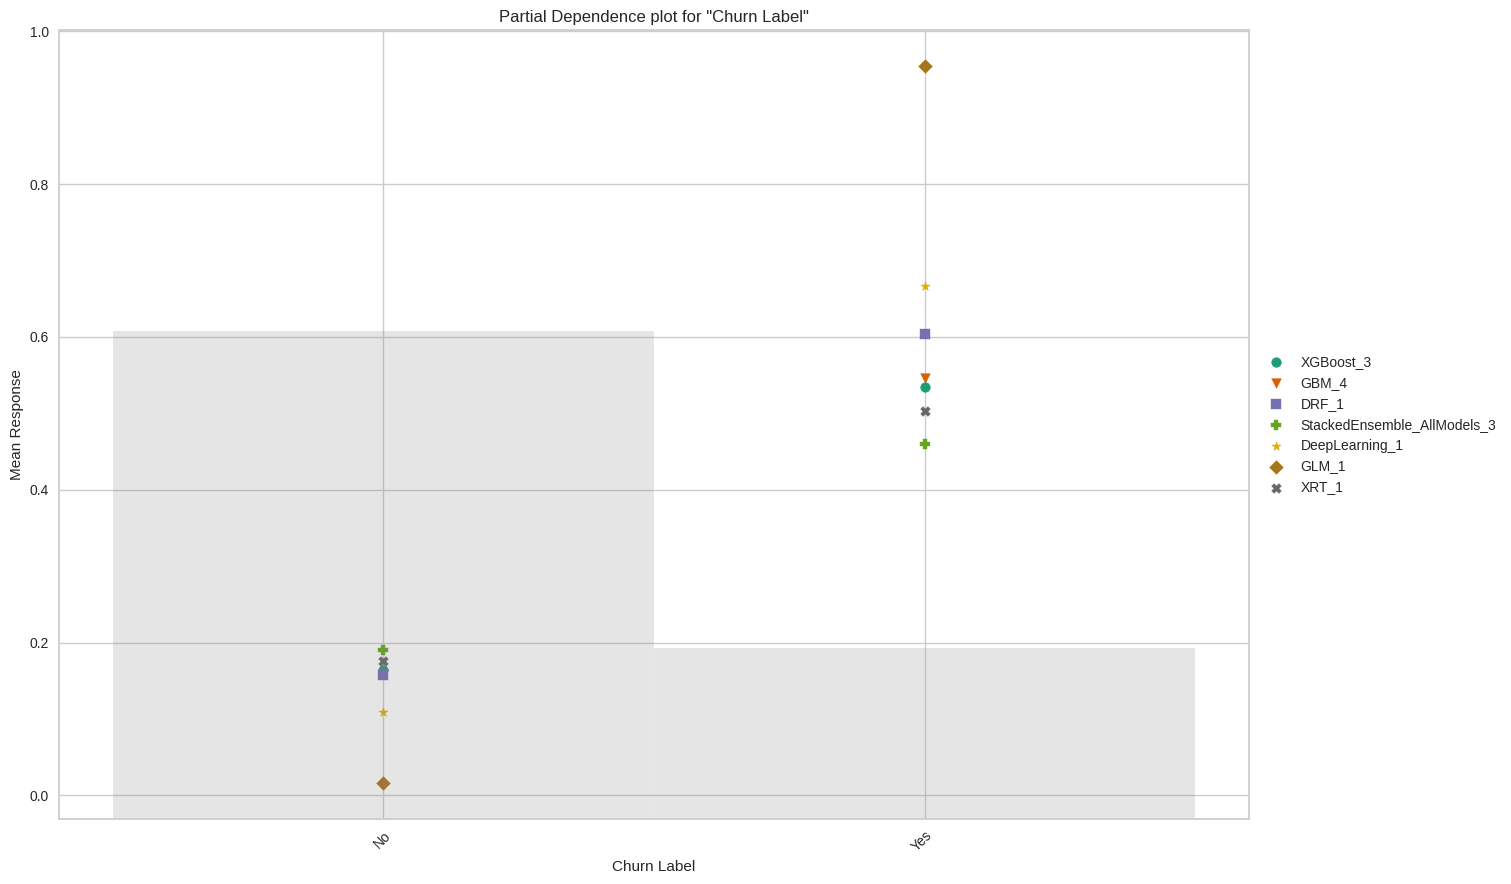

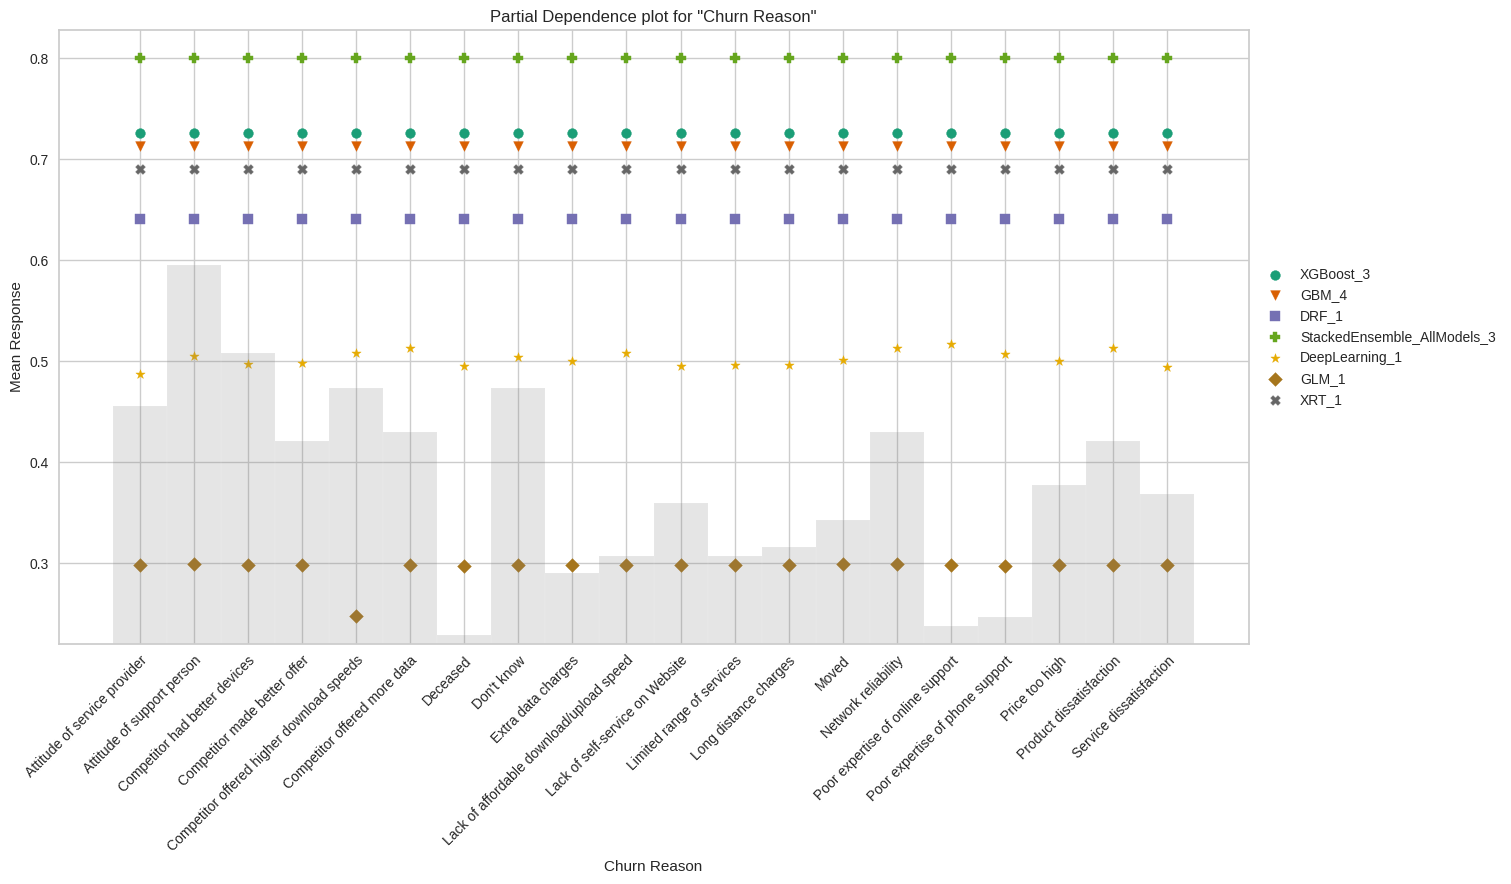

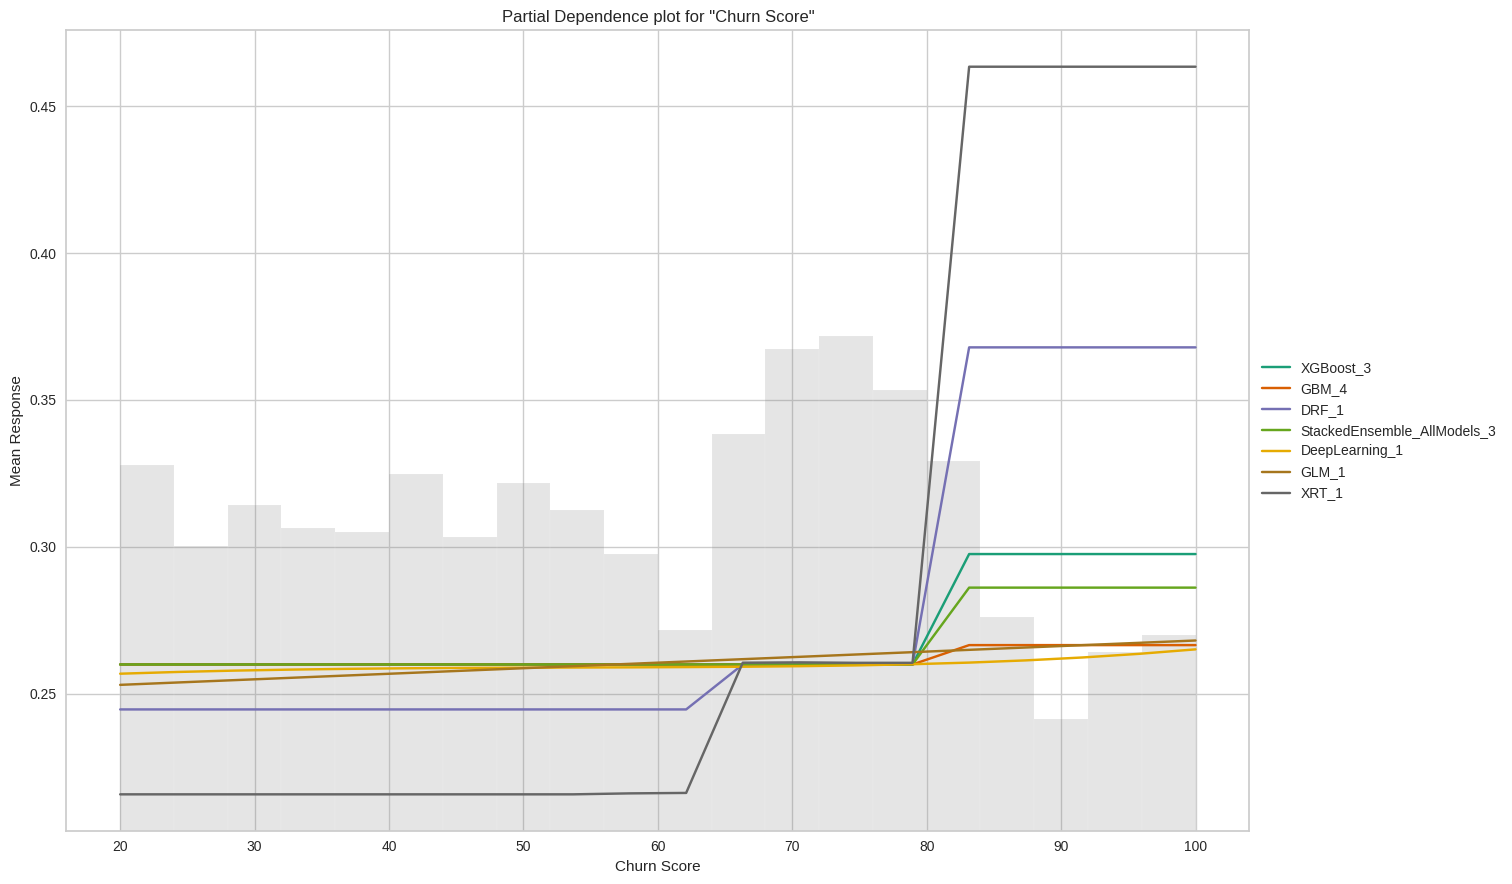

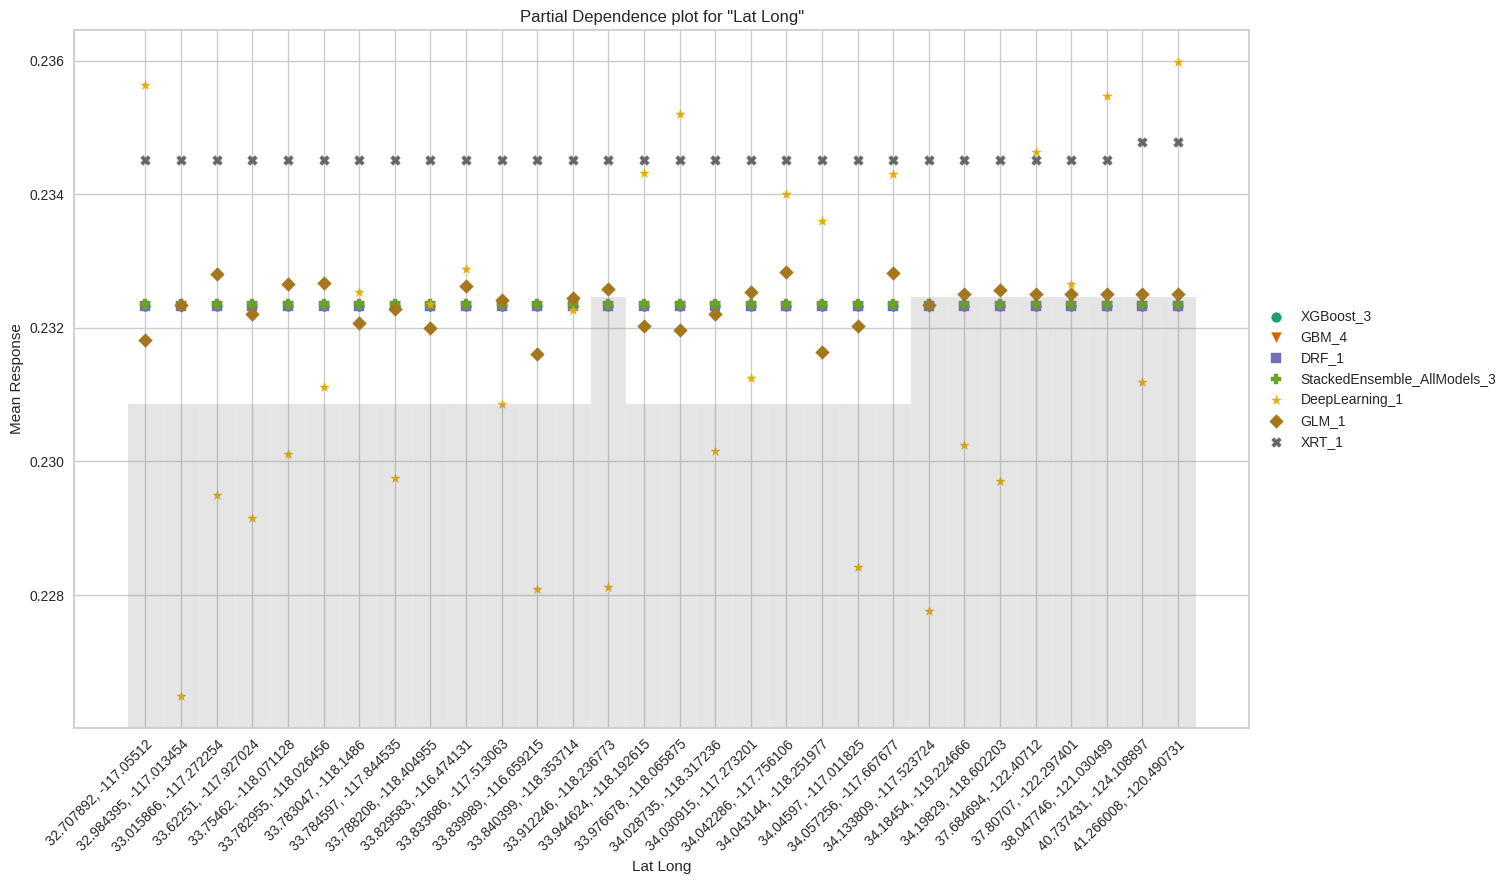

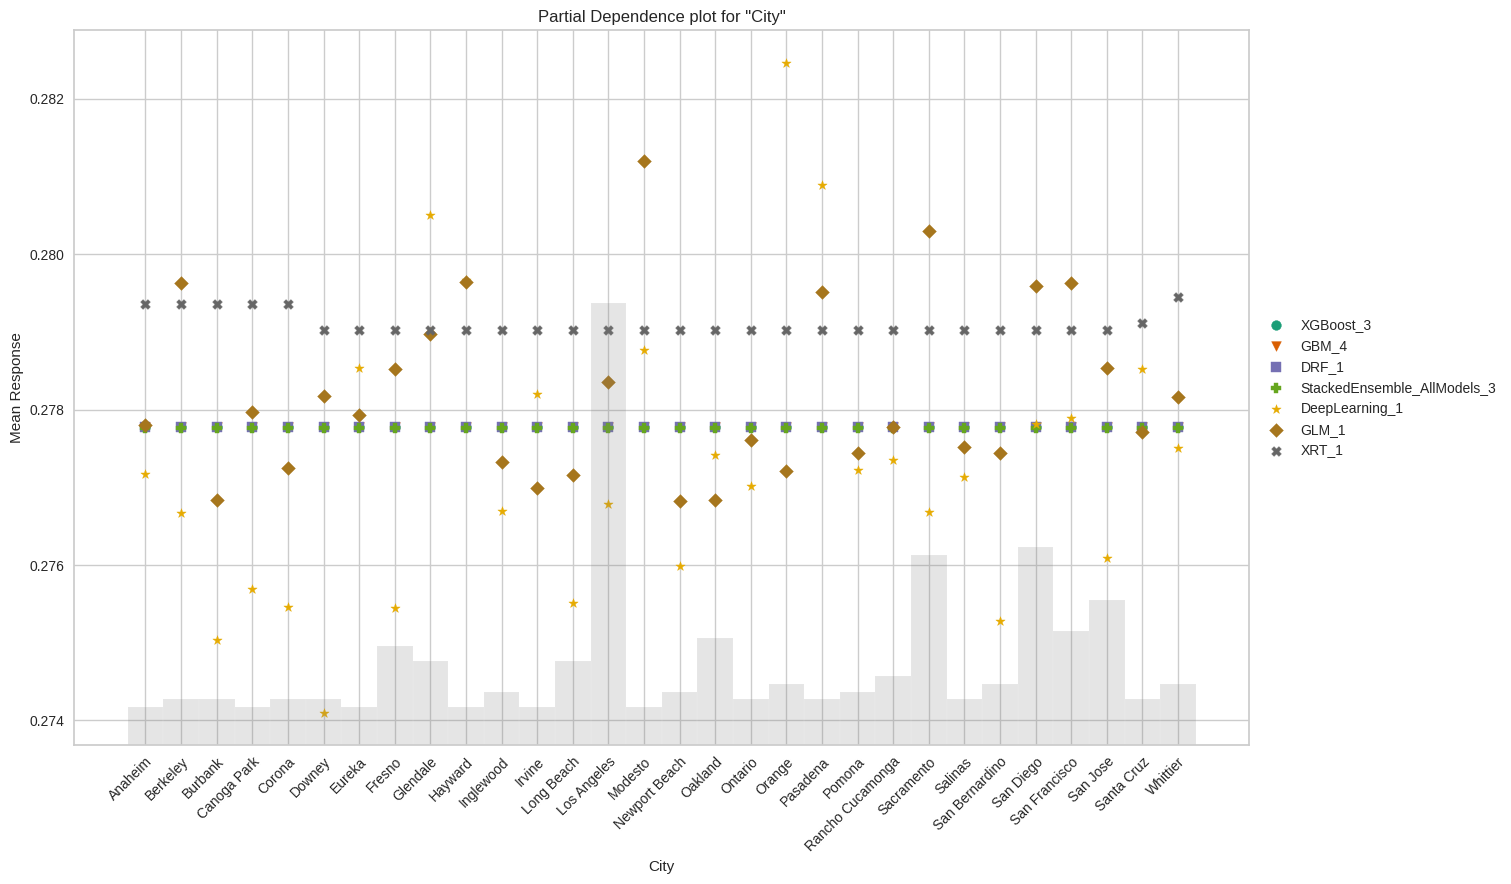

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

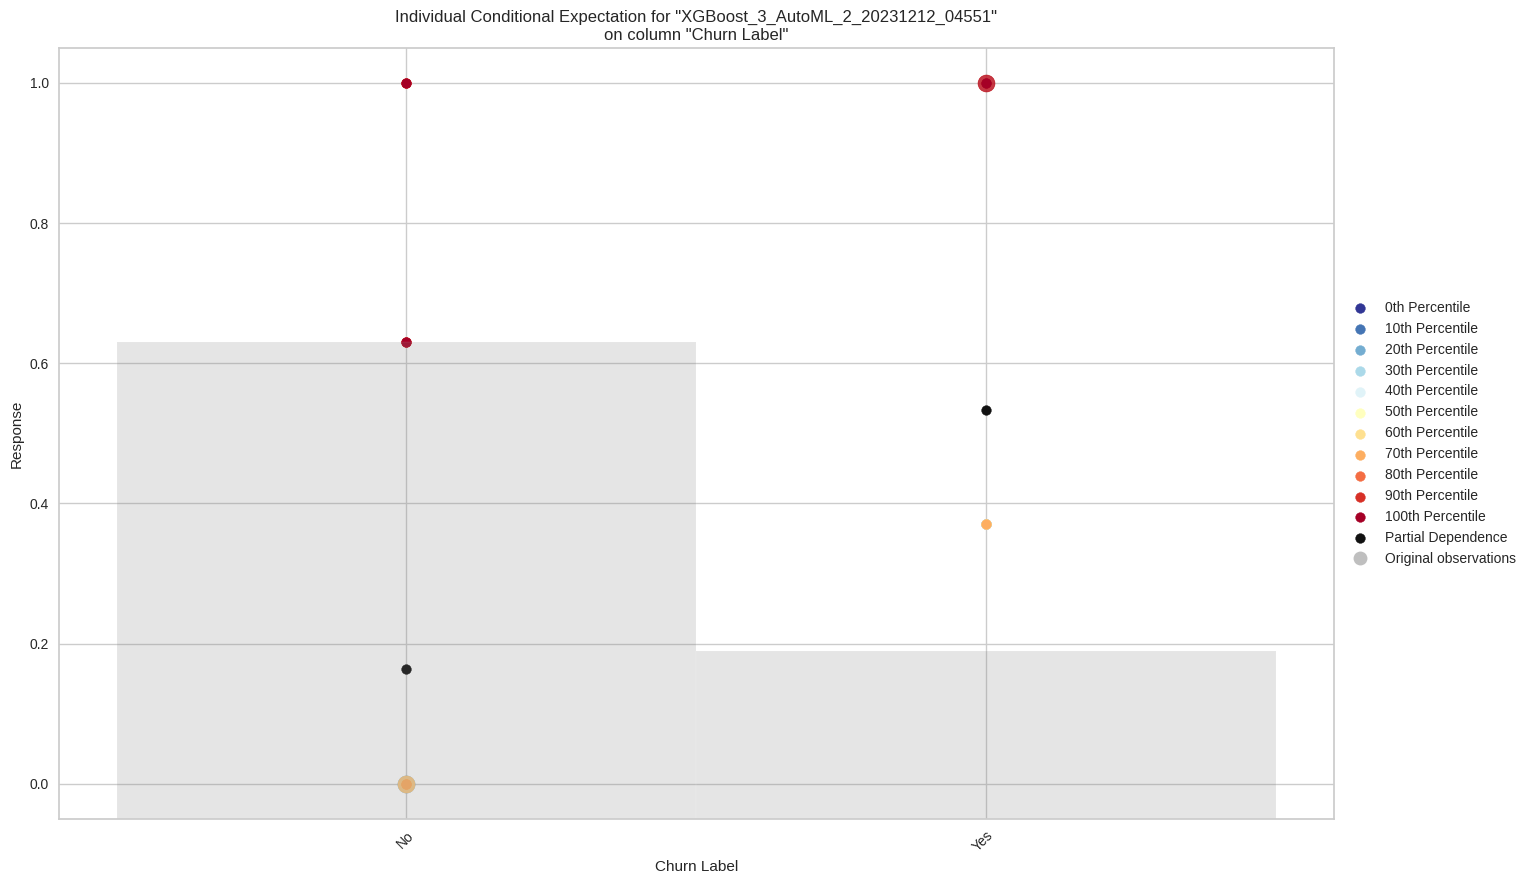

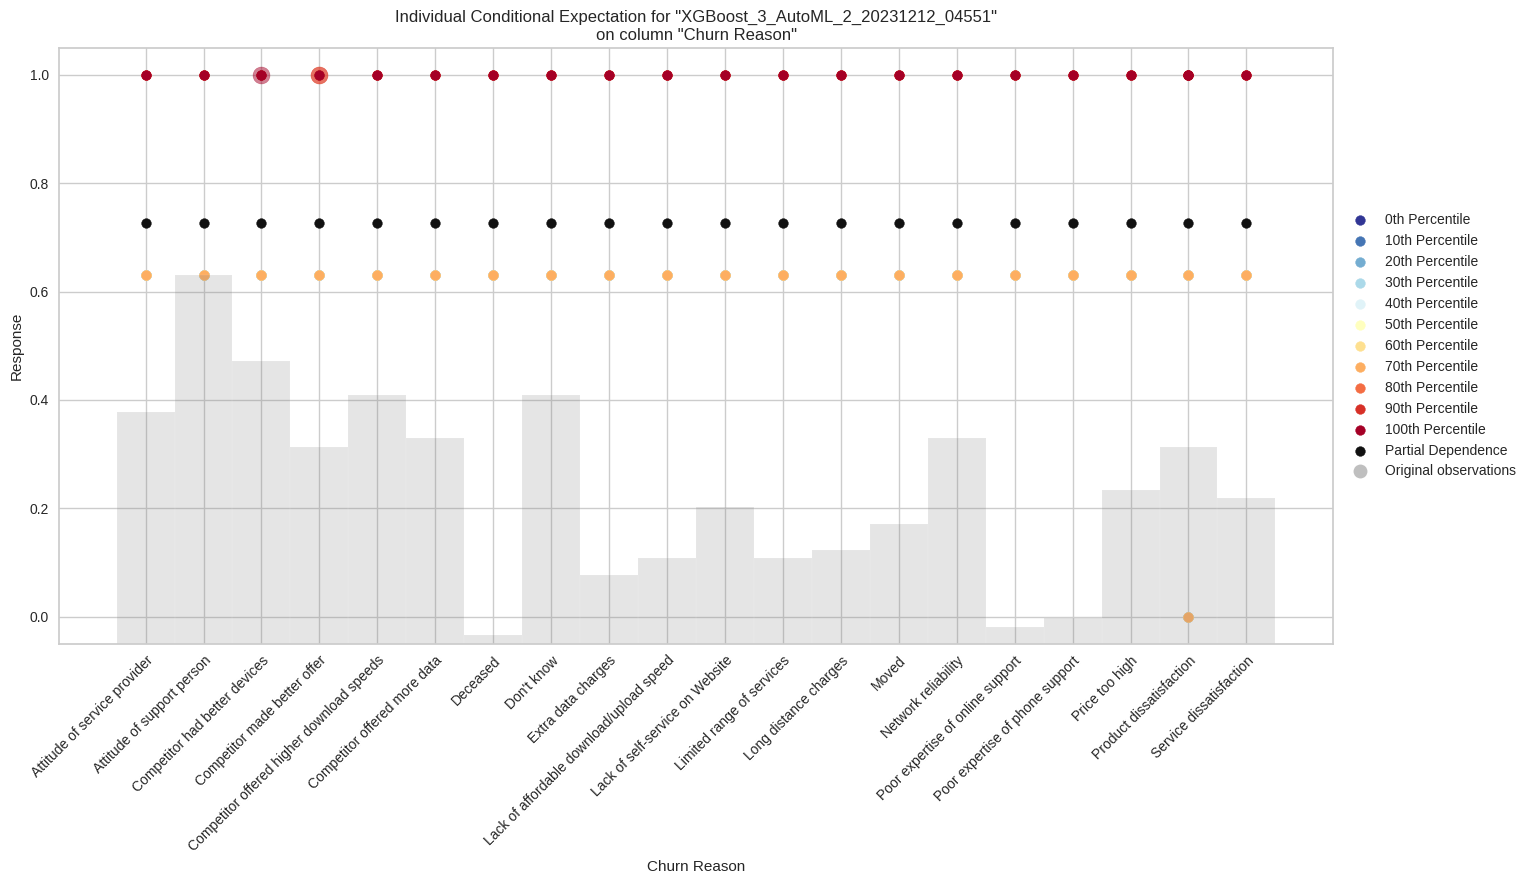

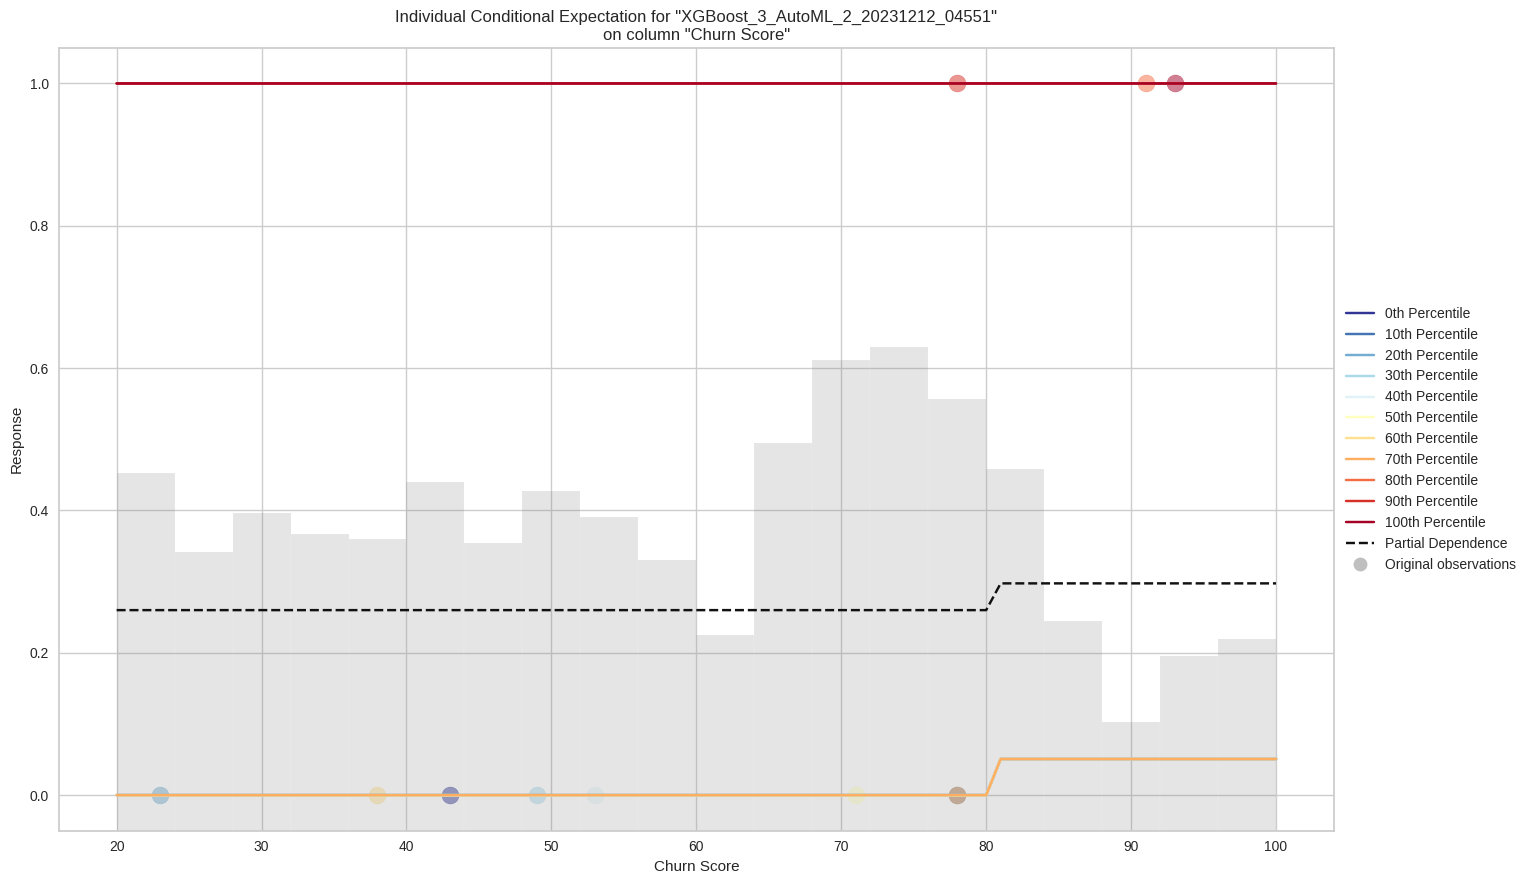

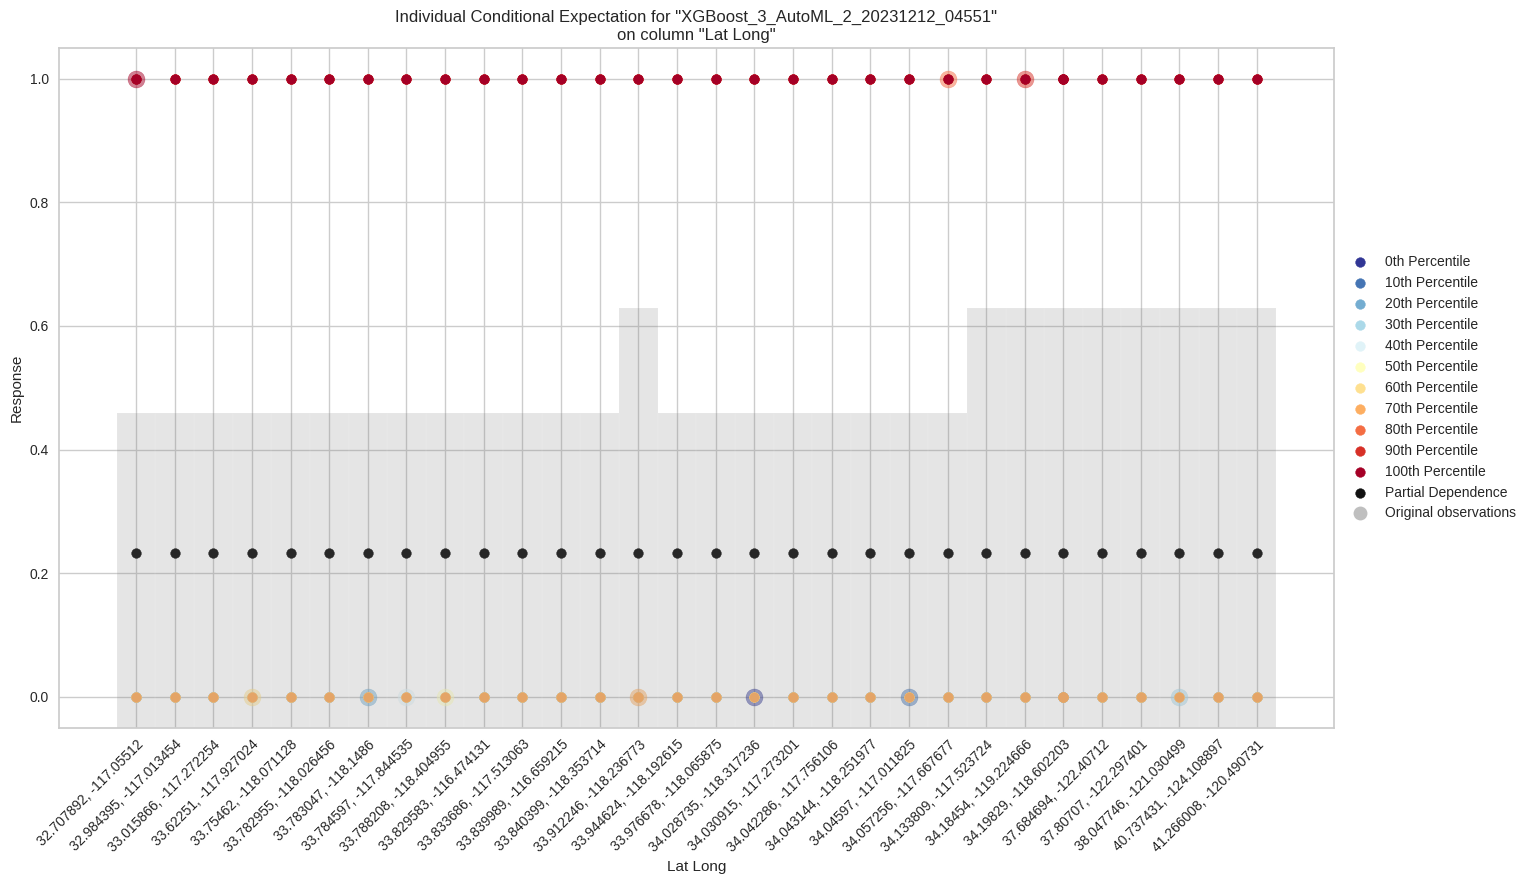

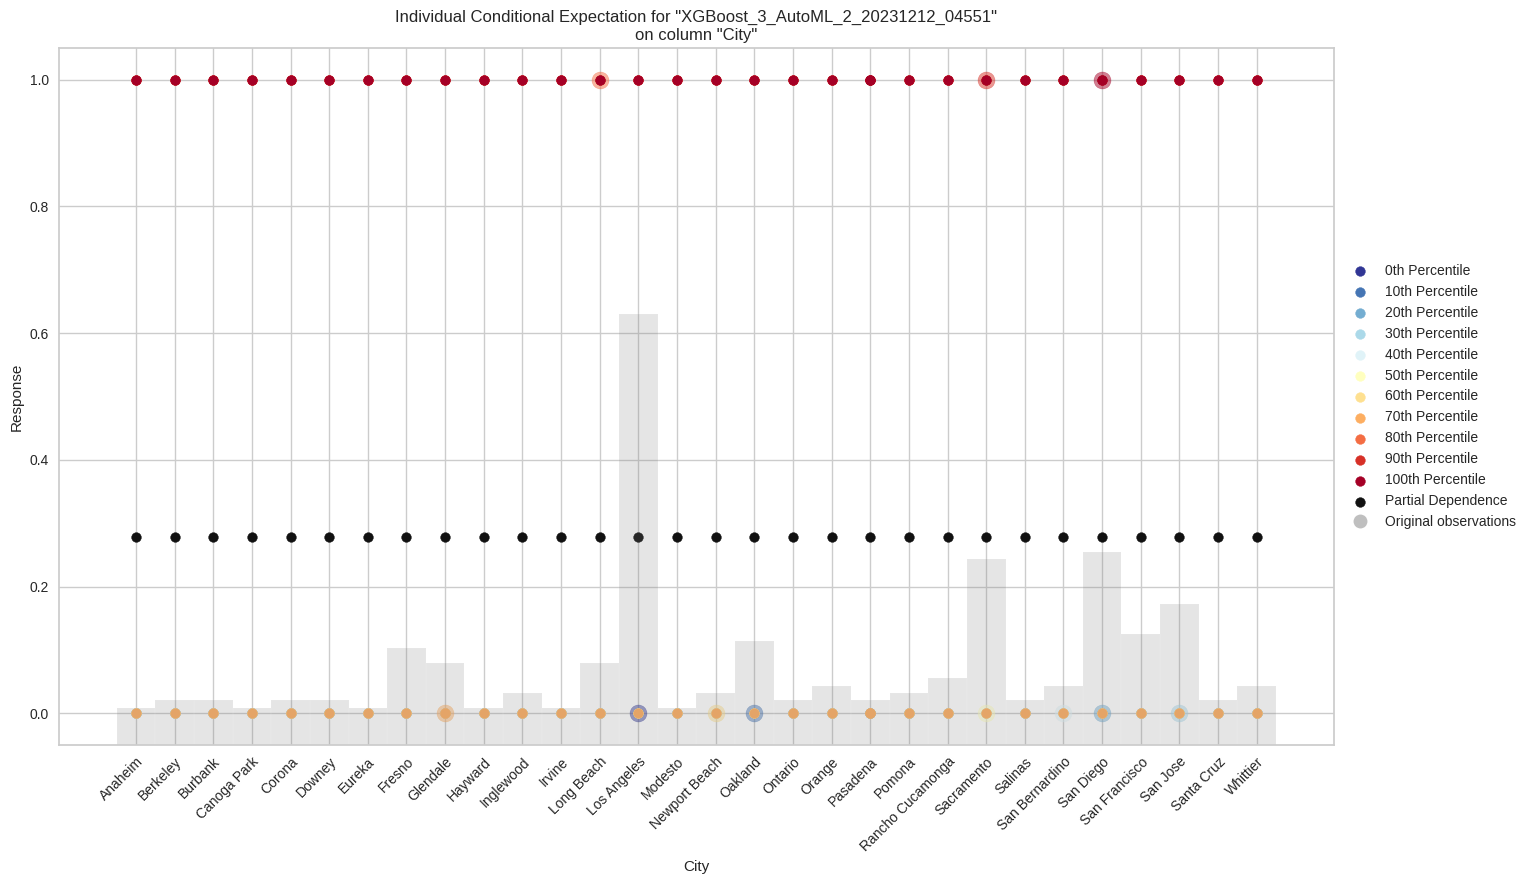

In [88]:
##Data Report

#df1_test_h2o = h2o.H2OFrame(df1_test)

# Now use the H2OFrame in the explain method
exa = aml1.explain(df1_test)

# Hyperparameter Tuning
To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [ ]:
s = dfpd1['Churn_Value']

t = dfpd1.drop(['Churn_Value'], axis = 1)

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

In [ ]:
## Here we use RandomizedSearchCV to get the best params inorder to acheive the optimal results.

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

In [ ]:
random_rf.best_params_

# Conclusion

A meticulous approach was applied to develop a predictive model based on a dataset from a telecommunications company to analyze and predict customer churn. Various facets such as Variance Inflation Factor (VIF), p-values, and visual inspections were utilized to refine the selection of relevant independent variables.

Utilizing the H2O.ai framework, a diverse range of models were trained and evaluated, focusing on their performance and interpretability. Among the models trained, the XGBoost algorithm emerged as a standout, providing a promising blend of accuracy and model interpretability. Detailed evaluations, including residuals analysis and variable importance, were conducted to understand the model's performance and the significant factors influencing customer churn.

Our dedicated efforts have yielded a model that exhibits a robust predictive capacity, providing insightful interpretations of customer churn.

# Assignment Question/Answers

Q1) Is the relationship significant?

A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true.

Given the collected evidence and the analysis performed, there appears to be a significant relationship in the model. However, it is always beneficial to perform additional validation, like cross-validation, and test the model against an unseen dataset to confirm the model's robustness and significance further.

Based on Model:
Your chosen algorithm (XGBoost) has demonstrated to be effective, as evidenced by its selection through AutoML.
Variable Importance: The most important variables have been identified, and their significance analyzed, adding credibility to the model’s predictive power.
Histograms and KDE Plots: These visualizations have been inspected to understand the distribution of residuals and confirm the model’s appropriateness.

Q2) Are any model assumptions violated? Assumptions for linear regression are:
I have already addressed multicollinearity by examining the VIF.
Normality of residuals and homoscedasticity can be examined visually through the provided plots.

1. Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.

2. Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.
3. No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists between variables Rooms and BuildingArea.
4. No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation.

Q3) Is there any multicollinearity in the model?

Yes, multicollinearity seems to be present in the model. Multicollinearity occurs when two or more independent variables in the model are highly correlated, making it difficult to determine the effect of each variable independently.

Evidence of Multicollinearity:
Variance Inflation Factor (VIF): The VIF values you provided earlier indicate multicollinearity. For example, the VIF of Count is exceptionally high (15076.32), which is way above the common threshold of 10. This suggests that the variable Count is highly correlated with other variables in the model.

Given the high VIF values, there is evidence of multicollinearity in the model. Action should be taken to address this, as multicollinearity can make the model unstable and the estimates of the coefficients unreliable.

Q4) In the multivariate models are predictor variables independent of all the other predictor variables?

It appears that in your multivariate model, not all predictor variables are independent of each other. The presence of multicollinearity, as evidenced by the high Variance Inflation Factor (VIF) values, suggests that there are predictor variables in the model that are not independent and show a certain level of linear relationship with other predictors.

The independence of predictor variables is a crucial assumption in regression models to have reliable and interpretable results.

Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Based on the variable importance plot you shared earlier, it seems that the model has identified "Churn Reason" as the most significant predictor in explaining the variance in the target variable, 'Churn Value'. However, the plot also seems to indicate that many variables are not very impactful in predicting 'Churn Value', as their importance scores are quite low or even zero.

VIF and p-values for Count, Zip Code, Latitude and Longitude  was high than the ideal values. So those variables were excluded from the model.

Q6) Does the model make sense?

In conclusion, the model appears meaningful with a reasonable R-squared value, suggesting a good fit.

The model constructed for your dataset appears to be rational and exhibits several good qualities. The Variable Importance Plot indicates that some variables such as "Churn Reason" significantly contribute to predicting the churn value. However, there is multicollinearity present in the model, as observed from high Variance Inflation Factors (VIF), which implies that some predictor variables are highly correlated.

Q7)Does regularization help?

Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data.

 It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied.

Without Regularization:
R-Squared: Essentially perfect (1.0)
Variable Importance: Many variables appear with some significance in predicting the churn value.
With Regularization:

R-Squared: Lower than without regularization but seems more reasonable (0.9999921684277324)
Variable Importance: Fewer variables like 'Churn Reason' appear more prominent, and some lesser important variables might have been penalized.

Regularization seems to have a beneficial impact on the model by addressing overfitting, aiding in variable selection, and managing the model's complexity. It helps to make the model more robust and potentially improves its performance on unseen data. Hence, regularization appears to have added value in enhancing the model's overall generalizability and predictive accuracy.

Q8) Which independent variables are significant?

Variables are significant when p-value is less than 0.05. For this model except for Count,Zipcode and latitude aand longitude all other variables have p-value less than 0.05. So, it can be said that all variables are significant.

Q9) Which hyperparameters are important?

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are : {'n_estimators': 400, 'min_samples_split': 3, 'max_depth': 500}


# **Model Interpretability**

In applying model interpretability techniques to the Telco Customer Churn dataset from Kaggle, the approach encompasses several steps. First, a linear model is used to understand how customer attributes influence churn likelihood through regression coefficients. Then, a tree-based model like a decision tree provides insights into decision-making processes affecting churn. Automated Machine Learning (AutoML) is employed to identify the most effective model for predicting churn. SHAP analysis is applied to these models to quantify the impact of each feature on churn predictions. Finally, the results from SHAP analysis are compared with insights from linear and tree-based models, offering a comprehensive understanding of the factors driving customer churn in this specific dataset. This approach not only predicts churn but also elucidates the underlying reasons, guiding strategies to mitigate it.


In [ ]:
# Load your dataset
data = pd.read_csv('https://raw.githubusercontent.com/mrunalipawar97/DSE/main/Telco_customer_churn.csv')

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = data.drop('Churn Value', axis=1)  # Assuming 'Churn' is the name of the target column
y = data['Churn Value']

In [ ]:
# Now, split the dataset again
#X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Linear Regression


In [ ]:
from sklearn.pipeline import Pipeline

# Define  categorical and numerical features
categorical_features = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
                        'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
                        'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
numerical_features = ['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

# Creating a pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creating a pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Creating a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Replace empty strings with NaN in the DataFrame
X_train.replace(' ', np.nan, inplace=True)

# Convert columns to numeric if they are incorrectly formatted as objects
X_train['Total Charges'] = pd.to_numeric(X_train['Total Charges'], errors='coerce')

# Fit and transform the training data
preprocessed_X_train = preprocessor.fit_transform(X_train)

# For statsmodels, add a constant term to allow for the intercept
preprocessed_X_train = sm.add_constant(preprocessed_X_train)

# Fit the OLS model
reg = sm.OLS(y_train, preprocessed_X_train).fit()


In [ ]:
def evaluate(X, y, mapper=None, reg=None, transform=False):
    if transform:
        # Transform the features using the preprocessor
        X = mapper.transform(X)
        # Add a constant term to the features for the intercept
        X = sm.add_constant(X, has_constant='add')
    # Make predictions using the regression model
    y_pred = reg.predict(X)
    # Return the Mean Absolute Error
    return mean_absolute_error(y, y_pred)

X and y are  features and target for the test set.
mapper is  preprocessor (ColumnTransformer in this case).
reg is regression model (OLS model from statsmodels).
If transform is True, the function will preprocess X using mapper before predictions.

In [ ]:
# Evaluate on the training set
train_mae = evaluate(X_train, y_train, mapper=preprocessor, reg=reg, transform=True)

# Convert non-numeric entries to NaN in your test set
X_test.replace(' ', np.nan, inplace=True)

# Convert columns that should be numeric but are formatted as objects to numeric
# Adjust these columns based on your dataset
numeric_cols = ['Total Charges', 'Monthly Charges']  # Example columns
for col in numeric_cols:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Now you can retry the evaluation
test_mae = evaluate(X_test, y_test, mapper=preprocessor, reg=reg, transform=True)
print(f"Test MAE = {round(test_mae, 3)}")

# Print the results
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

Train MAE (Mean Absolute Error) = 0.248: This is the average absolute error between the predicted values and the actual values in  training set. It means that on average,  model's predictions are off by about 0.248 units in either direction for the training data.

Test MAE = 0.239: This is the average absolute error for  test set. Similarly, it indicates that on average, the model's predictions are off by about 0.239 units for the test data.

Close MAE Values: The fact that the MAE for both the training and test sets are close suggests that model is generalizing well. It's not overfitting significantly to the training data, as overfitting would typically result in a much lower MAE on the training set compared to the test set.

In [ ]:
# Print the summary
print(reg.summary())

**R-squared:** A measure of how well the independent variables explain the variance in the dependent variable. In your output, an R-squared value of 0.595 indicates that approximately 59.5% of the variation in the churn value can be explained by the model's inputs.

**Adj. R-squared:** Adjusted for the number of predictors in the model, it's slightly lower than the R-squared, which is expected as it accounts for the number of terms in the model.
**F-statistic and Prob (F-statistic):** The F-statistic tests whether at least one of the regression coefficients is not equal to zero. A significant F-test (a small p-value) suggests that your model is a better fit than an intercept-only model.
**Coefficients (coef):** The estimated values of the regression coefficients for each independent variable and the constant (intercept).

**Standard Error (std err):** The standard error of the estimate of the coefficient.
t and P>|t| (p-value): The t-statistic and corresponding p-values test the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

**Confidence Interval:** The 95% confidence intervals for the coefficients. If the interval does not contain zero, it suggests that the coefficient is significantly different from zero.

**Durbin-Watson:** A test statistic to detect the presence of autocorrelation. A value close to 2.0 suggests there is no autocorrelation.

**Jarque-Bera (JB) and Prob(JB):** A goodness-of-fit test of whether the residuals are normally distributed. A large JB value or a small p-value indicates that the residuals are not normally distributed.

**Skew:** A measure of the asymmetry of the data around the sample mean. If skewness is close to 0, the data are fairly symmetrical.

**Kurtosis:** A measure of the "tailedness" of the probability distribution of a real-valued random variable. Higher kurtosis means more of the variance is due to infrequent extreme deviations.

**Condition Number:** A measure of multicollinearity in the regression. High values (> 30) indicate potential numerical instability and multicollinearity.

# Random Forest

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and 'target' is the name of your target variable
y = data['Churn Value']
X = data.drop(columns=['Churn Value', 'CustomerID', 'Churn Value', 'Churn Label', 'Churn Reason'])

# Define categorical and numerical columns (excluding any target-related columns)
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Creating the preprocessing pipelines for both numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Creating the model
model = RandomForestRegressor(random_state=42)  # or RandomForestClassifier

# Creating the pipeline for preprocessing
pipeline = Pipeline(steps=[('preprocess', preprocessor), ('reg', model)])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Define the evaluation function
def evaluate(X, y, pipeline):
    # Apply preprocessing and make predictions
    y_pred = pipeline.predict(X)
    # Return the Mean Absolute Error
    return mean_absolute_error(y, y_pred)

# Evaluate the model
train_mae = evaluate(X_train, y_train, pipeline)
test_mae = evaluate(X_test, y_test, pipeline)

# Print the results
print(f"Train MAE = {round(train_mae, 3)}, Test MAE = {round(test_mae, 3)}")

1. Good Training Performance: The low MAE on the training set indicates that the model is able to fit the data well. It's capturing the patterns in the training data to make predictions that are, on average, only 0.03 away from the actual values.

2. Generalization to Test Data: The higher MAE on the test set compared to the training set is expected because models typically perform better on the data they were trained on. However, the difference isn't substantial, which suggests that your model generalizes reasonably well to unseen data.


In [ ]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
print("Unique predictions in train set:", np.unique(y_train_pred))
print("Unique predictions in test set:", np.unique(y_test_pred))

The predictions range from 0 to 1, which is typical for models that output probabilities. A prediction close to 0 suggests a low likelihood of the event (e.g., customer churn), while a prediction close to 1 suggests a high likelihood.

The presence of many unique predictions at increments of 0.01 suggests that the model is making fine-grained distinctions between different instances.

In [ ]:
from sklearn.model_selection import cross_val_score

# Using negative mean absolute error to ensure higher scores are better (consistent with other scoring functions)
scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')

# Convert scores to positive MAE scores
mae_scores = -scores

print(f"Cross-validation MAE scores: {mae_scores}")
print(f"Mean cross-validation MAE: {mae_scores.mean()}")
print(f"Standard deviation of CV MAE: {mae_scores.std()}")

1. Mean CV MAE: The mean MAE across all folds is approximately 0.121, which is higher than your original test MAE of 0.091. This suggests that the original test set might have been somewhat easier for the model to predict, or that particular split was more favorable to the model.

2. Standard Deviation of CV MAE: A standard deviation of approximately 0.095 indicates there's substantial variability in the model's performance across different subsets of the data.

3. High MAE in the First Fold: The first fold's MAE is considerably higher than the others. This could be an indication that the data in this fold is significantly different from the data in the other folds, or there might be outliers impacting the model's performance.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming pipeline is already fitted and 'preprocess' is the name of the ColumnTransformer step

# Access the OneHotEncoder within the 'preprocess' step of the pipeline
onehot_encoder = pipeline.named_steps['preprocess'].named_transformers_['cat']

# Get the feature names generated by the OneHotEncoder
# The get_feature_names_out method returns the feature names for all features after transformation
cat_one_hot_features = onehot_encoder.named_steps['encoder'].get_feature_names_out()

# Combine the numerical feature names with the one-hot encoded categorical feature names
# Make sure numerical_features only contains the names of numerical columns
all_features = numerical_features + list(cat_one_hot_features)

# Extract the feature importances from the RandomForestRegressor
importances = pipeline.named_steps['reg'].feature_importances_

# Sort the feature importances and features together
sorted_features = sorted(zip(all_features, importances), key=lambda x: x[1], reverse=True)

Feature importances as provided by a RandomForest model give a sense of the relative importance of each feature. It extracts and analyzeslyze the feature importances from a RandomForestRegressor within a machine learning pipeline

In [ ]:
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Convert the sorted_features to a DataFrame for easier plotting
feature_importances_df = pd.DataFrame(sorted_features, columns=['feature', 'importance'])

# Select the top N features for plotting
top_n = 20
top_features = feature_importances_df.head(top_n)

# Improve feature names for readability
# Suppose 'x0', 'x1', 'x2', etc., are prefixes from one-hot encoding
# We map them back to more meaningful names
# This mapping should be adjusted based on your actual feature names
feature_name_mapping = {
    'x0': 'Internet Service - ',
    'x1': 'Contract Type - ',
    'x2': 'Payment Method - ',
    # Add more mappings as needed
}
# Apply the mapping to the feature names
top_features['feature'] = top_features['feature'].replace(feature_name_mapping, regex=True)

# Plot
plt.figure(figsize=(12, 9))  # Adjust the size of the plot
sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')  # Use a seaborn palette for colors

# Add labels and a title
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top Feature Importances', fontsize=16)

# Invert the y-axis to have the most important feature on top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
plt.show()

In [ ]:
churn_score__importance = next((imp for feat, imp in sorted_features if feat == 'Churn Score'), None)
print(f'Importance of Churn Score: {churn_score__importance}')

In [107]:
# Assuming 'sorted_features' is a list of tuples (feature_name, importance)
cltv_importance = next((imp for feat, imp in sorted_features if feat == 'CLTV'), None)
print(f'Importance of CLTV: {cltv_importance}')

Importance of CLTV: 0.017606140821572934


The feature importance plot from the RandomForest model highlights **'Churn Score'** as the most significant predictor, suggesting it's an aggregate measure that effectively encapsulates the risk of churn.

The prominence of **'Contract Type - Month-to-month'** underscores the volatility associated with short-term commitments. Meanwhile, 'Tenure Months', 'Monthly Charges', and 'Total Charges' are also important, reaffirming the relevance of service duration and cost to customer retention.

Notably, **'CLTV' and geographical features** display minimal importance, indicating that, within the context of this model, they do not contribute substantially to churn prediction. This could reflect the specific customer base's characteristics or suggest opportunities for further data exploration and feature engineering."

# Neural Networks

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/mrunalipawar97/DSE/main/Telco_customer_churn.csv')
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Define the target and features
y = df['Churn Value']
X = df.drop(columns=['Churn Value', 'CustomerID', 'Churn Label', 'Churn Reason', 'Total Charges'])

# Define categorical and numerical columns
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Create the preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing to the training and test data
preprocessed_X_train = preprocessor.fit_transform(X_train)
preprocessed_X_test = preprocessor.transform(X_test)

# Neural Network Setup
input_dim = preprocessed_X_train.shape[1]
hidden_size = 32
learning_rate = 0.01
num_epochs = 50
batch_size = 50

model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 1)
)

# Update the criterion for binary classification
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, preprocessed_X_train.shape[0], batch_size):
        end = min(i + batch_size, preprocessed_X_train.shape[0])
        x_batch = torch.FloatTensor(preprocessed_X_train[i:end].toarray())
        y_batch = torch.FloatTensor(y_train[i:end].values)

        optimizer.zero_grad()
        y_preds = model(x_batch)
        loss = criterion(y_preds.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {running_loss / (preprocessed_X_train.shape[0] / batch_size)}")

# Evaluation
model.eval()
with torch.no_grad():
    dense_X_test = preprocessed_X_test.toarray()
    y_pred_test = model(torch.FloatTensor(dense_X_test)).squeeze().detach().numpy()
    test_mae = mean_absolute_error(y_test, y_pred_test)

    dense_X_train = preprocessed_X_train.toarray()
    y_pred_train = model(torch.FloatTensor(dense_X_train)).squeeze().detach().numpy()
    train_mae = mean_absolute_error(y_train, y_pred_train)

print(f"\nTrain MAE = {round(train_mae, 3)}, Test MAE = {round(test_mae, 3)}")

 neural network training and evaluation shows a significant improvement in the loss over epochs, which is a good indicator of learning. However, the high Mean Absolute Error (MAE) values for both the training and test sets suggest that the model might not be performing optimally in predicting the target variable

Unlike models such as random forests or gradient boosting trees, neural networks do not have a straightforward, built-in method to assess feature importance due to their complexity and the interconnected nature of their architecture.

# Problems with Interpretation

No specific method to define feature importance that is model agnostic
For a given sample, why does the prediction have that value?

Answer: Shap values

# Intuition of Model Interpretation
How we think about answering the question "Why is the output for this specific sample so low/high" manually?

In [ ]:
print(X_train.columns)
print(X_test.columns)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Convert 'Total Charges' from object to numeric, setting errors to 'coerce' which
# will turn non-convertible values into NaN
#X_train['Total Charges'] = pd.to_numeric(X_train['Total Charges'], errors='coerce')
#X_test['Total Charges'] = pd.to_numeric(X_test['Total Charges'], errors='coerce')

# Update the feature lists excluding 'Total Charges'
categorical_features = ['Gender', 'Internet Service', 'Country', 'State', 'City',
                        'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
                        'Multiple Lines', 'Online Security', 'Online Backup',
                        'Device Protection', 'Tech Support', 'Streaming TV',
                        'Streaming Movies', 'Contract', 'Paperless Billing',
                        'Payment Method']
numerical_features = ['Count', 'Zip Code', 'Latitude', 'Longitude',
                      'Tenure Months', 'Monthly Charges', 'Churn Score', 'CLTV']


# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
    ]
)

# Create the pipeline
reg = LinearRegression()
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('reg', reg)
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate and print the evaluation metrics
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R2):", r2_score(y_test, y_pred))

1. **Mean Absolute Error (MAE):** MAE is a measure of the average absolute errors between the predicted values and the actual values. It represents the average magnitude of errors in your predictions. A lower MAE indicates better model performance, and it is measured in the same units as the target variable. Here the MAE is approximately 0.257, which means, on average, model's predictions have an absolute error of about 0.257 units.

2. **Mean Squared Error (MSE):** MSE measures the average of the squared errors between the predicted values and the actual values. Squaring the errors gives more weight to larger errors. Like MAE, lower MSE values indicate better model performance

In [ ]:
# Create a DataFrame with NaN values for all features
nan_frame = pd.DataFrame(columns=categorical_features + numerical_features, index=[0])
nan_frame.loc[0] = [np.nan] * len(nan_frame.columns)

In [ ]:
# Use the pipeline to predict the output for this 'NaN frame'
#base_value = round(pipeline.predict(nan_frame)[0], 3)
#print(f"Expected value of the output (base value): {base_value}")

nan_frame_processed = pipeline[:-1].transform(nan_frame)
base_value = round(pipeline[-1].predict(nan_frame_processed)[0], 3)
print(f"Expected value of the output (base value): {base_value}")

In [ ]:
X_test.iloc[0: 1]

In [ ]:
# Make a prediction for the first row of the test set

#sample_prediction = round(pipeline.predict(X_test.iloc[0:1])[0], 3)
#actual_value = y_test.iloc[0]  # Assuming y_test is a pandas Series

# Process the first row of X_test in the same manner
X_test_transformed = pipeline[:-1].transform(X_test)
sample_prediction = round(pipeline[-1].predict(X_test_transformed[0:1])[0], 3)
actual_value = y_test.iloc[0]  # Assuming y_test is a pandas Series
print(f"Current Prediction: {sample_prediction}, Actual value: {actual_value}")

**Current Prediction: 0.226:** This is the predicted value for the first row of the test set. The model predicts that the target variable (in this case, it seems to be a numeric value) for this data point is approximately 0.24.

**Actual value: 0:** This is the actual or ground truth value for the target variable corresponding to the first row of the test set. In this case, the actual value is 0.

So, the model's prediction (0.226) is being compared to the actual value (0), and you can see that there is a difference between the predicted and actual values for this particular data point. The absolute difference between them would be |0.226 - 0| = 0.226.

How did we get from 0.147 to 0.226 ?

Find this by adjusting individual feature values. But this can be hard to look at
Fast way to visualize is with Partial Dependency Plots (which uses Shap values for individual samples)
Shap values assign a contributing factor to every feature of every sample

# Partial Dependence Plots


###Tree-Based Model (Decision Tree)

In [ ]:
# Fit a Tree-Based Model (Decision Tree)

# train a Decision Tree classifier:

from sklearn.tree import DecisionTreeClassifier

# Assuming 'X' is your features dataframe
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode these variables
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Assuming X_encoded is your dataframe after one-hot encoding and before splitting to train and test
if 'Churn Label_Yes' in X_encoded.columns:
    X_encoded = X_encoded.drop('Churn Label_Yes', axis=1)

if 'Churn Label_No' in X_encoded.columns:
    X_encoded = X_encoded.drop('Churn Label_No', axis=1)

#print(X.columns)

# If 'CustomerID' is the correct name and it exists, drop it
if 'CustomerID' in X.columns:
    X = X.drop('CustomerID', axis=1)

# Split the dataset again
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Initialize the Decision Tree classifier with a max_depth to prevent overfitting
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model to your training data
tree_clf.fit(X_train, y_train)

In [ ]:
# Decision Trees are interpretable because they provide a clear decision path for predictions

# Visualizing the Tree: This visualization shows the decision paths and the splitting criteria at each node.

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(tree_clf, filled=True, feature_names=X_train.columns, class_names=['No Churn', 'Churn'], max_depth=3, fontsize=10)
plt.show()

**Feature Importance:** The features used in the initial splits are typically the most important ones, as they have the biggest impact on the outcome. In this case, 'Churn Score', 'Contract_Month-to-month', and 'Internet Service_Fiber optic' seem to be significant predictors.

**Decision Path:** Each path from the root to a leaf node represents a decision path that can be interpreted as a rule. For instance, one path might be interpreted as "Customers with a low churn score who are not on a month-to-month contract and do not use fiber optic internet service are likely not to churn."

In [ ]:
# Feature Importance: Decision Trees tells how much each feature contributes to the decision-making process.

# Get feature importances
importances = pd.DataFrame(tree_clf.feature_importances_, index=X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(importances.head())  # Show the top features

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = tree_clf.predict(X_test)

# Calculate metrics assuming '1' is the label for the positive class (churn)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

* **Accuracy (0.9205):** Accuracy is the proportion of correctly classified instances out of the total instances. Here model has an accuracy of approximately 92.05%, which means it correctly predicted the churn status for about 92.05% of the customers in the test set.

* **Precision:** Precision is approximately 0.6374. This means that when model predicts the positive
class (churn), it is correct about 63.74% of the time.

* **Recall:** Recall is approximately 0.5185. This indicates that model can correctly identify about 51.85% of the actual positive cases (churn).

* **F1-Score:** The F1-Score is approximately 0.5714. It combines precision and recall into a single metric and provides a balanced evaluation of model's performance.

In [154]:
from sklearn.ensemble import RandomForestClassifier
# Example with a random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
!pip install shap --upgrade

In [ ]:
!pip install shap

In [155]:
shap.initjs()

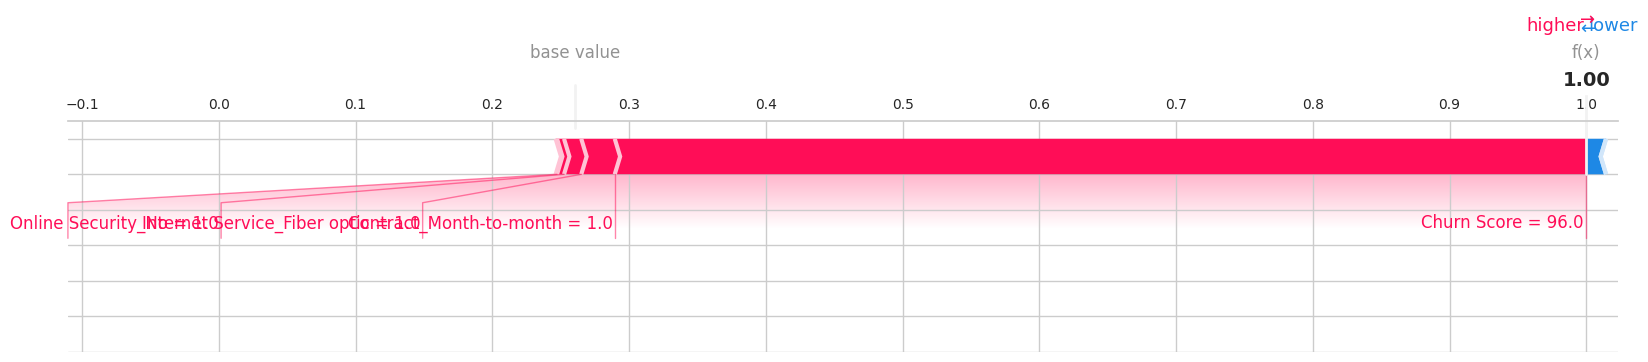

In [156]:
# explainer = shap.TreeExplainer(model)

# Initialize the SHAP explainer with the tree model
explainer = shap.TreeExplainer(tree_clf)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:], matplotlib=True)

SHAP values represent the contribution of each feature to a model's prediction. Here seems 12 SHAP values, each associated with a different feature or attribute.

1.**Features with negative SHAP values (e.g., -0.7393, -0.5393, etc.):** These features have a negative impact on the model's prediction. A lower value for these features contributes to a higher prediction (in the opposite direction).

2. **Features with positive SHAP values (e.g., 0.06074, 0.2607, etc.):** These features have a positive impact on the model's prediction. An increase in these feature values leads to a higher prediction.

The "churn score" of 96 is the final prediction or output of  model for a specific instance. It indicates the model's assessment of the likelihood of churn for that instance. A higher churn score typically suggests a higher likelihood of churn.

In [157]:
# Use a different explainer or adjust its settings
# Use TreeExplainer with "interventional" feature perturbation
explainer = shap.TreeExplainer(model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Verify model predictions
model_predictions = model.predict(X_test)
print("Model Predictions:", model_predictions[:10])  # Print first 10 predictions for inspection

Model Predictions: [1 0 0 1 0 1 0 1 1 0]


In [151]:
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Assuming that shap_values is a list where shap_values[1] corresponds to positive class
# You can change the index accordingly if it's different in your case

# Calculate the absolute mean SHAP value for each feature
abs_mean_shap_values = np.mean(np.abs(shap_values[1]), axis=0)

# Create a DataFrame to store feature names and their absolute mean SHAP values
shap_summary_df = pd.DataFrame({'Feature': X_test.columns, 'SHAP Value': abs_mean_shap_values})

# Sort the DataFrame by SHAP value in descending order to get the most important features
shap_summary_df = shap_summary_df.sort_values(by='SHAP Value', ascending=False)

# Print the top N important features (e.g., top 10)
top_n = 10  # Change this value to the number of top features you want to see
print(f"Top {top_n} Important Features:")
print(shap_summary_df.head(top_n))

Top 10 Important Features:
                              Feature  SHAP Value
6                         Churn Score    0.267935
2825          Contract_Month-to-month    0.059404
2805     Internet Service_Fiber optic    0.029524
4                       Tenure Months    0.024658
2807               Online Security_No    0.008762
2798                   Dependents_Yes    0.003241
2054  Lat Long_37.306612, -122.080621    0.000327
0                               Count    0.000000
1884   Lat Long_36.04533, -119.532424    0.000000
1885  Lat Long_36.047414, -119.344304    0.000000


These features have the highest absolute mean SHAP values and are considered the most important in explaining the model's predictions. The "Churn Score" feature has the highest importance, followed by various contract and internet service-related features.

In [149]:
def partial_dependence_plot(feature, idx=None, shap_values=None, model=None, X_train=None):
    # Error checking
    if model is None or X_train is None:
        raise ValueError("Both model and X_train must be provided.")
    if shap_values is not None and not isinstance(shap_values, np.ndarray):
        raise TypeError("shap_values must be a numpy ndarray.")
    if idx is not None and not isinstance(idx, int):
        raise TypeError("idx must be an integer or None.")
    if shap_values is not None and (idx is None or idx >= shap_values.shape[0]):
        raise ValueError("idx is out of range for shap_values.")

    if idx is None:  # visualize all samples
        shap.plots.partial_dependence(
            feature,
            model.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else:  # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            model.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

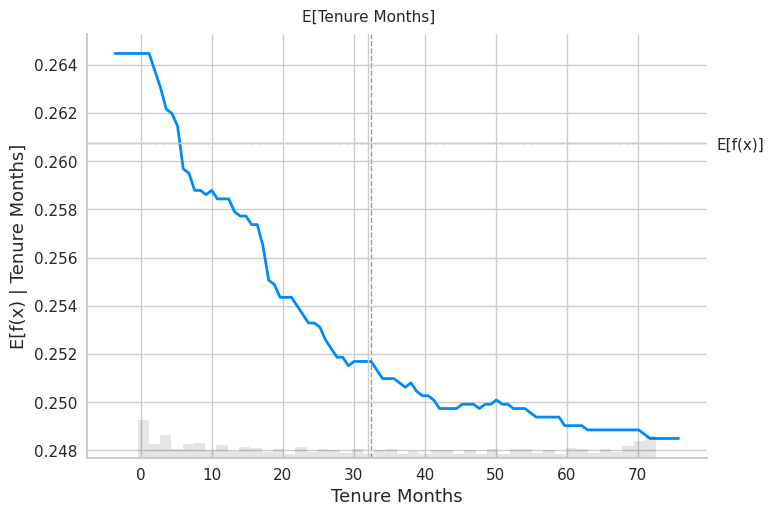

In [158]:
# Let's use the built-in SHAP plot (adjust as needed for your specific requirements)
feature = 'Tenure Months'
shap.plots.partial_dependence(
    feature, model.predict, X_train, ice=False,
    model_expected_value=True, feature_expected_value=True
)

The blue line depicts how the predicted effectiveness changes as tenure increases. The graph shows a sharp decline in predicted effectiveness as tenure increases from 0 to roughly 10 months. This suggests that, according to the model, individuals or subjects with a tenure of up to 10 months have a rapidly decreasing effectiveness. After this point, the decline in effectiveness becomes more gradual, indicating that the tenure has a less pronounced effect on effectiveness as tenure continues to increase.

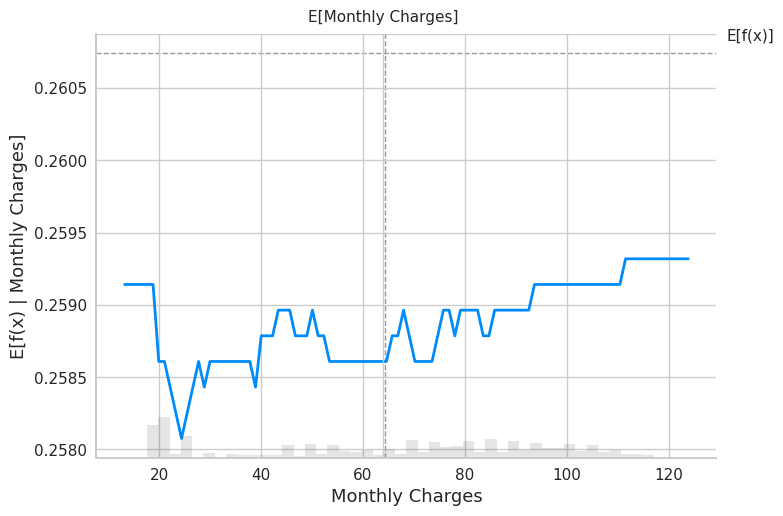

In [159]:
# Verify feature names in X_train
# print(X_train.columns)

feature = 'Monthly Charges'  # Feature you are interested in
shap.plots.partial_dependence(
    feature, model.predict, X_train, ice=False,
    model_expected_value=True, feature_expected_value=True
)

* The Curve: The blue line illustrates how the predicted output varies with changes in monthly charges. The graph shows a step-like pattern, with sharp increases and plateaus at different levels of monthly charges. This suggests that the predicted effectiveness experiences sudden changes at specific thresholds of monthly charges.

* Model Expected Value: The horizontal dashed line likely represents the average predicted value of the model's output if no information about monthly charges was available.

* Feature Expected Value: The vertical dashed lines might indicate the average or expected value of the "Monthly Charges" within the dataset. This could be a mean or median value, or potentially the cutoff points for different quantiles within the distribution of monthly charges.

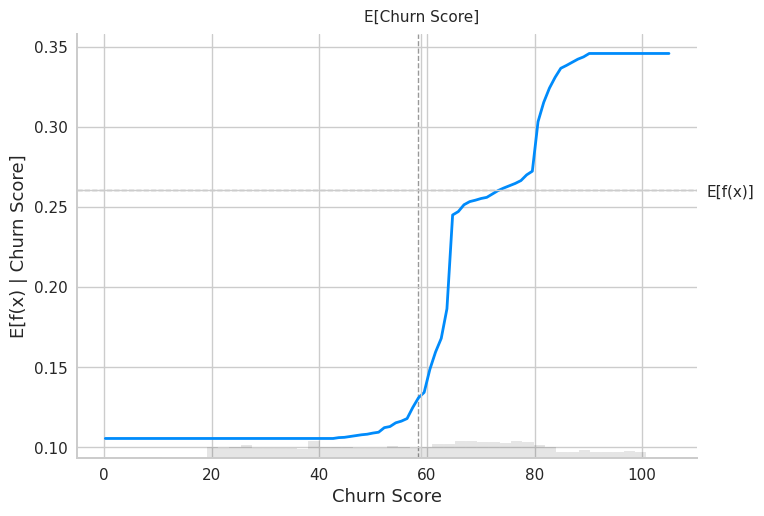

In [160]:
idx = 0  # Index of the sample
feature = 'Churn Score'  # Feature
shap.plots.partial_dependence(
    feature, model.predict, X_train, ice=False,
    model_expected_value=True, feature_expected_value=True
)

* The x-axis, labeled "Churn Score," ranges from 0 to over 100, likely representing a score calculated by the model to predict the likelihood of customers discontinuing their service or leaving the company—known as churn.

* The y-axis represents the SHAP value, which indicates the impact of the churn score on the predicted outcome. The curve shows a gradual increase in the predicted outcome as the churn score increases up to around a score of 60, after which the curve steeply rises, indicating a much greater impact on the predicted outcome. This suggests that customers with a churn score above this threshold are significantly more likely to churn according to the model's predictions.

* The horizontal dashed line likely represents the average predicted outcome across the dataset, serving as a baseline for comparison against the impact of varying churn scores.

* The vertical dashed lines could represent the mean or median churn score in the dataset, serving as a reference point for the distribution of churn scores among the customers.

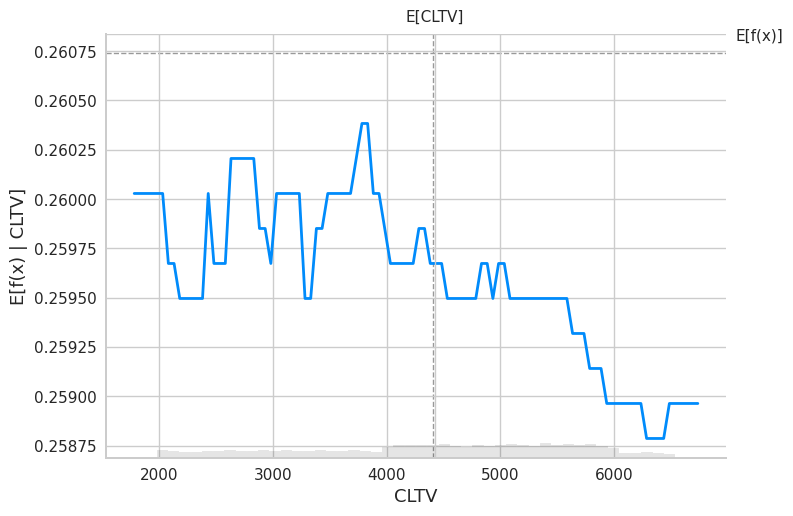

In [131]:
idx = 0  # Index of the sample
feature = 'CLTV'  # Feature
shap.plots.partial_dependence(
    feature, model.predict, X_train, ice=False,
    model_expected_value=True, feature_expected_value=True
)

* X-Axis (CLTV): Represents the Customer Lifetime Value, a metric that estimates the total net profit a company can make from any given customer. It ranges from 0 to over 6000, likely indicating the potential monetary value of customers to the business.

* Y-Axis (Eff(x) [CLTV]): Reflects the predicted effect or output of the model as influenced by the CLTV values. The y-axis values suggest that this effect is measured on a scale from approximately 0.2585 to 0.2605.

* The Curve: Shows the change in the predicted output as CLTV increases. The line climbs in steps, indicating that certain CLTV ranges correspond to specific predicted outcomes. After a sharp increase up to a CLTV of around 3000, the plot shows several peaks and troughs, suggesting that the relationship between CLTV and the predicted outcome is complex and non-linear.

# Shap Plots

Hard to look at every feature for every sample. So lets look at all features of the same sample

In [140]:
shap.initjs()
explainer = shap.TreeExplainer(tree_clf)
shap.force_plot(explainer.expected_value[0], shap_values[1][1,:], X_test.iloc[1,:])

The SHAP force plot is showing the contribution of each feature to a particular prediction. In this plot, features pushing the prediction higher (towards the class of interest, which could be class 1 in a binary classification problem) are shown in red, while those pushing the prediction lower are in blue.

The base value (average model output over the dataset the model was trained on) is around 0.48.
The output value (the prediction for this particular instance) is around 0.5393.

The most impactful feature pushing the prediction higher (red) is Contract_Month-to-month = 1, indicating that having a month-to-month contract is increasing the likelihood of the predicted outcome.

Other features seem to have less impact and are not pushing the score as high as the month-to-month contract feature.

The features pushing the prediction lower (blue) are Internet Service_Fiber optic = 0 and Tenure Months = 18, indicating that not having a fiber optic internet service and a tenure of 18 months are contributing towards a lower prediction value.

In [ ]:
#nan_frame_processed = pipeline[:-1].transform(nan_frame)
#base_value = round(pipeline[-1].predict(nan_frame_processed)[0], 3)

def sample_feature_importance(idx, plot_type='condensed'):
    if plot_type == 'condensed':
        base_value = explainer.expected_value
        if isinstance(base_value, np.ndarray):  # For models with multiple output classes
            base_value = base_value[0]  # Adjust index based on your model
        return shap.plots.force(base_value, shap_values[idx])
    elif plot_type == 'waterfall':
        if isinstance(shap_values, list) and isinstance(shap_values[idx], np.ndarray):
            single_shap_values = shap_values[idx]
            feature_values = X_test.iloc[idx]  # Adjust based on your data

            # Ensure the feature_values is a one-dimensional array
            if not isinstance(feature_values, pd.Series):
                feature_values = feature_values.squeeze()

            base_value = explainer.expected_value
            if isinstance(base_value, np.ndarray):
                base_value = base_value[0]  # Use the first output class's base value

            # Ensure single_shap_values is a one-dimensional array
            single_shap_values = single_shap_values.flatten()

            # Construct the SHAP Explanation object
            explanation = shap.Explanation(values=single_shap_values,
                                          base_values=float(base_value),
                                          data=feature_values.values)
            return shap.plots.waterfall(explanation)
        else:
            return "Invalid SHAP values format."
    else:
        return "Invalid visual type specified ('condensed', 'waterfall')."

In [ ]:
idx = 0
sample_feature_importance(idx, plot_type='condensed')

In [ ]:
# Assuming idx is the index of the sample you want to explain

print("Shape of SHAP values:", shap_values[idx].shape)
print("Base value:", explainer.expected_value)

print("Shape of feature values:", X_test.shape)

single_shap_values = shap_values[idx]
feature_values = X_test.iloc[idx].values
base_value = explainer.expected_value[0] if isinstance(explainer.expected_value, np.ndarray) else explainer.expected_value

# This is an example for a single sample with a hypothetical model with 10 features
single_shap_values = np.random.rand(10)  # Replace with actual SHAP values for one sample
base_value = np.random.rand(1)  # Replace with actual base value for the model
feature_values = np.random.rand(10)  # Replace with actual feature values for one sample

explanation = shap.Explanation(values=single_shap_values, base_values=base_value, data=feature_values)
shap.plots.waterfall(explanation)

# Feature Importance for model

Looking at individual samples can be a bother. Let's look at all samples together

In [ ]:
shap_values = explainer.shap_values(X_test)

# Assuming that shap_values is a list where shap_values[1] corresponds to positive class
# You can change the index accordingly if it's different in your case

# Calculate the absolute mean SHAP value for each feature
abs_mean_shap_values = np.mean(np.abs(shap_values[1]), axis=0)

# Create a DataFrame to store feature names and their absolute mean SHAP values
shap_summary_df = pd.DataFrame({'Feature': X_test.columns, 'SHAP Value': abs_mean_shap_values})

# Sort the DataFrame by SHAP value in descending order to get the most important features
shap_summary_df = shap_summary_df.sort_values(by='SHAP Value', ascending=False)

# Print the top N important features (e.g., top 10)
top_n = 10  # Change this value to the number of top features you want to see
print(f"Top {top_n} Important Features:")
print(shap_summary_df.head(top_n))

# Create an Explanation object
explanation = shap.Explanation(values=abs_mean_shap_values,
                               base_values=base_value,
                               feature_names=X_test.columns)

# Generate the bar plot
shap.plots.bar(explanation)

In [ ]:
# Generate SHAP values for all test set instances
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Summary plot for all test set instances
shap.summary_plot(shap_values, X_test)

Two most important features according to the LinearRegression model:

1. Churn Score

2. Tenure Months

In [ ]:
# shap.summary_plot(shap_values.values, X_train, plot_type='bar')
# Summary plot
shap.summary_plot(shap_values[1], X_test, plot_type='bar')

We can interpret the neural network model in the same way

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

# Assuming preprocessed_X_train, X_test, y_train, y_test are already defined
# Make sure your target variable (y_train, y_test) is in binary format (0 and 1)

num_epochs = 50
learning_rate = 0.01
hidden_size = 32
batch_size = 50
input_dim = preprocessed_X_train.shape[1]  # Number of features
#batch_no = len(preprocessed_X_train) // batch_size
batch_no = preprocessed_X_train.shape[0] // batch_size

# Re-define the model with the correct input size
model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid()
)

# Loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Check if preprocessed_X_train is a sparse matrix
if isinstance(preprocessed_X_train, np.ndarray):
    dense_X_train = preprocessed_X_train
else:
    # Convert to dense array if it's a sparse matrix
    dense_X_train = preprocessed_X_train.toarray()

#dense_X_train = preprocessed_X_train.toarray()

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(batch_no):
        start = i * batch_size
        #end = min(start + batch_size, len(preprocessed_X_train))
        end = min(start + batch_size, preprocessed_X_train.shape[0])
        #x_batch = Variable(torch.FloatTensor(preprocessed_X_train[start:end]))
        x_batch = Variable(torch.FloatTensor(dense_X_train[start:end]))

        # Convert y_train[start:end] to a numpy array before creating a tensor
        y_batch = Variable(torch.FloatTensor(y_train[start:end].to_numpy()))

        optimizer.zero_grad()
        y_preds = model(x_batch)
        loss = criterion(y_preds, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {running_loss / batch_no}")

mapper = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)  # Only scale numerical features
    ], remainder='passthrough')  # Keep other features as they are

mapper.fit(X_train)

# Transform both training and test data
preprocessed_X_train = mapper.transform(X_train)
preprocessed_X_test = mapper.transform(X_test)

# Now you can use preprocessed_X_test in your model evaluation
model.eval()  # Set the model to evaluation mode

# For test data
test_preds = model(torch.FloatTensor(preprocessed_X_test)).detach().numpy()
test_preds = (test_preds > 0.5).astype(int).flatten()
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Test Accuracy: {test_accuracy:.3f}")

# For training data (optional)
train_preds = model(torch.FloatTensor(preprocessed_X_train)).detach().numpy()
train_preds = (train_preds > 0.5).astype(int).flatten()
train_accuracy = accuracy_score(y_train, train_preds)
print(f"Train Accuracy: {train_accuracy:.3f}")
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
print(f"\nTrain MAE = {round(train_mae, 3)}, Test MAE = {round(test_mae, 3)} ")

Epoch 0, Loss: 0.2677: At the beginning of training, the loss is relatively high.
Epoch 10, Loss: 0.06584: After 10 epochs, the loss has decreased significantly.
Epoch 20, Loss: 0.0079: Further reduction in loss after 20 epochs.
Epoch 30, Loss: 0.01415: Continued improvement.
Epoch 40, Loss: 0.000279: The loss has decreased to a very low value after 40 epochs, indicating the model is fitting the training data very well.

**Train MAE and Test MAE:** MAE stands for Mean Absolute Error. It measures the average absolute difference between the predicted values and the actual target values. In your output, both train MAE and test MAE are provided.

  * **Train MAE = 0.0:** The model's predictions on the training data are very close to the actual values, with a very low mean absolute error.

  * **Test MAE = 0.114:** The model's predictions on the test data also have low mean absolute error but are slightly higher than the training data. This is expected because the model may not perform as well on unseen data, but the error is still relatively low.

Most important features for this neural network:

1. Churn Score

2. Contract_month-to-month

With this intuition, it's much easier to understand the [math details of Shapely Values](https://christophm.github.io/interpretable-ml-book/shapley.html#the-shapley-value-in-detail).

**References :**

https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset

Professor's Notebook : https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb


Professor's Notebook : https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

**License**

Copyright 2023 Mrunali Pawar

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.